In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'+'event_rate_model2/' 
output_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

plot_systematic = 0

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

FF = imp.load_source('FF_functions',lib_function_dir+'FF_functions.py')
CC = imp.load_source('CC_inclusive_2D_lib','CC_inclusive_2D_lib.py')


Welcome to JupyROOT 6.18/04
N_tot =  4.10331109202e+31   flux=  1.58051463543e+11 for pot:  2.144e+20


In [2]:
outputdir_png, outputdir_root, outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)

In [3]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kFALSE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [4]:
from array import array
#mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
#mom_bins = [ 0.00, 0.225, 0.28, 0.33, 0.39, 0.52, 0.78, 1.21, 2.5]

mom_bins = {}
#mom_bins.Append()
mom_bins[0] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[1] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[2] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[3] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[4] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[5] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[6] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]
mom_bins[7] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]
mom_bins[8] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]

theta_bins = [ -1.00, -0.50, 0.00, 0.28, 0.47, 0.63, 0.765, 0.865, 0.935, 1.00 ]

len_theta = len(theta_bins) - 1
len_mom = {}
sum_bins = 0
for i in range(len_theta):
    len_mom[i] = len(mom_bins[i]) - 1
    #print len_mom[i]
    sum_bins+=len_mom[i]


In [5]:
NumberOfFiles = 5000
POT_file = 5e8
activeVol_Area = 128.175*2*116.5*2
pot_data = 2.144e+20

path = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/Flux/zarko/'
f_flux_int = ROOT.TFile.Open(path+"MCC9_FluxHist_volTPCActive.root", 'read')
h_flux_cv = f_flux_int.Get("hEnumu_cv")
flux_cv = h_flux_cv.Integral(-1,201)/(NumberOfFiles*POT_file*activeVol_Area)*pot_data

roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))

N_tot = roh_data*N_A*N_nucleons*V_fid/mol

print 'N_tot = ',N_tot,'  flux= ',flux_cv, 'for pot: ', pot_data

N_tot =  4.10331109202e+31   flux=  1.58051463543e+11 for pot:  2.144e+20


In [6]:
def xsec2rate(h_true):
    #xsec to event rate:
    # need pot/flux, xsec
    #h_rate = h_true.Clone()
    h_rate = ROOT.TH1F('h_rate',"h_rate",43,0,43)
    bin_counter = 0
    for t_bin in range(len_theta): #len_theta
        h_temp = f_cv.Get('h_data['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            bin_width =  h_temp.GetBinWidth(m_bin+1)
            bin_width_theta = theta_bins[t_bin+1] - theta_bins[t_bin]
            h_rate.SetBinContent(bin_counter,h_true.GetBinContent(bin_counter)*(bin_width*bin_width_theta))
            h_rate.SetBinError(bin_counter,h_true.GetBinError(bin_counter)*(bin_width*bin_width_theta))
            #print t_bin, m_bin, bin_width_theta, bin_width, h_true.GetBinContent(bin_counter), h_rate.GetBinContent(bin_counter)*N_tot*flux_cv
    h_rate.SetBinContent(43,1e-80)
    h_rate.SetBinError(43,1e-80)
    h_rate.Scale(N_tot*flux_cv)
    return h_rate

In [7]:
def xsec2rate_reco(h_true):
    #xsec to event rate:
    # need pot/flux, xsec
    #h_rate = h_true.Clone()
    h_rate = ROOT.TH1F('h_rate',"h_rate",43,0,43)
    bin_counter = 0
    for t_bin in range(len_theta): #len_theta
        h_temp = f_cv.Get('h_data['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            bin_width =  h_temp.GetBinWidth(m_bin+1)
            bin_width_theta = theta_bins[t_bin+1] - theta_bins[t_bin]
            h_rate.SetBinContent(bin_counter,h_true.GetBinContent(bin_counter)*(bin_width*bin_width_theta))
            h_rate.SetBinError(bin_counter,h_true.GetBinError(bin_counter)*1e-1*(bin_width*bin_width_theta))
    h_rate.Scale(N_tot*flux_cv*1e-38)
    h_rate.SetBinContent(43,1e-80)
    h_rate.SetBinError(43,1e-80)
    return h_rate

In [8]:
def eventrate_comparison(h_data_func,h_ext_func,h_dirt_func,h_bkg_func,h_true_func,this_frac_tot, filename,model_name):
    c1 = ROOT.TCanvas("c1","c1",1600,1200)
    c1.SetGrid(1)
    c1.SetLeftMargin(0.14)
    c1.SetRightMargin(0.1)
    c1.SetBottomMargin(0.1)

    c1.cd()

    pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
    pad1.SetGrid(1)
    pad1.Draw()
    pad1.cd()
    pad1.SetBottomMargin(0.03);
    pad1.SetTopMargin(0.1)

    FF.main_plot(h_data_func)
    
    h_reco_func = CC.smear_plot(h_true_func)
    #h_reco_func = h_true_func

    hs = ROOT.THStack("hs","");
    h_ext_func.SetFillColor(ROOT.kBlue+2)
    h_ext_func.SetLineColor(ROOT.kBlue+2)
    h_ext_func.SetFillStyle(3004)
    h_dirt_func.SetFillColor(ROOT.kOrange+2);
    h_dirt_func.SetLineColor(ROOT.kOrange+2);
    h_bkg_func.SetFillColor(ROOT.kGray)
    h_bkg_func.SetLineColor(ROOT.kGray)
    h_reco_func.SetFillColor(ROOT.kRed)
    h_reco_func.SetLineColor(ROOT.kRed)
    hs.Add(h_ext_func)
    hs.Add(h_dirt_func)
    hs.Add(h_bkg_func)
    hs.Add(h_reco_func)

    h_data_func.SetXTitle("Reco bin number")
    h_data_func.SetYTitle("Number of events")

    h_tot = h_reco_func.Clone()
    h_tot.Add(h_bkg_func)
    
    num_bins = 43 # get eventually better than hardcode
    #pred_vec = FF.plot2arr(h_tot,1)
    
    h_tot.Add(h_ext_func)
    h_tot.Add(h_dirt_func)
    h_tot.SetFillColor(ROOT.kBlack)
    h_tot.SetLineColor(ROOT.kBlack)
    h_tot.SetFillStyle(3004)
    
    # calculate CHi2
    dat_vec = FF.plot2arr(h_data_func,1)
    #dat_vec = dat_vec[0:-1]
    tot_vec = FF.plot2arr(h_tot,1)
    #print tot_vec.size()
    tot_vec = tot_vec[0:-1]
    #print tot_vec.shape()
    covar = np.zeros((num_bins-1,num_bins-1))

    #get total covar:
    covar_data = np.zeros((num_bins-1,num_bins-1))
    for i in range(num_bins-1):
        for j in range(num_bins-1):
            covar[i][j] = this_frac_tot[i][j]*tot_vec[i]*tot_vec[j]
            
    for i in range(num_bins):
        h_tot.SetBinError(i+1,math.sqrt(this_frac_tot[i][i])*h_tot.GetBinContent(i+1))
        

    inv_covar = np.linalg.inv(covar)
    diff_vec = (dat_vec - tot_vec)
    #chi2_tmp = diff_vec.dot(inv_covar)
    #chi2 = chi2_tmp.dot(diff_vec)
    chi2 = 0.0
    for i in range(42):
        for j in range(42):
            chi2 += diff_vec[i]*inv_covar[i][j]*diff_vec[j]

    print 'Chi2 = ',chi2
    h_data_func.SetMaximum(-1111)
    h_data_func.SetMaximum(h_data_func.GetMaximum()*1.2)
    h_data_func.Draw('E1')
    h_histo = FF.histBkg(h_true_func)
    h_histo.Draw('hist same')
    hs.Draw('same hist')
    h_tot.Draw('same E2')
    
    legend = ROOT.TLegend(0.15,0.45,0.47,0.9)
    legend.AddEntry(h_data_func,'Data + stat.',"lep");
    legend.AddEntry(h_tot,model_name+' + bkg: #chi^{2}:'+'{:04.1f}'.format(chi2),"f");
    legend.AddEntry(h_reco_func,'#nu_{#mu} CC',"f")
    legend.AddEntry(h_bkg_func,'Background, in-beam',"f")
    legend.AddEntry(h_dirt_func,'Dirt',"f")
    legend.AddEntry(h_ext_func,'Cosmic, off-beam',"f")
    #legend.AddEntry(h_tot,'Syst. error, #chi^{2}:'+'{:04.1f})'.format(chi2),"f");
    legend.Draw()
    
    h_data_func.Draw('E1 same')

    prelim, pot_tex = FF.draw_adding()
    prelim.Draw()
    pot_tex.Draw()

    h_data_func.GetYaxis().SetTitleOffset(1);
    h_data_func.GetXaxis().SetLabelOffset(999);
    h_data_func.GetXaxis().SetTitleOffset(999);
    h_data_func.GetXaxis().SetLabelSize(0);
    h_data_func.GetXaxis().SetTitleSize(0);
    
    c1.cd()
    h_data_func.GetXaxis().SetLabelOffset(0);
    h_data_func.GetXaxis().SetTitleOffset(0);

    pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
    pad2.SetGrid(1)
    pad2.SetTopMargin(0.04)
    pad2.SetBottomMargin(0.4)
    pad2.Draw()
    pad2.cd()
    h_tot_noerr = h_data_func.Clone()
    h_mc_ratio = h_data_func.Clone()
    h_mc_ratio.SetFillColor(ROOT.kBlack)
    h_mc_ratio.SetLineColor(ROOT.kBlack)
    h_mc_ratio.SetFillStyle(3004)
    for i in range(42):
        h_mc_ratio.SetBinContent(i+1,h_tot.GetBinContent(i+1))
        h_mc_ratio.SetBinError(i+1,h_tot.GetBinError(i+1))
        h_tot_noerr.SetBinContent(i+1,h_tot.GetBinContent(i+1))
        h_tot_noerr.SetBinError(i+1,0)
    h_xsec_data_ratio = h_data_func.Clone()
    h_xsec_data_ratio.Divide(h_tot_noerr)
    h_mc_ratio.Divide(h_tot_noerr)

    h_xsec_data_ratio.SetYTitle('Data/(Ext+MC)')
    h_xsec_data_ratio.GetYaxis().SetTitleSize(0.1)
    h_xsec_data_ratio.GetYaxis().SetTitleOffset(0.3)
    h_xsec_data_ratio.GetYaxis().SetLabelSize(0.07)
    h_xsec_data_ratio.GetXaxis().SetTitleSize(0.15)
    h_xsec_data_ratio.GetXaxis().SetLabelSize(0.15)
    h_xsec_data_ratio.GetXaxis().SetTitleOffset(1)
    h_xsec_data_ratio.SetMaximum(2)
    h_xsec_data_ratio.Draw('E1')
    h_histo.Draw('hist same')
    h_mc_ratio.Draw('E2 same')

    c1.Draw()
    c1.SaveAs(outputdir_png + filename+".png")
    c1.SaveAs(outputdir_root + filename+".root")
    c1.SaveAs(outputdir_pdf + filename+".pdf")

    return


In [9]:
print N_tot, flux_cv


4.10331109202e+31 1.58051463543e+11


# up to here only functions....

In [10]:
# load all distributions and the Genie 3 tuned true
path_detsys = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
f_cv = ROOT.TFile.Open(path_detsys+'xsec_2D_Run3_wighted_t.root', 'read')
pot = 2.144e+20
h_true_g3_tune = ROOT.TH1F('h_true',"true tune3",43,0,43)
h_true_g3_noweight = ROOT.TH1F('h_true',"true tune3",43,0,43)
h_data = ROOT.TH1F('h_data',"data",42,0,42)
h_bkg = ROOT.TH1F('h_bkg',"Background",43,0,43)
h_sig = ROOT.TH1F('h_sig',"Background",43,0,43)
h_ext = ROOT.TH1F('h_ext',"Cosmic",43,0,43)
h_dirt = ROOT.TH1F('h_dirt',"Cosmic",43,0,43)
h_eff = ROOT.TH1F('h_eff',"Cosmic",43,0,43)

h_no_moun = ROOT.TH1F('h_no_moun',"h_no_moun",43,0,43)
h_nue = ROOT.TH1F('h_nue',"h_nue",43,0,43)
h_antinu = ROOT.TH1F('h_antinu',"h_antinu",43,0,43)
h_nc = ROOT.TH1F('h_nc',"h_nc",43,0,43)
h_ov = ROOT.TH1F('h_ov',"h_ov",43,0,43)
h_cosmic = ROOT.TH1F('h_cosmic',"h_cosmic",43,0,43)

h_rate_qe = ROOT.TH1F('h_rate_qe',"h_rate_qe",43,0,43)
h_rate_mec = ROOT.TH1F('h_rate_mec',"h_rate_mec",43,0,43)
h_rate_res = ROOT.TH1F('h_rate_res',"h_rate_res",43,0,43)
h_rate_dis = ROOT.TH1F('h_rate_dis',"h_rate_dis",43,0,43)

bin_counter = 0
for t_bin in range(len_theta): #len_theta
    h_temp = f_cv.Get('h_true['+str(t_bin)+']')
    h_temp0 = f_cv.Get('h_true_noweigt['+str(t_bin)+']')
    h_temp2 = f_cv.Get('h_data['+str(t_bin)+']')
    h_temp3 = f_cv.Get('h_overlay['+str(t_bin)+']')
    h_temp31 = f_cv.Get('h_signal['+str(t_bin)+']')
    h_temp4 = f_cv.Get('h_ext['+str(t_bin)+']')
    h_temp5 = f_cv.Get('h_dirt['+str(t_bin)+']')
    h_temp6 = f_cv.Get('h_1d_eff['+str(t_bin)+']')
    
    h_temp10 = f_cv.Get('h_no_moun['+str(t_bin)+']')
    h_temp11 = f_cv.Get('h_nue['+str(t_bin)+']')
    h_temp12 = f_cv.Get('h_antinu['+str(t_bin)+']')
    h_temp13 = f_cv.Get('h_nc['+str(t_bin)+']')
    h_temp14 = f_cv.Get('h_ov['+str(t_bin)+']')
    h_temp15 = f_cv.Get('h_cosmic['+str(t_bin)+']')

    h_temp20 = f_cv.Get('h_QE_rate['+str(t_bin)+']')
    h_temp21 = f_cv.Get('h_MEC_rate['+str(t_bin)+']')
    h_temp22 = f_cv.Get('h_RES_rate['+str(t_bin)+']')
    h_temp23 = f_cv.Get('h_DIS_rate['+str(t_bin)+']')

    for m_bin in range(len_mom[t_bin]):
        bin_counter+=1
        h_true_g3_tune.SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))
        h_true_g3_noweight.SetBinContent(bin_counter,h_temp0.GetBinContent(m_bin+1))
        h_data.SetBinContent(bin_counter,h_temp2.GetBinContent(m_bin+1))
        h_bkg.SetBinContent(bin_counter,h_temp3.GetBinContent(m_bin+1))
        h_sig.SetBinContent(bin_counter,h_temp31.GetBinContent(m_bin+1))
        h_ext.SetBinContent(bin_counter,h_temp4.GetBinContent(m_bin+1))
        h_dirt.SetBinContent(bin_counter,h_temp5.GetBinContent(m_bin+1))
        h_eff.SetBinContent(bin_counter,h_temp6.GetBinContent(m_bin+1))
        
        h_no_moun.SetBinContent(bin_counter,h_temp10.GetBinContent(m_bin+1))
        h_nue.SetBinContent(bin_counter,h_temp11.GetBinContent(m_bin+1))
        h_antinu.SetBinContent(bin_counter,h_temp12.GetBinContent(m_bin+1))
        h_nc.SetBinContent(bin_counter,h_temp13.GetBinContent(m_bin+1))
        h_ov.SetBinContent(bin_counter,h_temp14.GetBinContent(m_bin+1))
        h_cosmic.SetBinContent(bin_counter,h_temp15.GetBinContent(m_bin+1))
        
        h_rate_qe.SetBinContent(bin_counter,h_temp20.GetBinContent(m_bin+1))
        h_rate_mec.SetBinContent(bin_counter,h_temp21.GetBinContent(m_bin+1))
        h_rate_res.SetBinContent(bin_counter,h_temp22.GetBinContent(m_bin+1))
        h_rate_dis.SetBinContent(bin_counter,h_temp23.GetBinContent(m_bin+1))
h_eff.SetBinContent(5,1)
h_eff.SetBinContent(10,1)

f_in = ROOT.TFile.Open('/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/My_Measurement/'+'FF_detsys.root', 'read')
h_true_g3_tune = f_in.Get('h_gen_cv')

Warning in <TFile::Append>: Replacing existing TH1: h_true (Potential memory leak).


In [11]:
path_chan = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
f_chan = ROOT.TFile.Open(path_chan+'xsec_2D_Run3_wighted_t.root', 'read')
pot = 2.144e+20
#h_data = ROOT.TH1F('h_data',"data",43,0,43)
h_qe = ROOT.TH1F('h_qe',"qe",43,0,43)
h_mec = ROOT.TH1F('h_mec',"mec",43,0,43)
h_res = ROOT.TH1F('h_res',"res",43,0,43)
h_dis = ROOT.TH1F('h_dis',"dis",43,0,43)
bin_counter = 0
for t_bin in range(len_theta): #len_theta
    h_temp = f_chan.Get('h_QE['+str(t_bin)+']')
    h_temp2 = f_chan.Get('h_MEC['+str(t_bin)+']')
    h_temp3 = f_chan.Get('h_RES['+str(t_bin)+']')
    h_temp31 = f_chan.Get('h_DIS['+str(t_bin)+']')
    #h_temp6 = f_cv.Get('h_data['+str(t_bin)+']')

    for m_bin in range(len_mom[t_bin]):
        bin_counter+=1
        h_qe.SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))
        h_mec.SetBinContent(bin_counter,h_temp2.GetBinContent(m_bin+1))
        h_res.SetBinContent(bin_counter,h_temp3.GetBinContent(m_bin+1))
        h_dis.SetBinContent(bin_counter,h_temp31.GetBinContent(m_bin+1))
        #h_data.SetBinContent(bin_counter,h_temp6.GetBinContent(m_bin+1))


In [12]:
path_gen = '/home/tmettler/Share/data_hist/'
f_g3 = ROOT.TFile.Open(path_gen+"ccinc_2d_genie3_nosmear.root", 'read')

h_xsec_g3 = f_g3.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC;1')
h_fine_g3 = f_g3.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_Fine2D;1')
h_xsec_g3.Scale(N_tot*flux_cv)
h_rate_g3 = ROOT.TH1F('h_rate_g3',"h_rate_g3",43,0,43)

f_g2 = ROOT.TFile.Open(path_gen+"ccinc_2d_genie2_nosmear.root", 'read')
h_xsec_g2 = f_g2.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC;1')
h_fine_g2 = f_g2.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_Fine2D;1')
h_xsec_g2.Scale(N_tot*flux_cv)
h_rate_g2 = ROOT.TH1F('h_rate_g2',"h_rate_g2",43,0,43)

f_gibuu = ROOT.TFile.Open(path_gen+"ccinc_2d_gibuu_nosmear.root", 'read')
h_xsec_gibuu = f_gibuu.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC;1')
h_fine_gibuu = f_gibuu.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_Fine2D;1')
h_xsec_gibuu.Scale(N_tot*flux_cv)
h_rate_gibuu = ROOT.TH1F('h_rate_gibuu',"h_rate_gibuu",43,0,43)

f_nuwro = ROOT.TFile.Open(path_gen+"ccinc_2d_nuwro_nosmear.root", 'read')
h_xsec_nuwro = f_nuwro.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC;1')
h_fine_nuwro = f_nuwro.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_Fine2D;1')
h_xsec_nuwro.Scale(N_tot*flux_cv)
h_rate_nuwro = ROOT.TH1F('h_rate_nuwro',"h_rate_nuwro",43,0,43)

f_neut = ROOT.TFile.Open(path_gen+"ccinc_2d_neut_nosmear.root", 'read')
h_xsec_neut = f_neut.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC;1')
h_fine_neut = f_neut.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_Fine2D;1')
h_xsec_neut.Scale(N_tot*flux_cv)
h_rate_neut = ROOT.TH1F('h_rate_neut',"h_rate_neut",43,0,43)

ov_g3 = 0
ov_g2 = 0
ov_gibuu = 0
ov_nuwro = 0
ov_neut = 0
bin_g3 = 0
bin_g2 = 0
bin_gibuu = 0
bin_nuwro = 0
bin_neut = 0
for i in range(0,18):
    for j in range(0,250):
        bin_g3 += h_fine_g3.GetBinContent(i,j)
        bin_g2 += h_fine_g2.GetBinContent(i,j)
        bin_gibuu += h_fine_gibuu.GetBinContent(i,j)
        bin_nuwro += h_fine_nuwro.GetBinContent(i,j)
        bin_neut += h_fine_neut.GetBinContent(i,j)
for i in range(250,700):
    for j in range(0,1000):
        ov_g3 += h_fine_g3.GetBinContent(i,j)
        ov_g2 += h_fine_g2.GetBinContent(i,j)
        ov_gibuu += h_fine_gibuu.GetBinContent(i,j)
        ov_nuwro += h_fine_nuwro.GetBinContent(i,j)
        ov_neut += h_fine_neut.GetBinContent(i,j)
#print sum_overflow*h_xsec_g3.GetBinContent(1)/sum_bin1
for i in range(43):
    h_rate_g3.SetBinContent(i+1,h_xsec_g3.GetBinContent(i+1))
    h_rate_g2.SetBinContent(i+1,h_xsec_g2.GetBinContent(i+1))
    h_rate_gibuu.SetBinContent(i+1,h_xsec_gibuu.GetBinContent(i+1))
    h_rate_nuwro.SetBinContent(i+1,h_xsec_nuwro.GetBinContent(i+1))
    h_rate_neut.SetBinContent(i+1,h_xsec_neut.GetBinContent(i+1))
h_rate_g3.SetBinContent(43,ov_g3*h_xsec_g3.GetBinContent(1)/ov_g3)
h_rate_g2.SetBinContent(43,ov_g2*h_xsec_g2.GetBinContent(1)/ov_g2)
h_rate_gibuu.SetBinContent(43,ov_gibuu*h_xsec_gibuu.GetBinContent(1)/ov_gibuu)
h_rate_nuwro.SetBinContent(43,ov_nuwro*h_xsec_nuwro.GetBinContent(1)/ov_nuwro)
h_rate_neut.SetBinContent(43,ov_neut*h_xsec_neut.GetBinContent(1)/ov_neut)

#h_pred_GuB.SetLineColor(ROOT.kBlack)
h_rate_g3.SetLineColor(ROOT.kBlue)
h_rate_g2.SetLineColor(ROOT.kRed)
h_rate_gibuu.SetLineColor(ROOT.kGreen)
h_rate_neut.SetLineColor(ROOT.kPink+2)
h_rate_nuwro.SetLineColor(ROOT.kYellow-2)




In [13]:
rate_g3_tune = FF.plot2arr(h_true_g3_tune,1)
rate_g3 = FF.plot2arr(h_rate_g3,1)
rate_g2 = FF.plot2arr(h_rate_g2,1)
rate_gibuu = FF.plot2arr(h_rate_gibuu,1)
rate_neut = FF.plot2arr(h_rate_neut,1)
rate_nuwro = FF.plot2arr(h_rate_nuwro,1)


In [14]:
s_rate_g3_tune =  FF.plot2arr(CC.smear_plot(h_true_g3_tune),1)
s_rate_g3 =  FF.plot2arr(CC.smear_plot(h_rate_g3),1)
s_rate_g2 =  FF.plot2arr(CC.smear_plot(h_rate_g2),1)
s_rate_gibuu =  FF.plot2arr(CC.smear_plot(h_rate_gibuu),1)
s_rate_neut =  FF.plot2arr(CC.smear_plot(h_rate_neut),1)
s_rate_nuwro =  FF.plot2arr(CC.smear_plot(h_rate_nuwro),1)


In [15]:
print np.sum(s_rate_g3_tune)/np.sum(rate_g3_tune)
print np.sum(s_rate_g3)/np.sum(rate_g3)
print np.sum(s_rate_g2)/np.sum(rate_g2)
print np.sum(s_rate_gibuu)/np.sum(rate_gibuu)
print np.sum(s_rate_neut)/np.sum(rate_neut)
print np.sum(s_rate_nuwro)/np.sum(rate_nuwro)

0.5562275274499603
0.5603118712657905
0.5740015125390469
0.5630751325869728
0.5610315594410019
0.5636966160390616


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/h_reco.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/h_reco.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/h_reco.pdf has been created


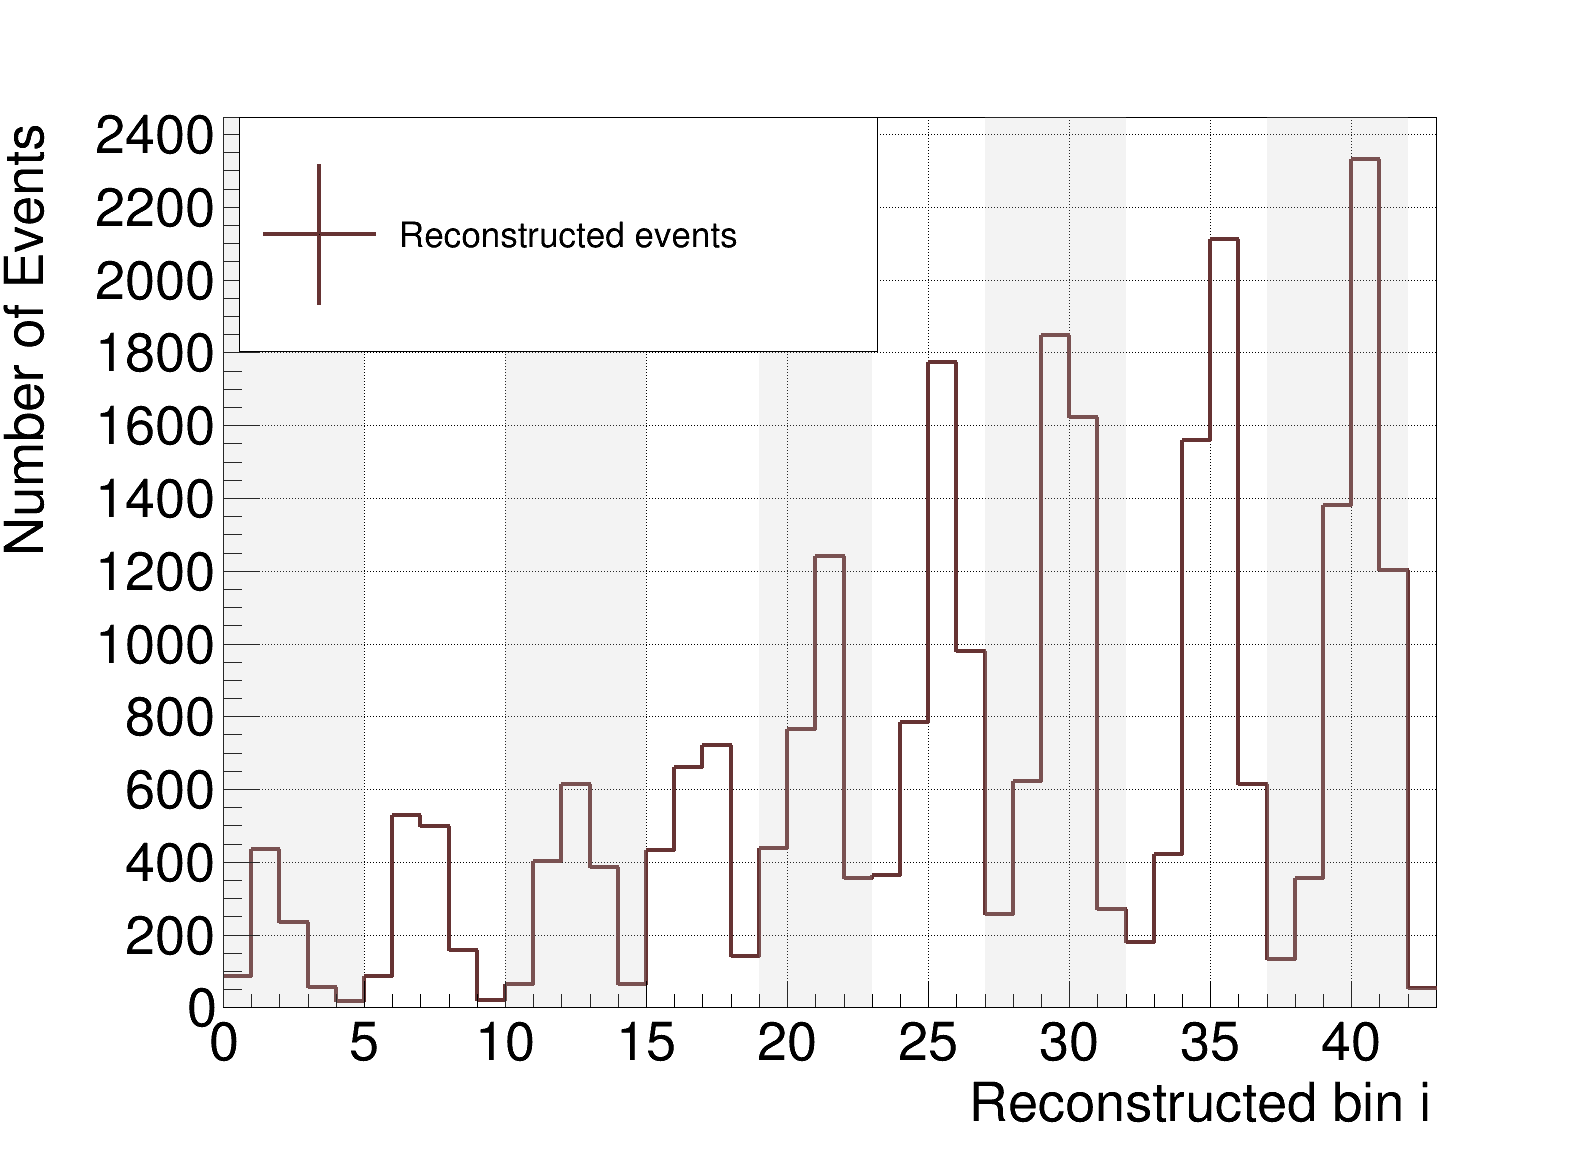

In [16]:
h_this_true = CC.smear_plot(h_true_g3_tune)
h_this_true.GetYaxis().SetTitleSize(0.05)
h_this_true.GetYaxis().SetTitleOffset(0.0)
h_this_true.GetYaxis().SetLabelSize(0.05)
h_this_true.GetXaxis().SetTitleSize(0.05)
h_this_true.GetXaxis().SetLabelSize(0.05)
h_this_true.GetXaxis().SetTitleOffset(1)
h_this_true.SetLineColor(ROOT.kRed-1)
h_this_true.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)

h_this_true.SetXTitle('Reconstructed bin i')
h_this_true.SetYTitle('Number of Events')

legend = ROOT.TLegend(0.15,0.7,0.55,0.9) # LEGEND LEFT
#legend.SetNColumns(2)
legend.AddEntry(h_this_true,"Reconstructed events","lep");

h_ = FF.histBkg(h_this_true)
h_this_true.Draw('hist')
h_.Draw('same')
legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_reco.png")
c1.SaveAs(outputdir_root + "h_reco.root")
c1.SaveAs(outputdir_pdf + "h_reco.pdf")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/h_true.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/h_true.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/h_true.pdf has been created


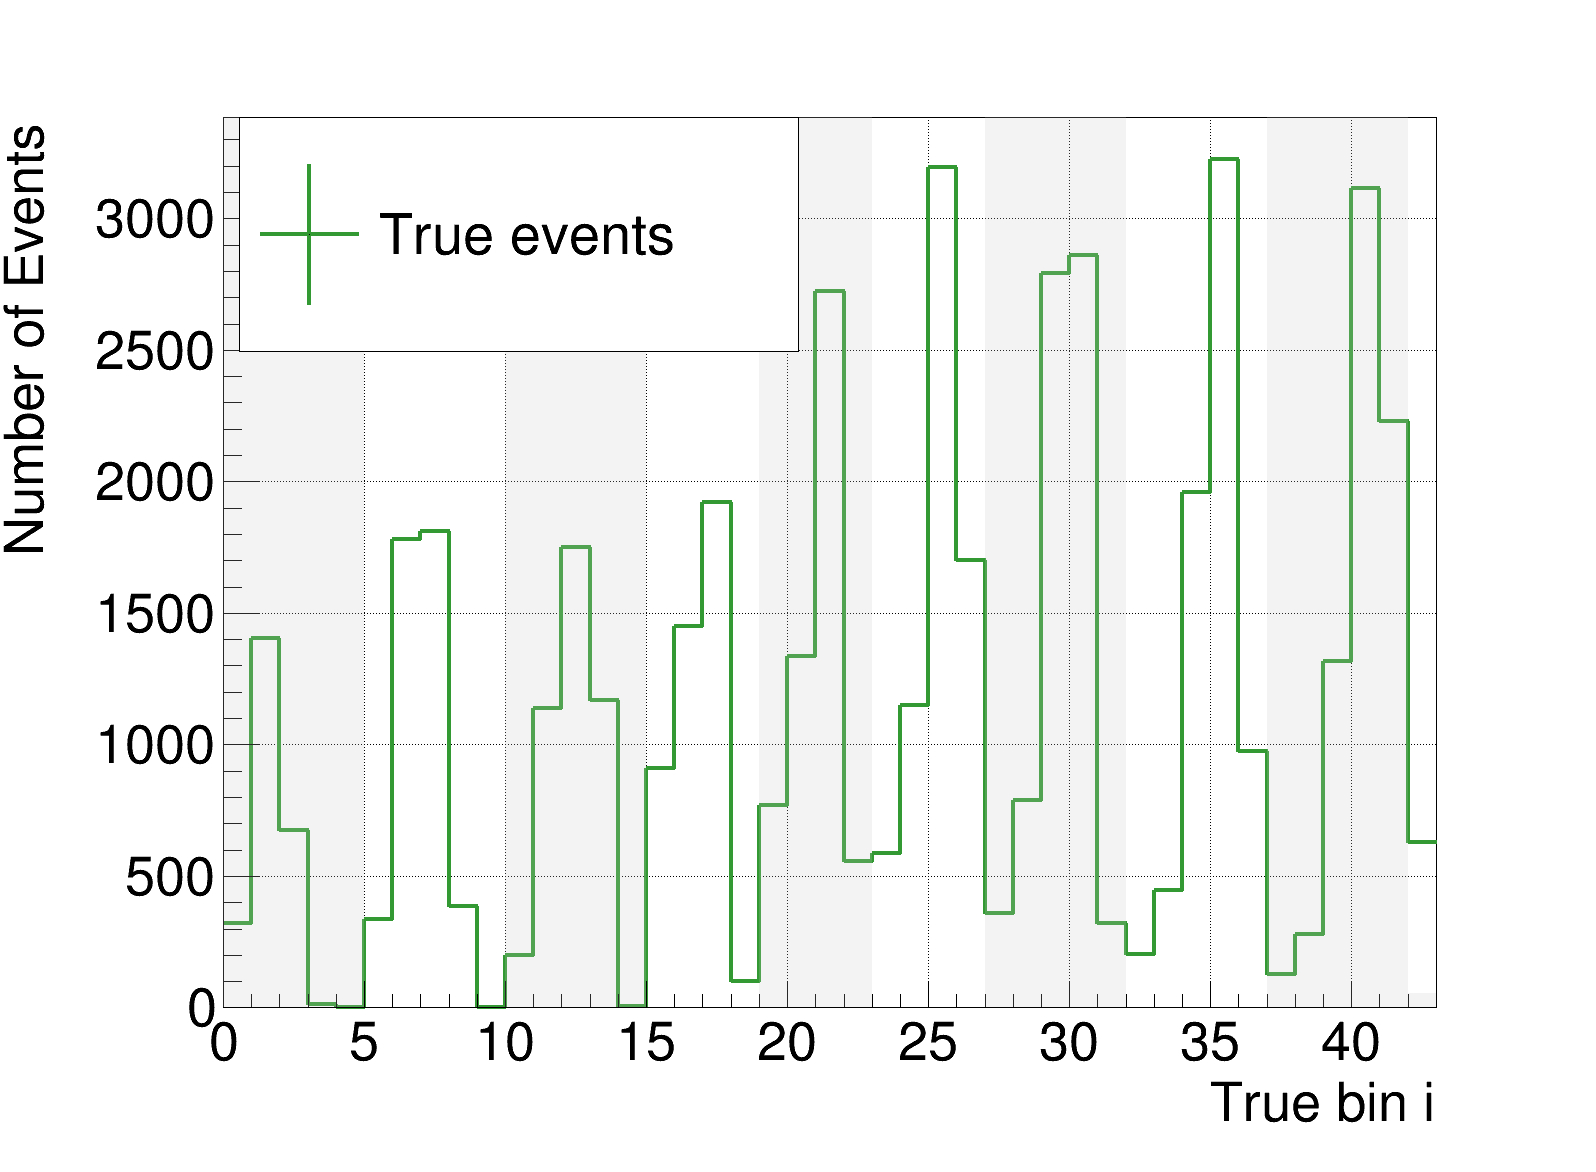

In [17]:
h_this_true = h_true_g3_tune.Clone()
h_this_true.GetYaxis().SetTitleSize(0.05)
h_this_true.GetYaxis().SetTitleOffset(0.0)
h_this_true.GetYaxis().SetLabelSize(0.05)
h_this_true.GetXaxis().SetTitleSize(0.05)
h_this_true.GetXaxis().SetLabelSize(0.05)
h_this_true.GetXaxis().SetTitleOffset(1)
h_this_true.SetLineColor(ROOT.kGreen-2)
h_this_true.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)

h_this_true.SetXTitle('True bin i')
h_this_true.SetYTitle('Number of Events')

legend = ROOT.TLegend(0.15,0.7,0.5,0.9) # LEGEND LEFT
#legend.SetNColumns(2)
legend.AddEntry(h_this_true,"True events","lep");

#h_ = FF.histBkg(h_this_true)
h_this_true.Draw('hist')
h_.Draw('same')
legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_true.png")
c1.SaveAs(outputdir_root + "h_true.root")
c1.SaveAs(outputdir_pdf + "h_true.pdf")

In [18]:
bin_=43
print h_rate_neut.GetBinContent(bin_)
print h_rate_g2.GetBinContent(bin_)
print h_rate_gibuu.GetBinContent(bin_)
print h_rate_g3.GetBinContent(bin_)
print h_rate_nuwro.GetBinContent(bin_)

304.008483887
358.599517822
152.949386597
254.05229187
263.012969971


In [19]:
'''
RootFile = ROOT.TFile('/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/My_Measurement/'+"FF_generators.root","RECREATE");
h_rate_g3.Write('h_rate_g3')
h_rate_g2.Write('h_rate_g2')
h_rate_gibuu.Write('h_rate_gibuu')
h_rate_nuwro.Write('h_rate_nuwro')
h_rate_neut.Write('h_rate_neut')
RootFile.Close()
'''


'\nRootFile = ROOT.TFile(\'/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/My_Measurement/\'+"FF_generators.root","RECREATE");\nh_rate_g3.Write(\'h_rate_g3\')\nh_rate_g2.Write(\'h_rate_g2\')\nh_rate_gibuu.Write(\'h_rate_gibuu\')\nh_rate_nuwro.Write(\'h_rate_nuwro\')\nh_rate_neut.Write(\'h_rate_neut\')\nRootFile.Close()\n'

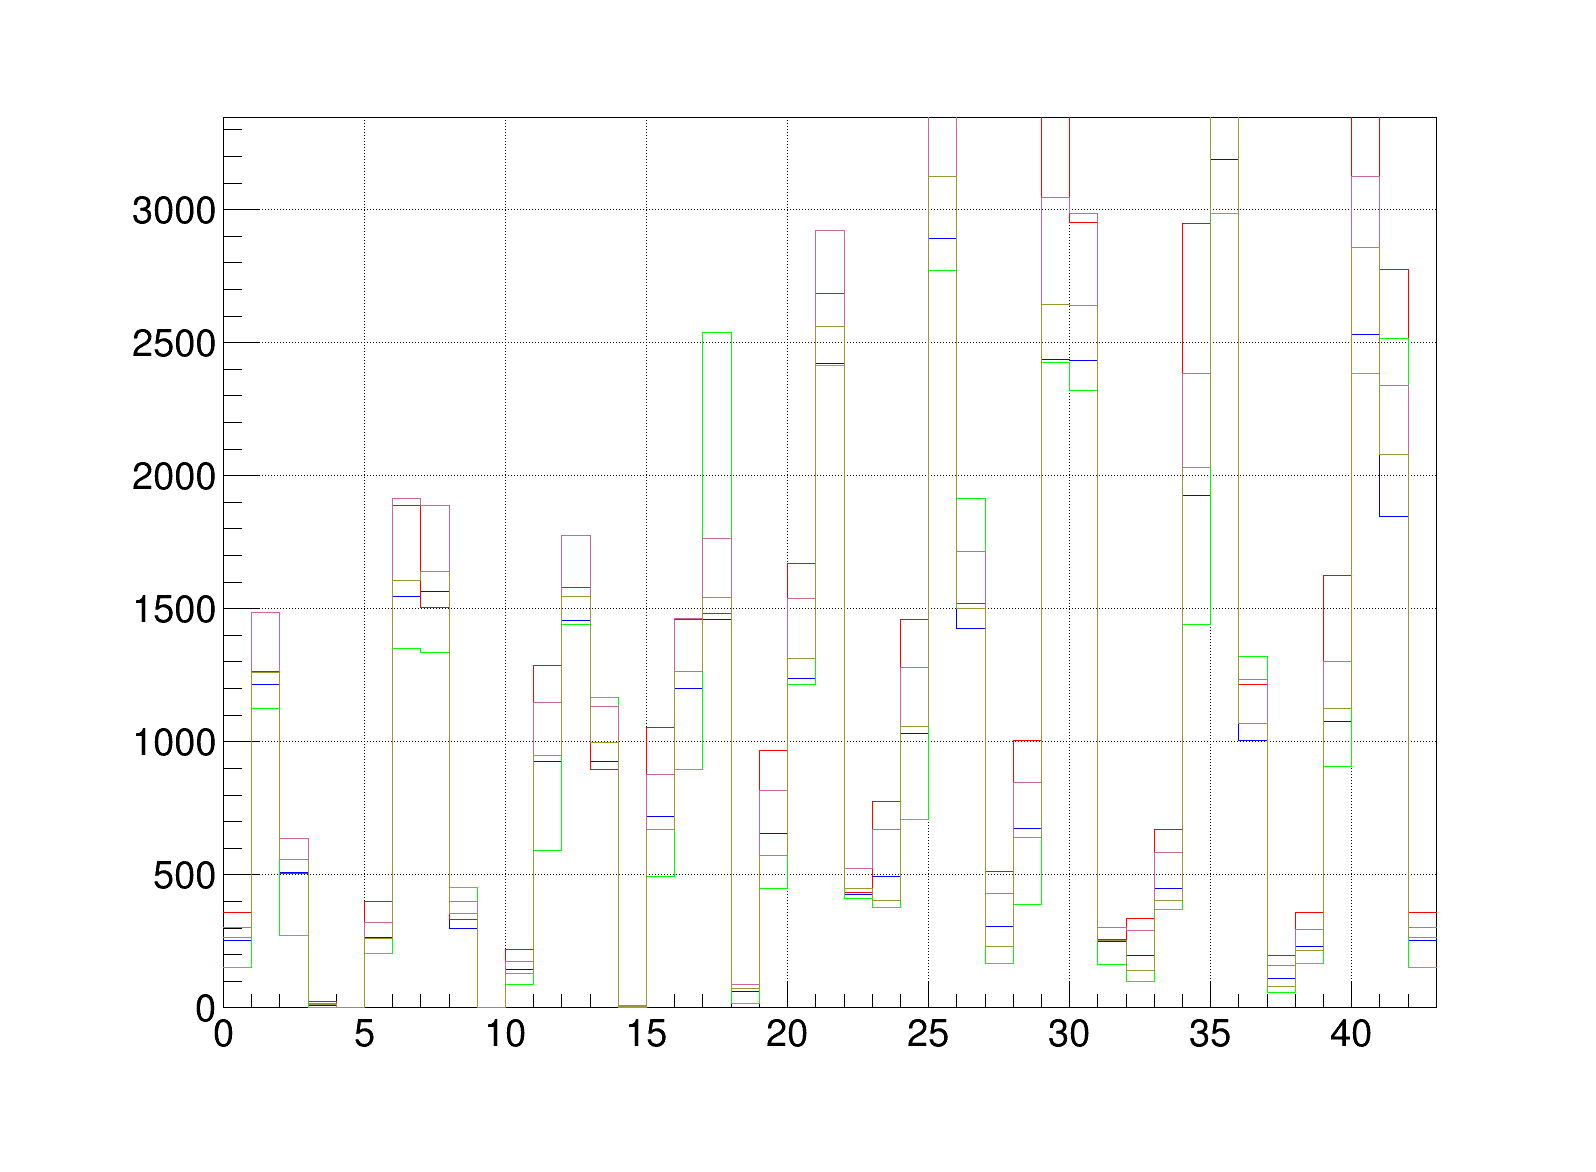

In [20]:
h_rate_g3.Draw()
h_rate_g2.Draw('same')
h_rate_gibuu.Draw('same')
h_rate_neut.Draw('same')
h_rate_nuwro.Draw('same')
c1.Draw()


In [21]:
h_xsec_g3 = f_g3.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_Fine2D;1')
h_xsec_g3.Scale(N_tot*flux_cv)
#h_xsec_g3.Draw('colz')
#c1.Draw()
print h_xsec_g3.GetSumOfWeights()
sum_overflow = 0
for i in range(250,700):
    for j in range(0,1000):
        sum_overflow += h_xsec_g3.GetBinContent(i,j)
        #if(h_xsec_g3.GetBinContent(j,i)>1):
        #    print i,j,h_xsec_g3.GetBinContent(j,i) 
bin1 = 0  
bin_1 = 254.05229187
for i in range(0,18):
    for j in range(0,1000):
        bin1 += h_xsec_g3.GetBinContent(i,j)
        #if(h_xsec_g3.GetBinContent(j,i)>1):
        #    print i,j,h_xsec_g3.GetBinContent(j,i) 
    #print h_xsec_g3.GetBinContent(400,i),h_xsec_g3.GetBinContent(401,i)
    
    #print h_xsec_g3.GetBinContent(1,i),h_xsec_g3.GetBinContent(0,i),h_xsec_g3.GetBinContent(-1,i),h_xsec_g3.GetBinContent(-2,i)    
    #sum_overflow += h_xsec_g3.GetBinContent(501,i)
sum_overflow = sum_overflow/bin1*bin_1
print sum_overflow

2120215539.9
231.735386628


In [22]:
pot = 2.144e+20

h_this_true = h_true_g3_tune.Clone()

for i in range(43):
    h_this_true.SetBinError(i+1,0)

h_this_pred = h_this_true.Clone()
h_this_pred = CC.smear_plot(h_this_pred)
h_this_pred.Add(h_bkg)
h_this_pred.Add(h_dirt)
h_this_pred.Add(h_ext)

'''frac_det = return_detsys_covar(h_this_true,pot)
np.save(outputdir+'frac_det',frac_det)
frac_other = return_other_covar(h_this_true,pot)
np.save(outputdir+'frac_other',frac_other)
frac_all = return_all_covar(h_this_true,pot)
np.save(outputdir+'frac_all',frac_all)
frac_crt =  return_crt_covar(h_this_true,2.144e+20)
np.save(outputdir+'frac_crt',frac_crt)
frac_stat = return_stat_covar(h_this_pred)
np.save(outputdir+'frac_stat',frac_stat)
frac_dirt = return_dirt_covar(h_this_true,h_bkg,h_ext,h_dirt)
np.save(outputdir+'frac_dirt',frac_dirt)
frac_pot = return_pot_covar(h_this_true,h_bkg,h_ext,h_dirt)
np.save(outputdir+'frac_pot',frac_pot)
frac_flux = return_flux_covar(h_this_true,pot)
np.save(outputdir+'frac_flux',frac_flux)
'''


"frac_det = return_detsys_covar(h_this_true,pot)\nnp.save(outputdir+'frac_det',frac_det)\nfrac_other = return_other_covar(h_this_true,pot)\nnp.save(outputdir+'frac_other',frac_other)\nfrac_all = return_all_covar(h_this_true,pot)\nnp.save(outputdir+'frac_all',frac_all)\nfrac_crt =  return_crt_covar(h_this_true,2.144e+20)\nnp.save(outputdir+'frac_crt',frac_crt)\nfrac_stat = return_stat_covar(h_this_pred)\nnp.save(outputdir+'frac_stat',frac_stat)\nfrac_dirt = return_dirt_covar(h_this_true,h_bkg,h_ext,h_dirt)\nnp.save(outputdir+'frac_dirt',frac_dirt)\nfrac_pot = return_pot_covar(h_this_true,h_bkg,h_ext,h_dirt)\nnp.save(outputdir+'frac_pot',frac_pot)\nfrac_flux = return_flux_covar(h_this_true,pot)\nnp.save(outputdir+'frac_flux',frac_flux)\n"

Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).


In [23]:
frac_dir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/My_Measurement/plots/'
#frac_dir = outputdir
frac_det = np.load(frac_dir+'frac_det_GuB.npy')
frac_other = np.load(frac_dir+'frac_other_GuB.npy')
frac_all = np.load(frac_dir+'frac_det_all_GuB.npy')
frac_crt = np.load(frac_dir+'frac_crt_GuB.npy')
frac_stat = np.load(frac_dir+'frac_stat_GuB.npy')
frac_dirt = np.load(frac_dir+'frac_dirt_GuB.npy')
frac_pot = np.load(frac_dir+'frac_pot_GuB.npy')
frac_flux = np.load(frac_dir+'frac_det_flux_GuB.npy')


frac_tot = frac_det+frac_other+frac_all+frac_flux+frac_crt+frac_dirt+frac_stat+frac_pot
np.save(outputdir+'frac_tot',frac_tot)

#frac_tot = np.load(outputdir+'frac_tot.npy')


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/frac_err_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/frac_err_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/frac_err_detsys.pdf has been created
Warning in <TFile::Append>: Replacing existing TH1: h_this_err (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/frac_err_other.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/frac_err_other.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved

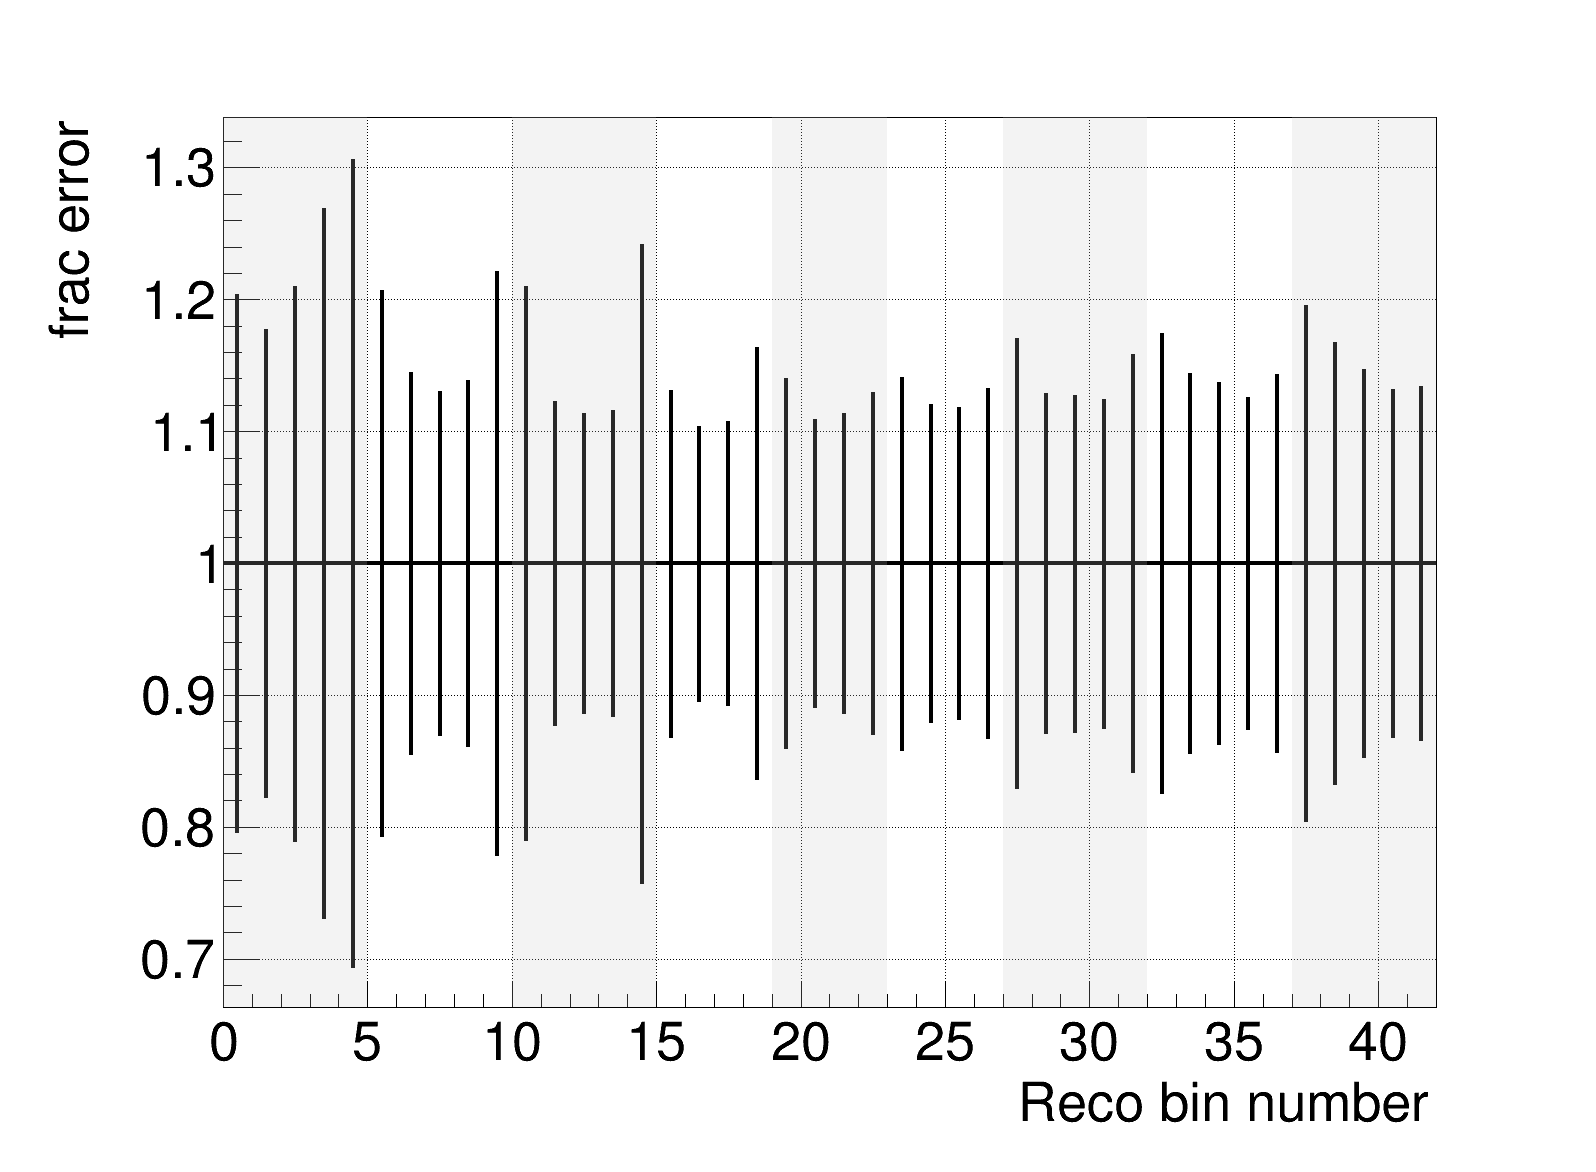

In [24]:
h_frac = FF.plot_err_array(frac_det)
h_frac.Draw()
h_histo = FF.histBkg(h_frac)
h_histo.Draw('hist same')
c1.Draw()
c1.SaveAs(outputdir_png + 'frac_err_detsys'+".png")
c1.SaveAs(outputdir_root + 'frac_err_detsys'+".root")
c1.SaveAs(outputdir_pdf + 'frac_err_detsys'+".pdf")
h_frac = FF.plot_err_array(frac_other)
h_frac.Draw()
h_histo.Draw('hist same')

c1.Draw()
c1.SaveAs(outputdir_png + 'frac_err_other'+".png")
c1.SaveAs(outputdir_root + 'frac_err_other'+".root")
c1.SaveAs(outputdir_pdf + 'frac_err_other'+".pdf")
h_frac = FF.plot_err_array(frac_all)
h_frac.Draw()
h_histo.Draw('hist same')

c1.Draw()
c1.SaveAs(outputdir_png + 'frac_err_all'+".png")
c1.SaveAs(outputdir_root + 'frac_err_all'+".root")
c1.SaveAs(outputdir_pdf + 'frac_err_all'+".pdf")
h_frac = FF.plot_err_array(frac_flux)
h_frac.Draw()
h_histo.Draw('hist same')

c1.Draw()
c1.SaveAs(outputdir_png + 'frac_err_flux'+".png")
c1.SaveAs(outputdir_root + 'frac_err_flux'+".root")
c1.SaveAs(outputdir_pdf + 'frac_err_flux'+".pdf")
h_frac = FF.plot_err_array(frac_crt)
h_frac.Draw()
h_histo.Draw('hist same')

c1.Draw()
c1.SaveAs(outputdir_png + 'frac_err_crt'+".png")
c1.SaveAs(outputdir_root + 'frac_err_crt'+".root")
c1.SaveAs(outputdir_pdf + 'frac_err_crt'+".pdf")
h_frac = FF.plot_err_array(frac_stat)
h_frac.Draw()
h_histo.Draw('hist same')

c1.Draw()
c1.SaveAs(outputdir_png + 'frac_err_stat'+".png")
c1.SaveAs(outputdir_root + 'frac_err_stat'+".root")
c1.SaveAs(outputdir_pdf + 'frac_err_stat'+".pdf")
h_frac = FF.plot_err_array(frac_dirt)
h_frac.Draw()
h_histo.Draw('hist same')

c1.Draw()
c1.SaveAs(outputdir_png + 'frac_err_dirt'+".png")
c1.SaveAs(outputdir_root + 'frac_err_dirt'+".root")
c1.SaveAs(outputdir_pdf + 'frac_err_dirt'+".pdf")

h_frac = FF.plot_err_array(frac_pot)
h_frac.Draw()
h_histo.Draw('hist same')
c1.Draw()
c1.SaveAs(outputdir_png + 'frac_err_pot'+".png")
c1.SaveAs(outputdir_root + 'frac_err_pot'+".root")
c1.SaveAs(outputdir_pdf + 'frac_err_pot'+".pdf")

h_frac = FF.plot_err_array(frac_tot)
h_frac.Draw()
h_histo.Draw('hist same')

c1.Draw()
c1.SaveAs(outputdir_png + 'frac_err_tot'+".png")
c1.SaveAs(outputdir_root + 'frac_err_tot'+".root")
c1.SaveAs(outputdir_pdf + 'frac_err_tot'+".pdf")

In [25]:
def getVar(this_pred,this_frac):
    n_bins = [42,0]#this_frac.shape
    covar = np.zeros((n_bins[0],n_bins[0]))
    corr = np.zeros((n_bins[0],n_bins[0]))
    for i in range(n_bins[0]):
        for j in range(n_bins[0]):
            covar[i][j] = this_frac[i][j]*this_pred[i]*this_pred[j]
    for i in range(n_bins[0]):
        for j in range(n_bins[0]):    
            corr[i][j] = covar[i][j]/(math.sqrt(covar[i][i])*math.sqrt(covar[j][j]))
    return covar, corr
    
    

In [26]:
def plot_arr(arr,modelname):
    ROOT.gStyle.SetOptTitle(1)
    h_tmp = FF.arr2plot(arr)
    if arr.ndim ==2:
        h_tmp.SetYTitle('Bin number')
        h_tmp.SetXTitle('Bin number')
    else:
        h_tmp.SetXTitle('Bin number')
    h_tmp.SetTitle(modelname)
    FF.main_plot(h_tmp)
    h_tmp.Draw('colz')
    c1.Draw()
    c1.SaveAs(outputdir_png +modelname+".png")
    c1.SaveAs(outputdir_root +modelname+".root")
    c1.SaveAs(outputdir_pdf +modelname+".pdf") 
    ROOT.gStyle.SetOptTitle(0)
    return

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Covar_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Covar_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Covar_detsys.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Correlation_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Correlation_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Correlation_detsys.pdf has been created
Info in <TCanvas::Print>: 

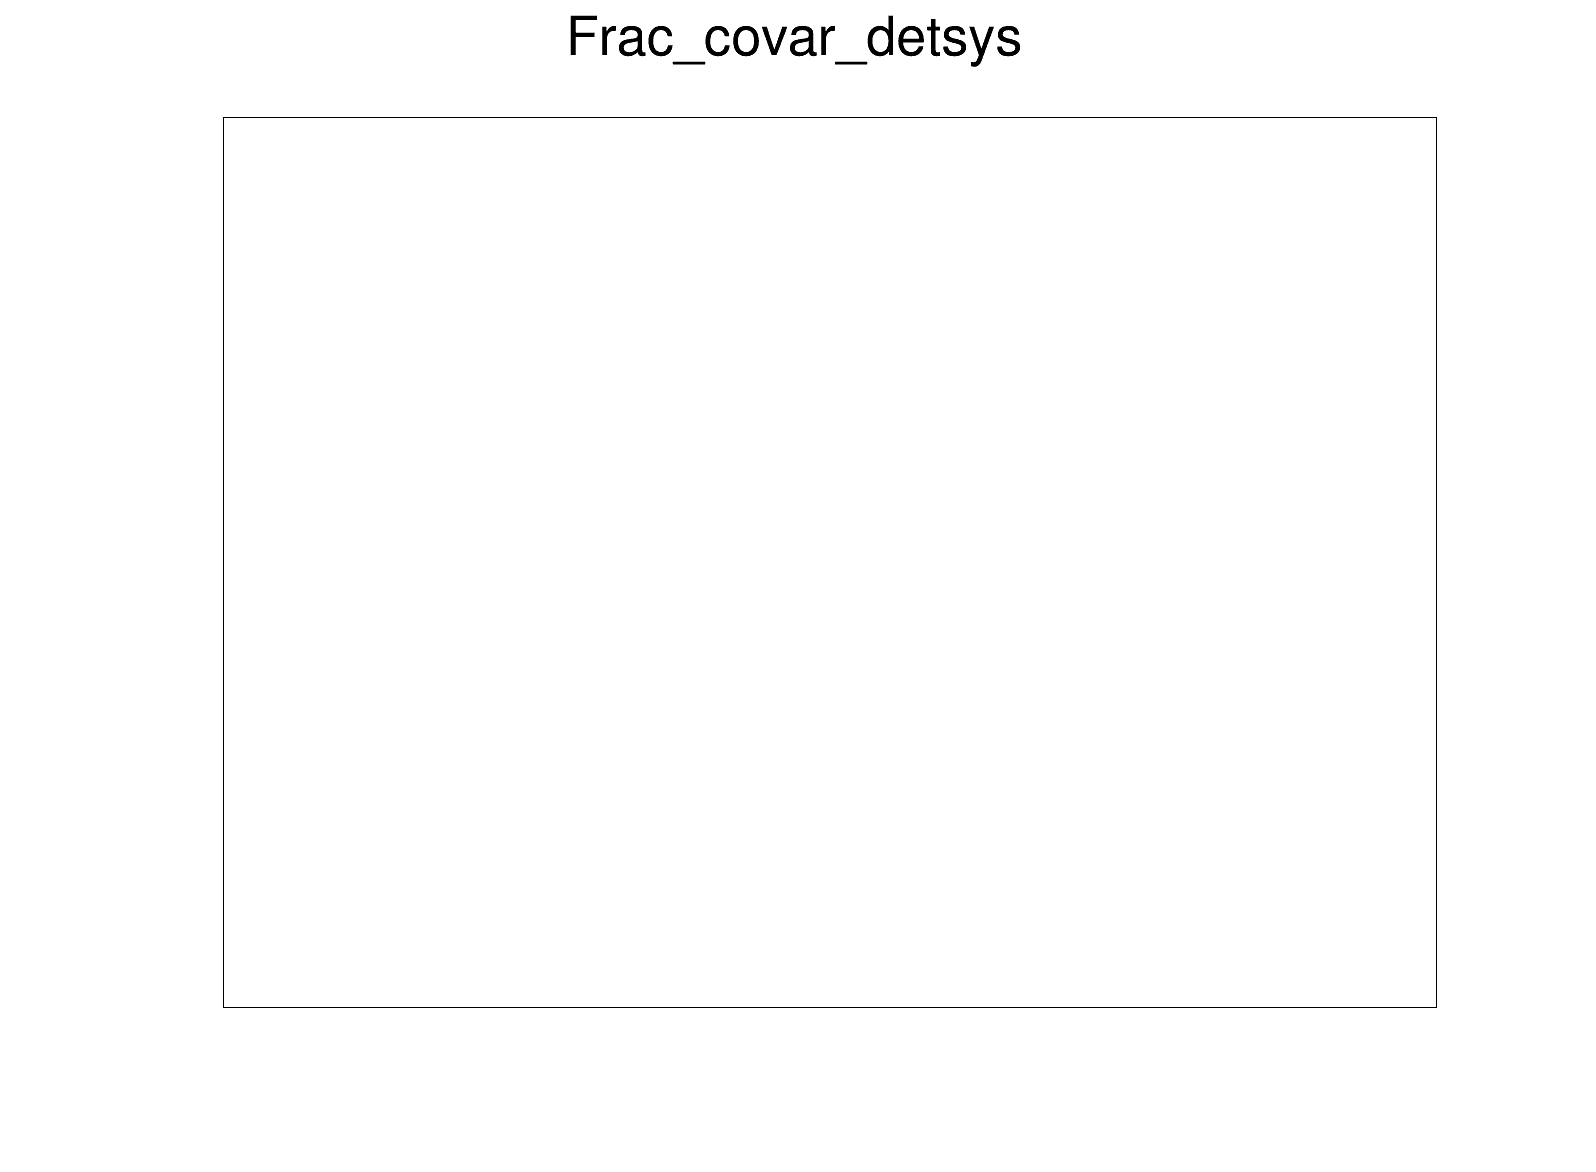

In [27]:
covar, corr = getVar(FF.plot2arr(h_this_pred,1),frac_det)
plot_arr(covar,'Covar_detsys')
plot_arr(corr,'Correlation_detsys')
plot_arr(frac_tot,'Frac_covar_detsys')

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Covar_otherGenie.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Covar_otherGenie.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Covar_otherGenie.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Correlation_otherGenie.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Correlation_otherGenie.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Correlation_otherGenie.pdf has been created
In

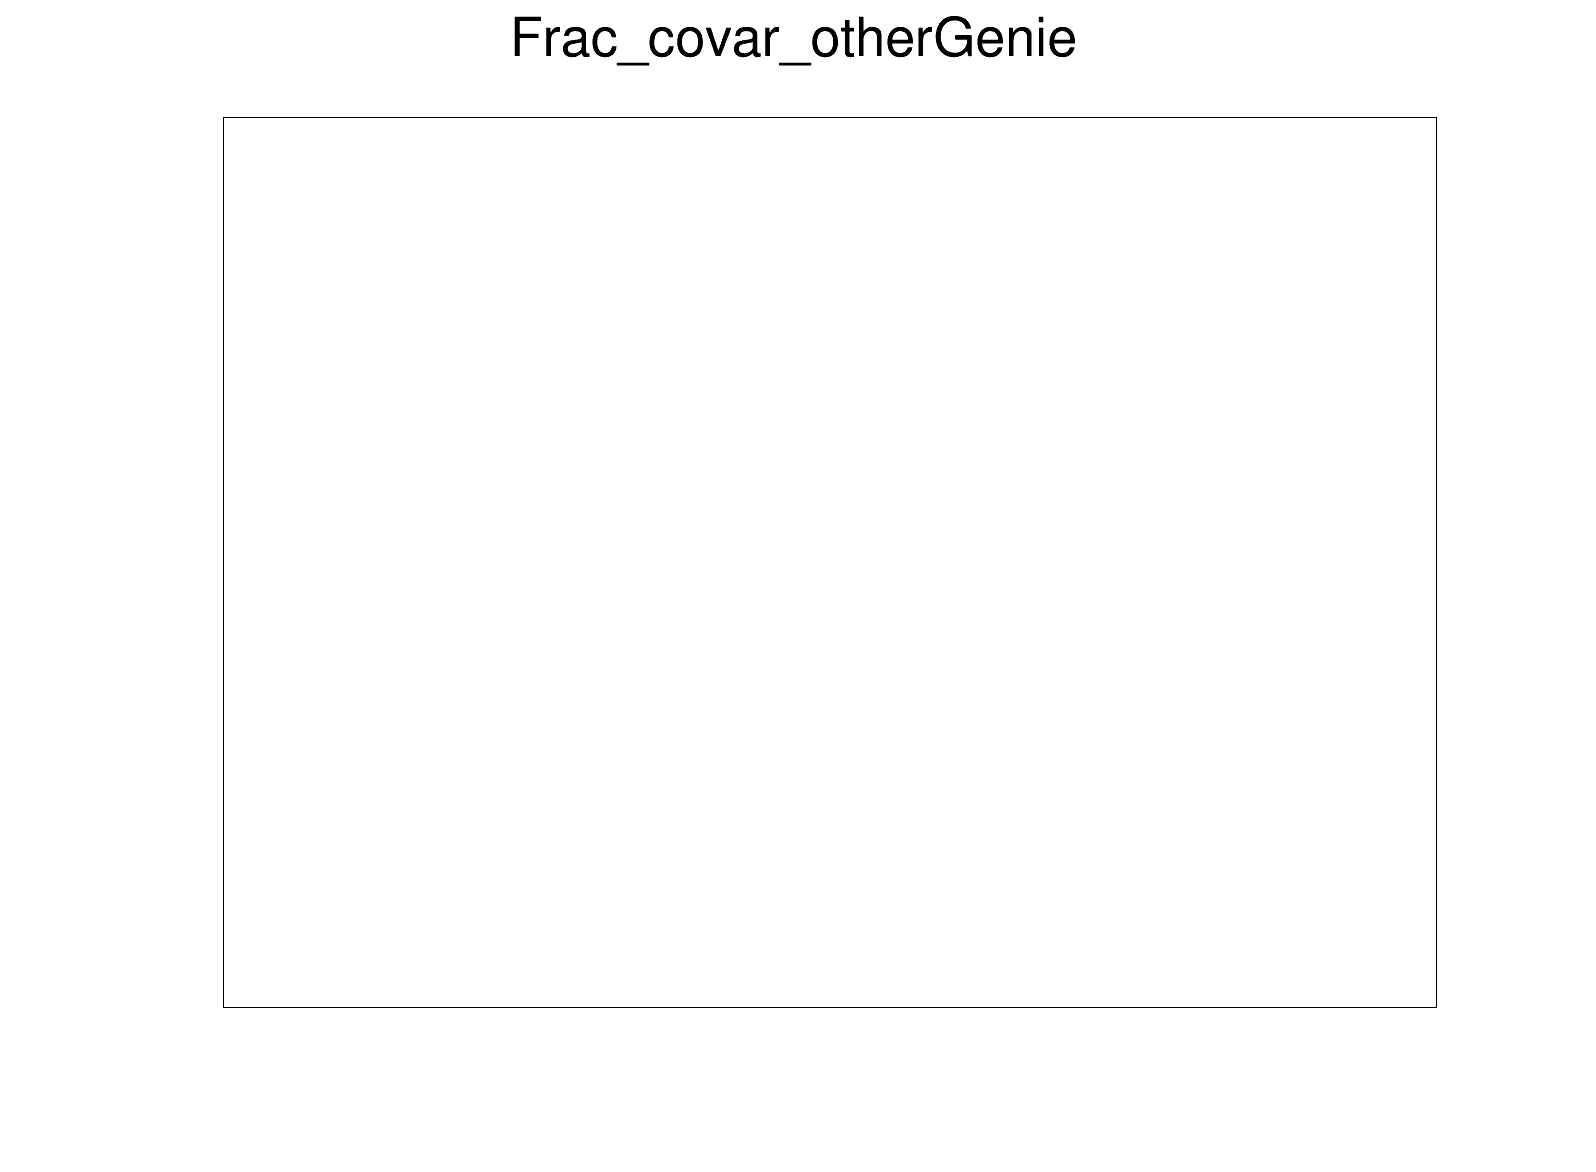

In [28]:
covar, corr = getVar(FF.plot2arr(h_this_pred,1),frac_other)
plot_arr(covar,'Covar_otherGenie')
plot_arr(corr,'Correlation_otherGenie')
plot_arr(frac_tot,'Frac_covar_otherGenie')

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Covar_allGenie.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Covar_allGenie.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Covar_allGenie.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Correlation_allGenie.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Correlation_allGenie.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Correlation_allGenie.pdf has been created
Info in <TCanv

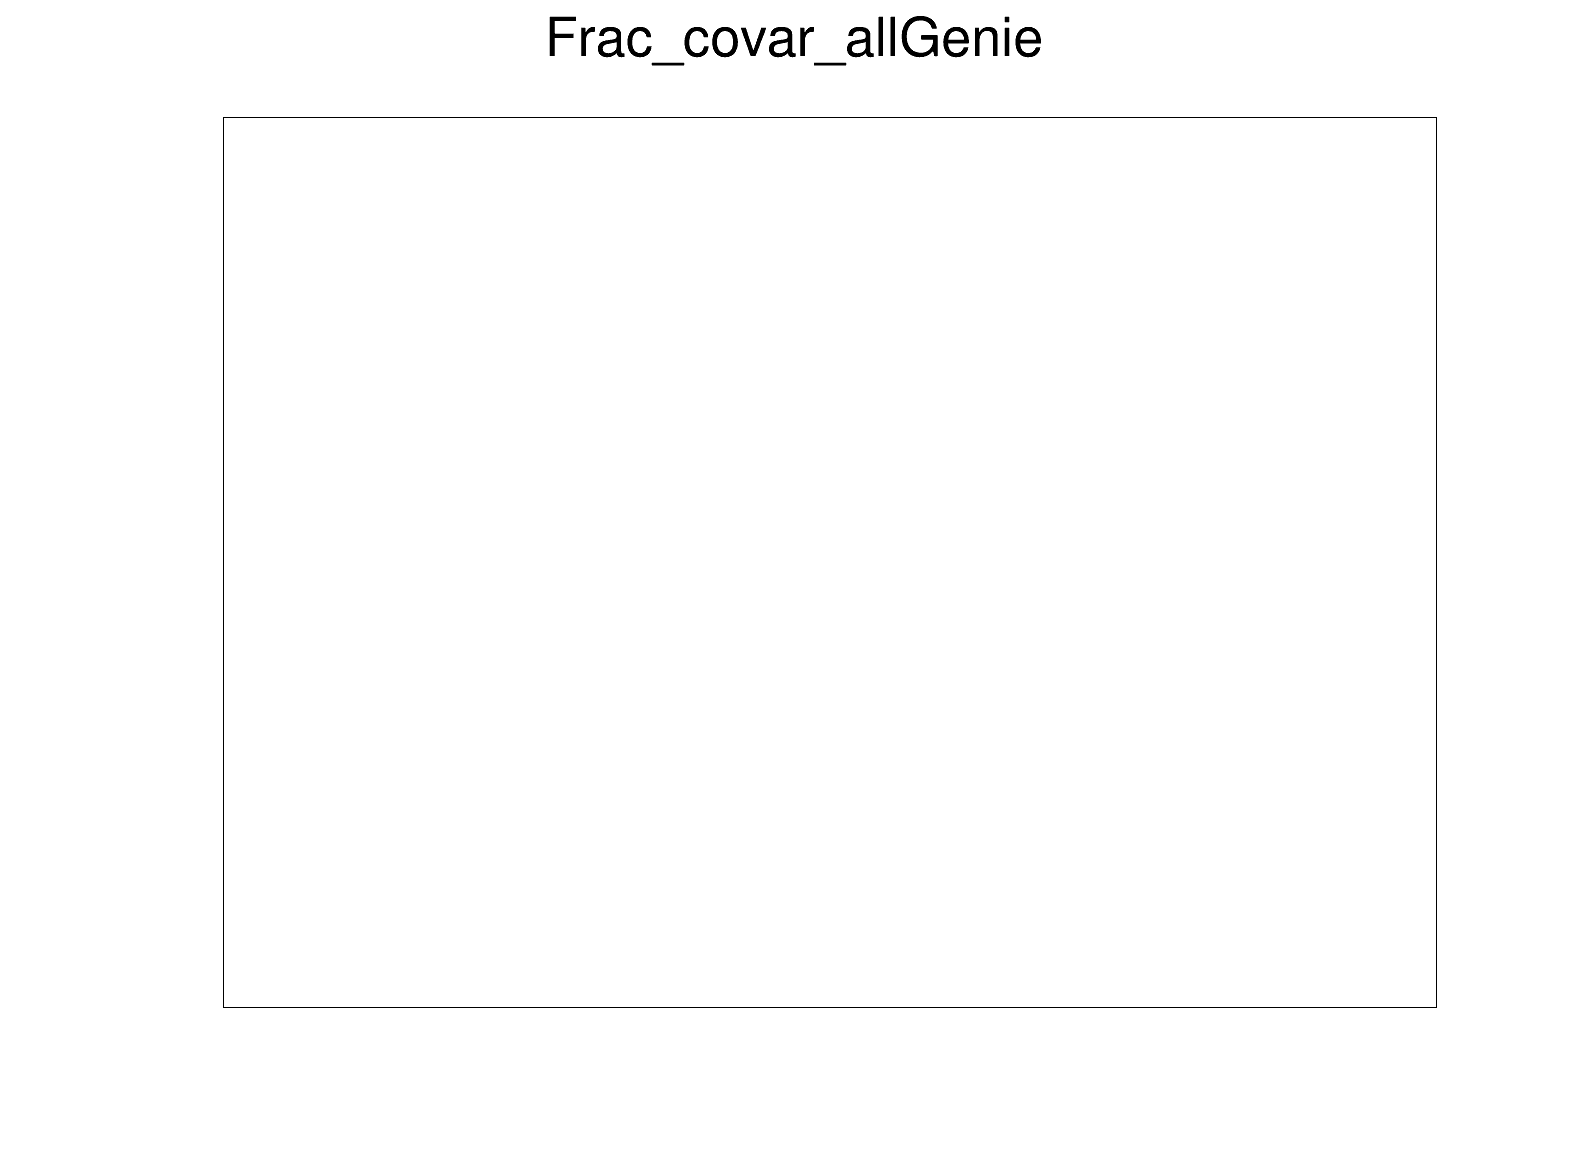

In [29]:
covar, corr = getVar(FF.plot2arr(h_this_pred,1),frac_all)
plot_arr(covar,'Covar_allGenie')
plot_arr(corr,'Correlation_allGenie')
plot_arr(frac_tot,'Frac_covar_allGenie')

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Covar_fluxsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Covar_fluxsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Covar_fluxsys.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Correlation_fluxsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Correlation_fluxsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Correlation_fluxsys.pdf has been created
Info in <TCanvas::Pr

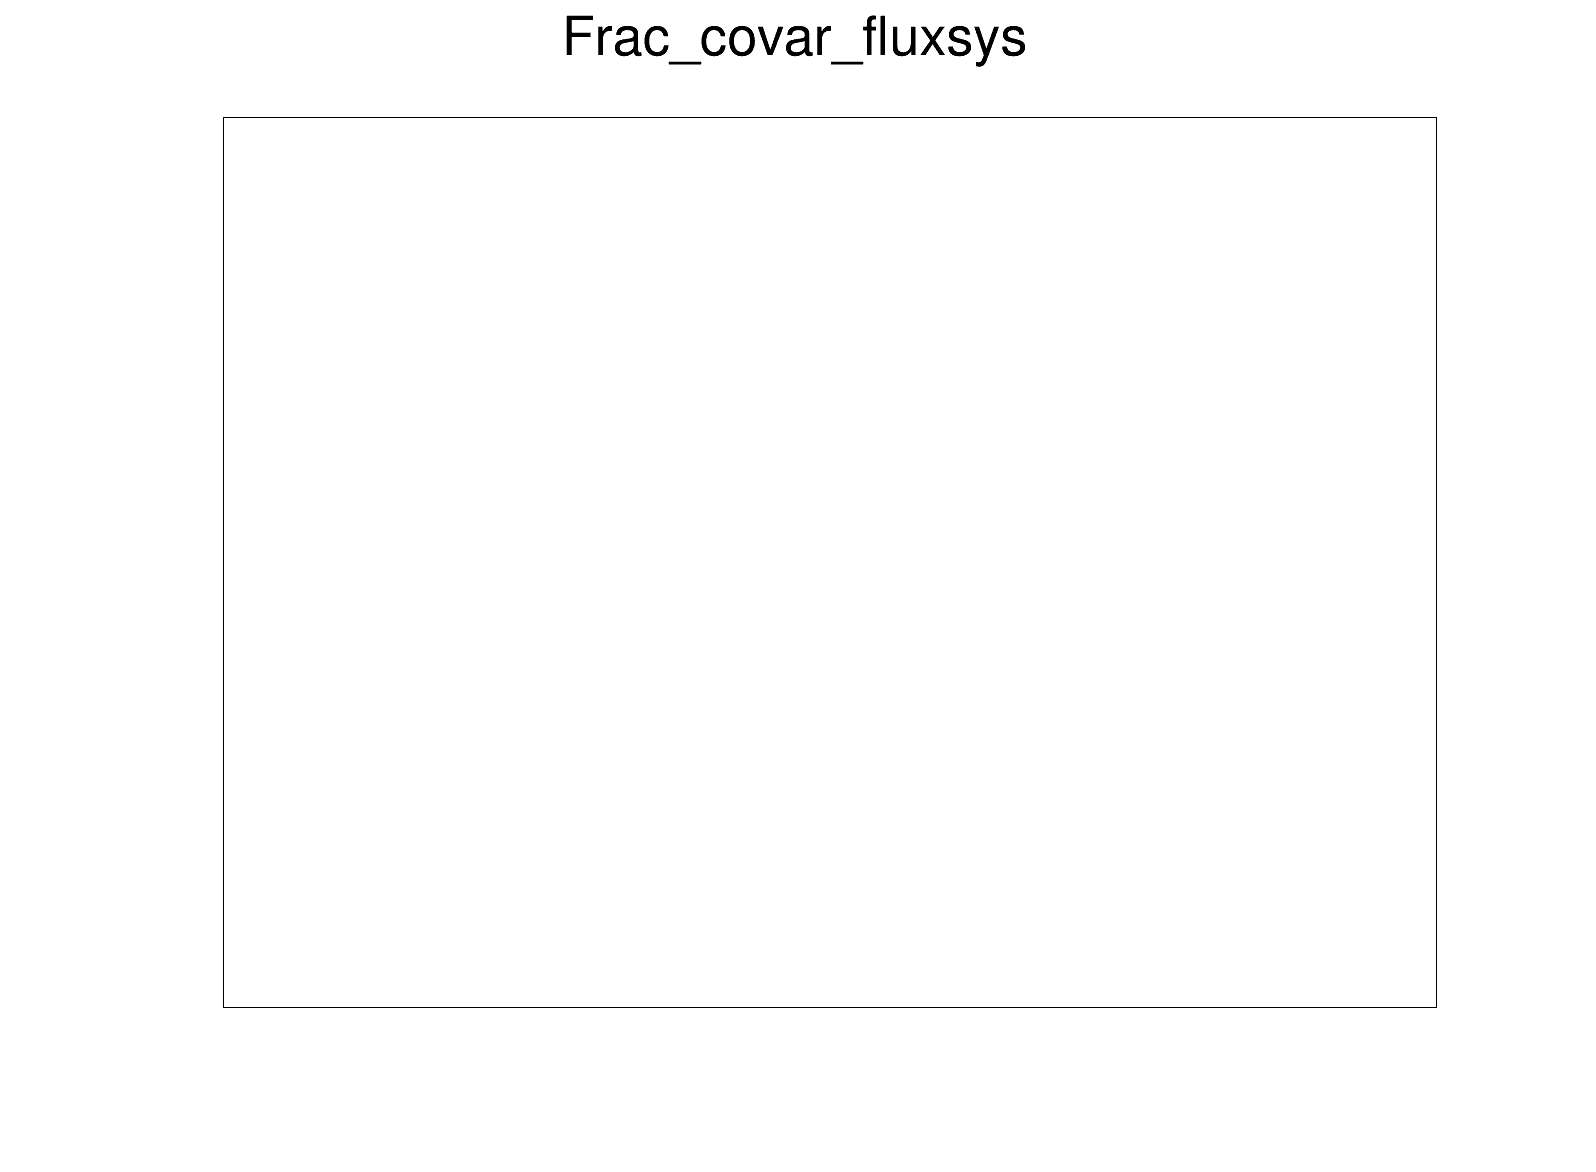

In [30]:
covar, corr = getVar(FF.plot2arr(h_this_pred,1),frac_flux)
plot_arr(covar,'Covar_fluxsys')
plot_arr(corr,'Correlation_fluxsys')
plot_arr(frac_tot,'Frac_covar_fluxsys')

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Covar_crt.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Covar_crt.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Covar_crt.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Correlation_crt.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Correlation_crt.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Correlation_crt.pdf has been created
Info in <TCanvas::Print>: png file /home/tme

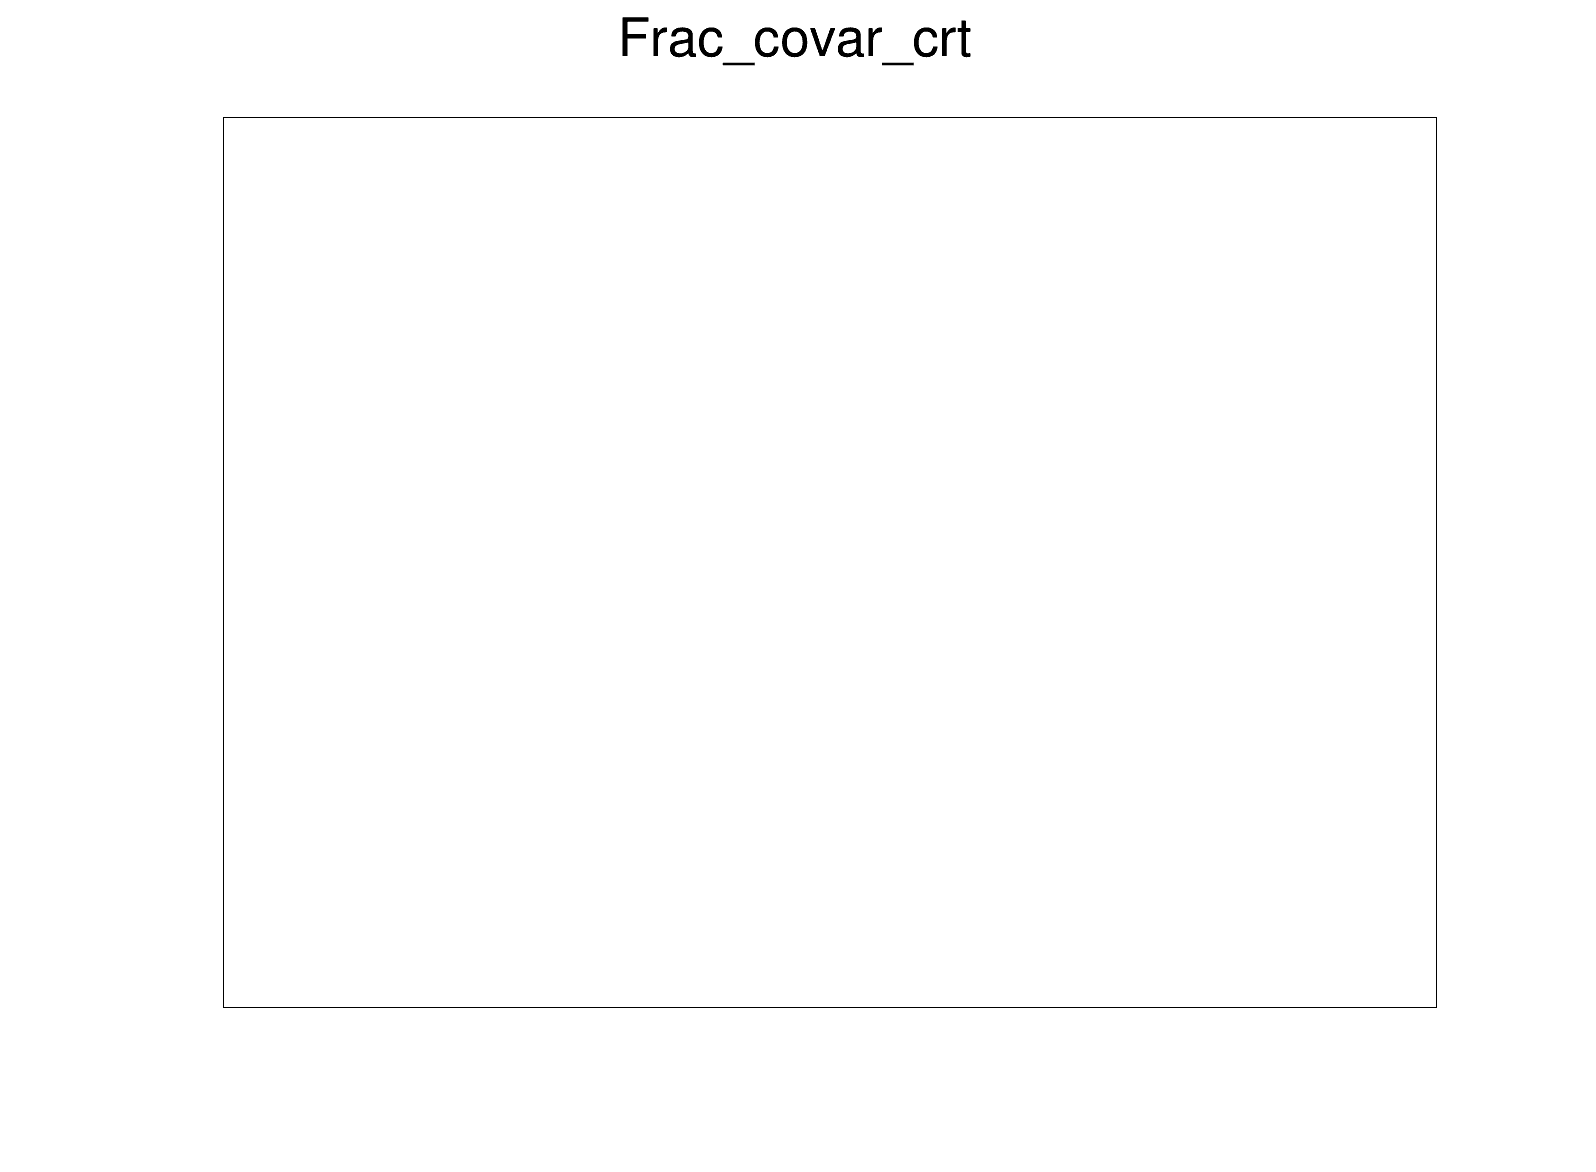

In [31]:
covar, corr = getVar(FF.plot2arr(h_this_pred,1),frac_crt)
plot_arr(covar,'Covar_crt')
plot_arr(corr,'Correlation_crt')
plot_arr(frac_tot,'Frac_covar_crt')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Covar_dirt.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Covar_dirt.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Covar_dirt.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Correlation_dirt.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Correlation_dirt.root has been created
Info in <TCanvas::Pri

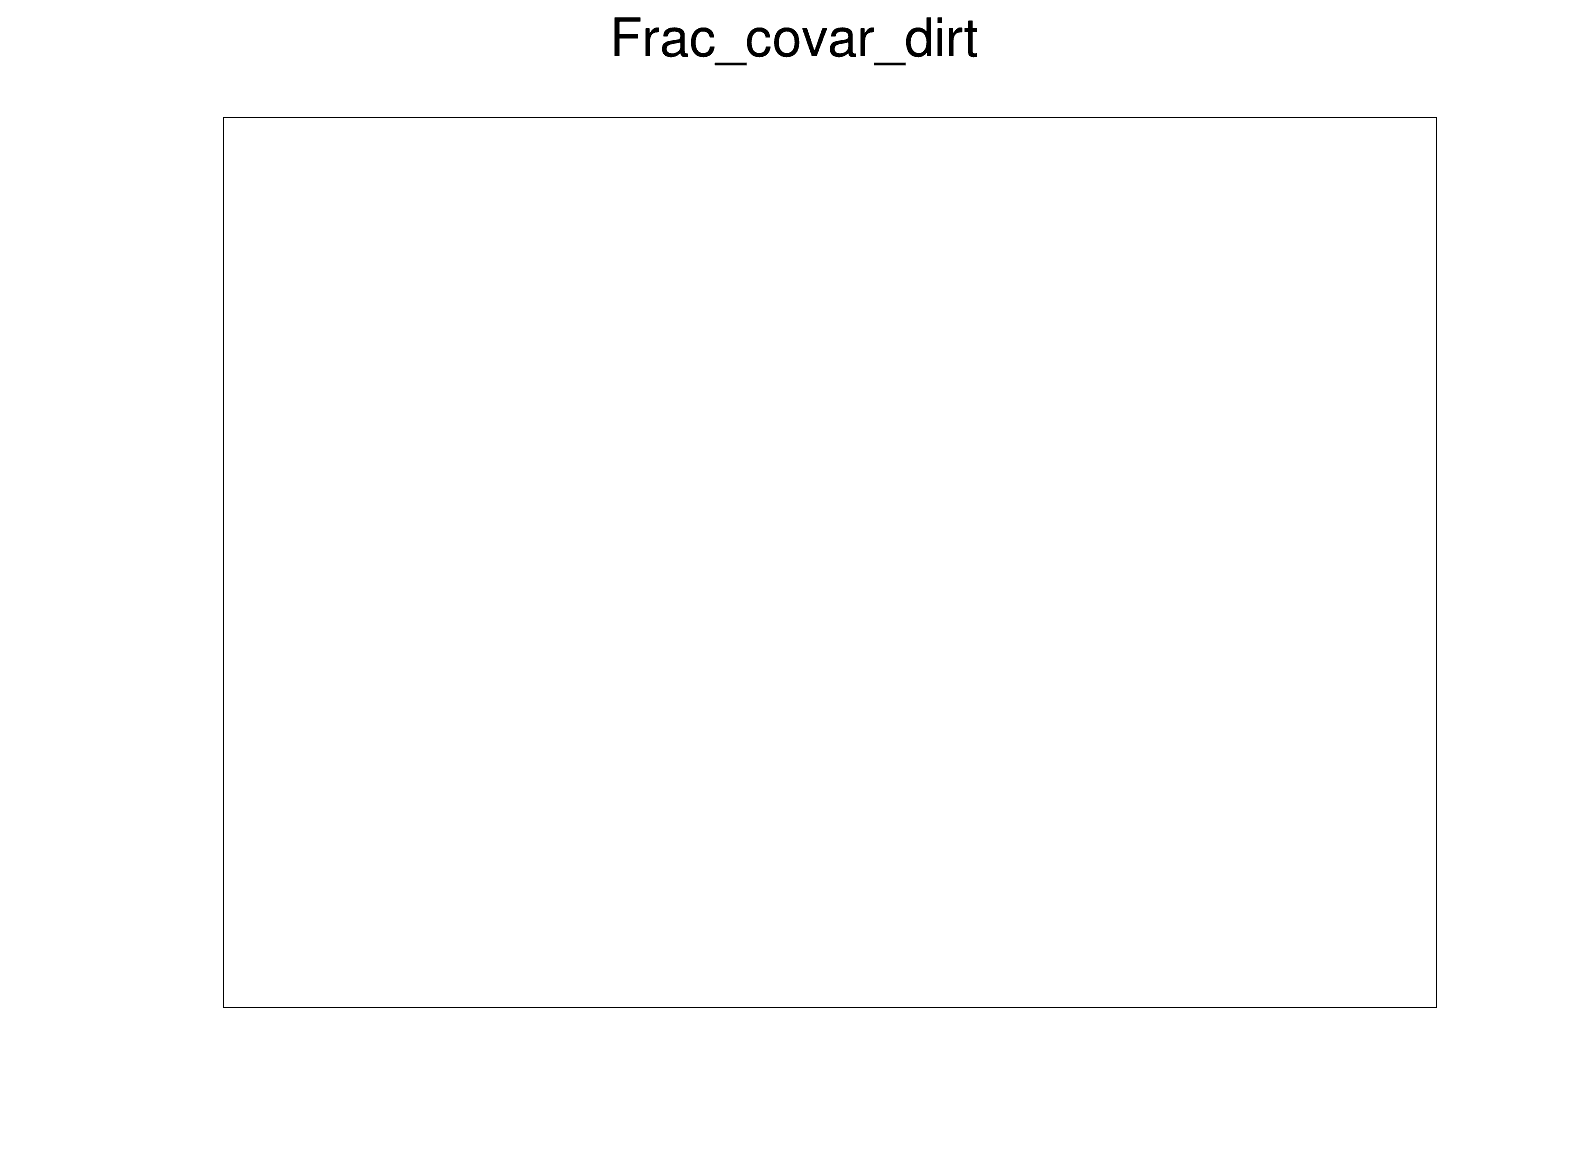

In [32]:
covar, corr = getVar(FF.plot2arr(h_this_pred,1),frac_dirt)
plot_arr(covar,'Covar_dirt')
plot_arr(corr,'Correlation_dirt')
plot_arr(frac_tot,'Frac_covar_dirt')

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Covar_stat.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Covar_stat.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Covar_stat.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Correlation_stat.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Correlation_stat.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Correlation_stat.pdf has been created
Info in <TCanvas::Print>: png file /ho

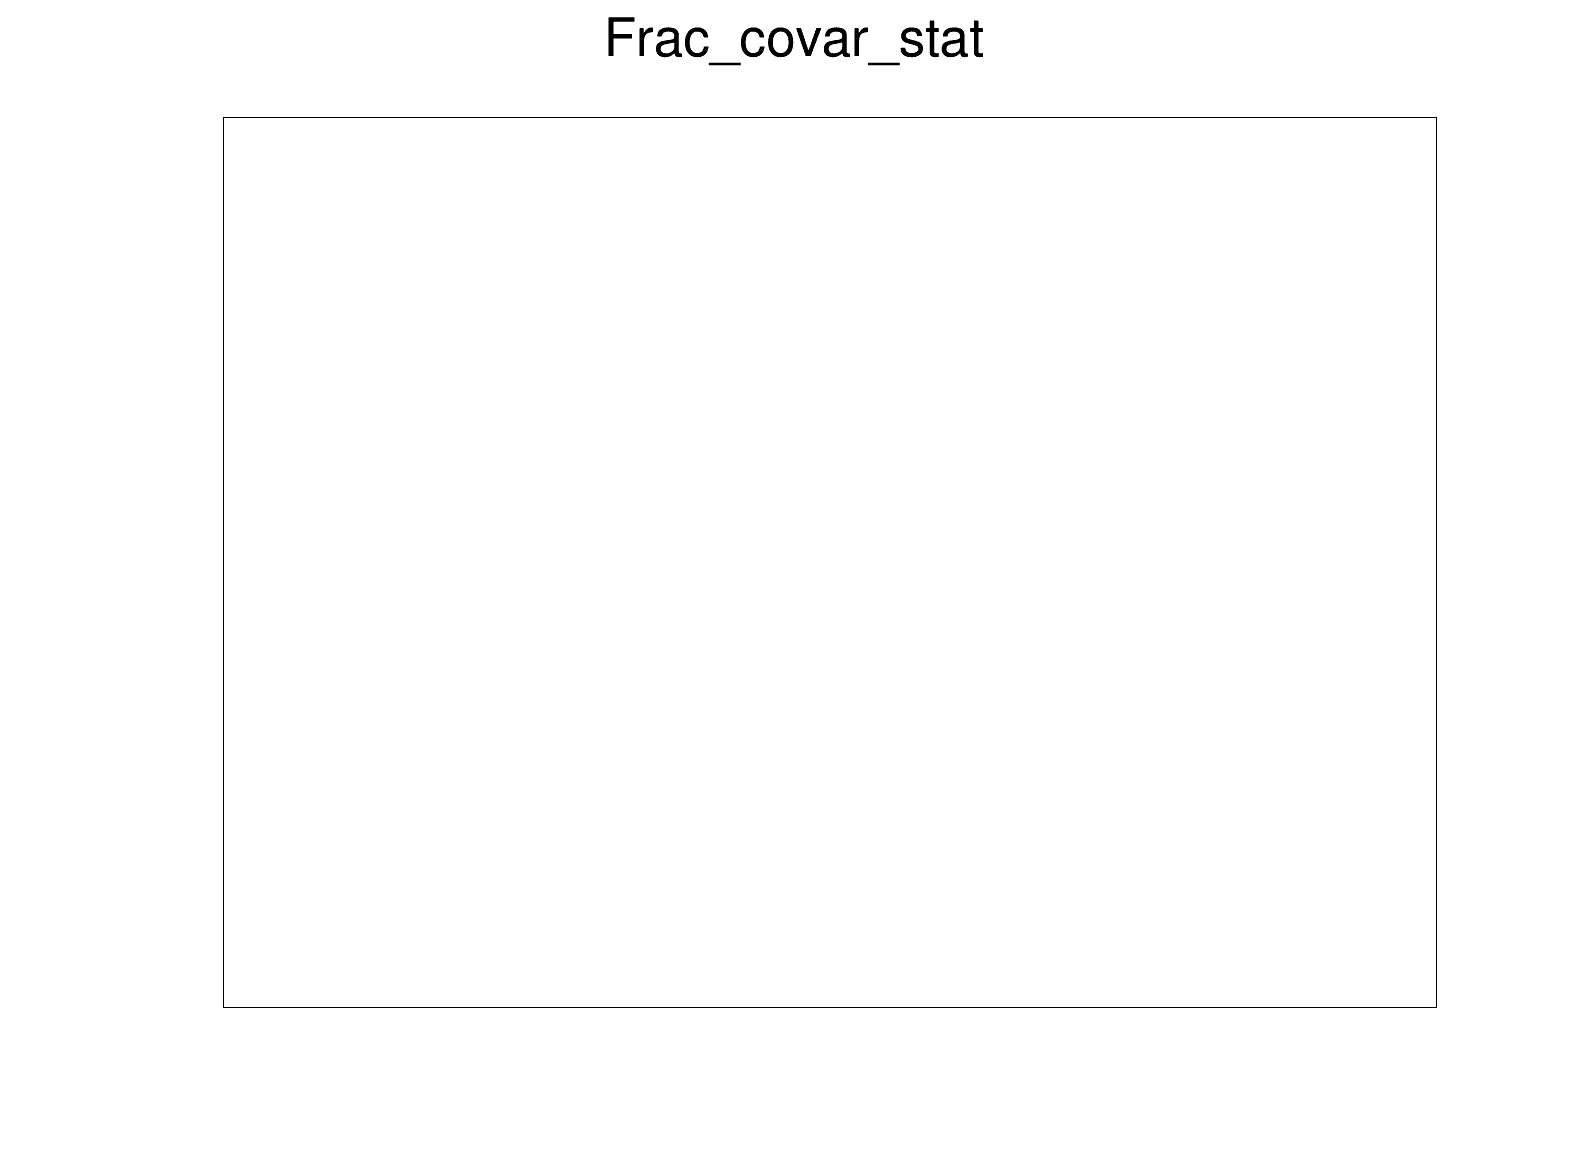

In [33]:
covar, corr = getVar(FF.plot2arr(h_this_pred,1),frac_stat)
plot_arr(covar,'Covar_stat')
plot_arr(corr,'Correlation_stat')
plot_arr(frac_tot,'Frac_covar_stat')

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Covar_pot.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Covar_pot.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Covar_pot.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Correlation_pot.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Correlation_pot.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Correlation_pot.pdf has been created
Info in <TCanvas::Print>: png file /home/tme

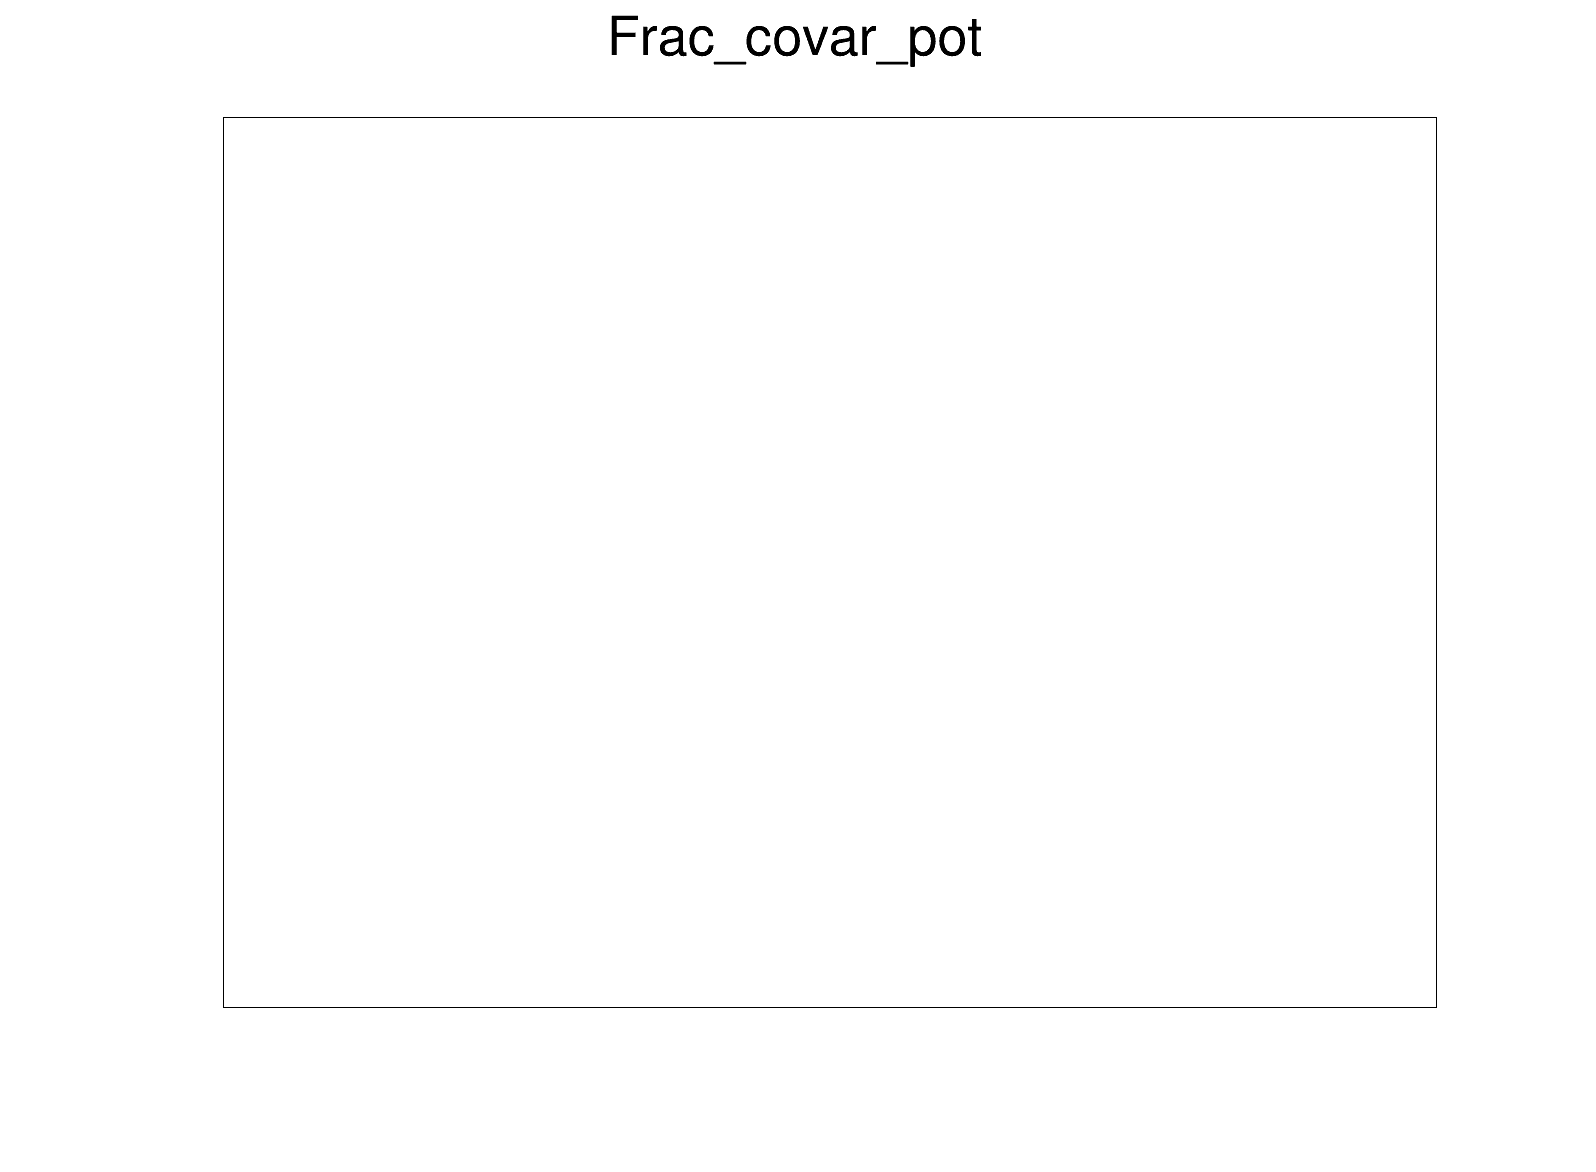

In [34]:
covar, corr = getVar(FF.plot2arr(h_this_pred,1),frac_pot)
plot_arr(covar,'Covar_pot')
plot_arr(corr,'Correlation_pot')
plot_arr(frac_tot,'Frac_covar_pot')

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Covar.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Covar.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Covar.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Correlation.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Correlation.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Correlation.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_

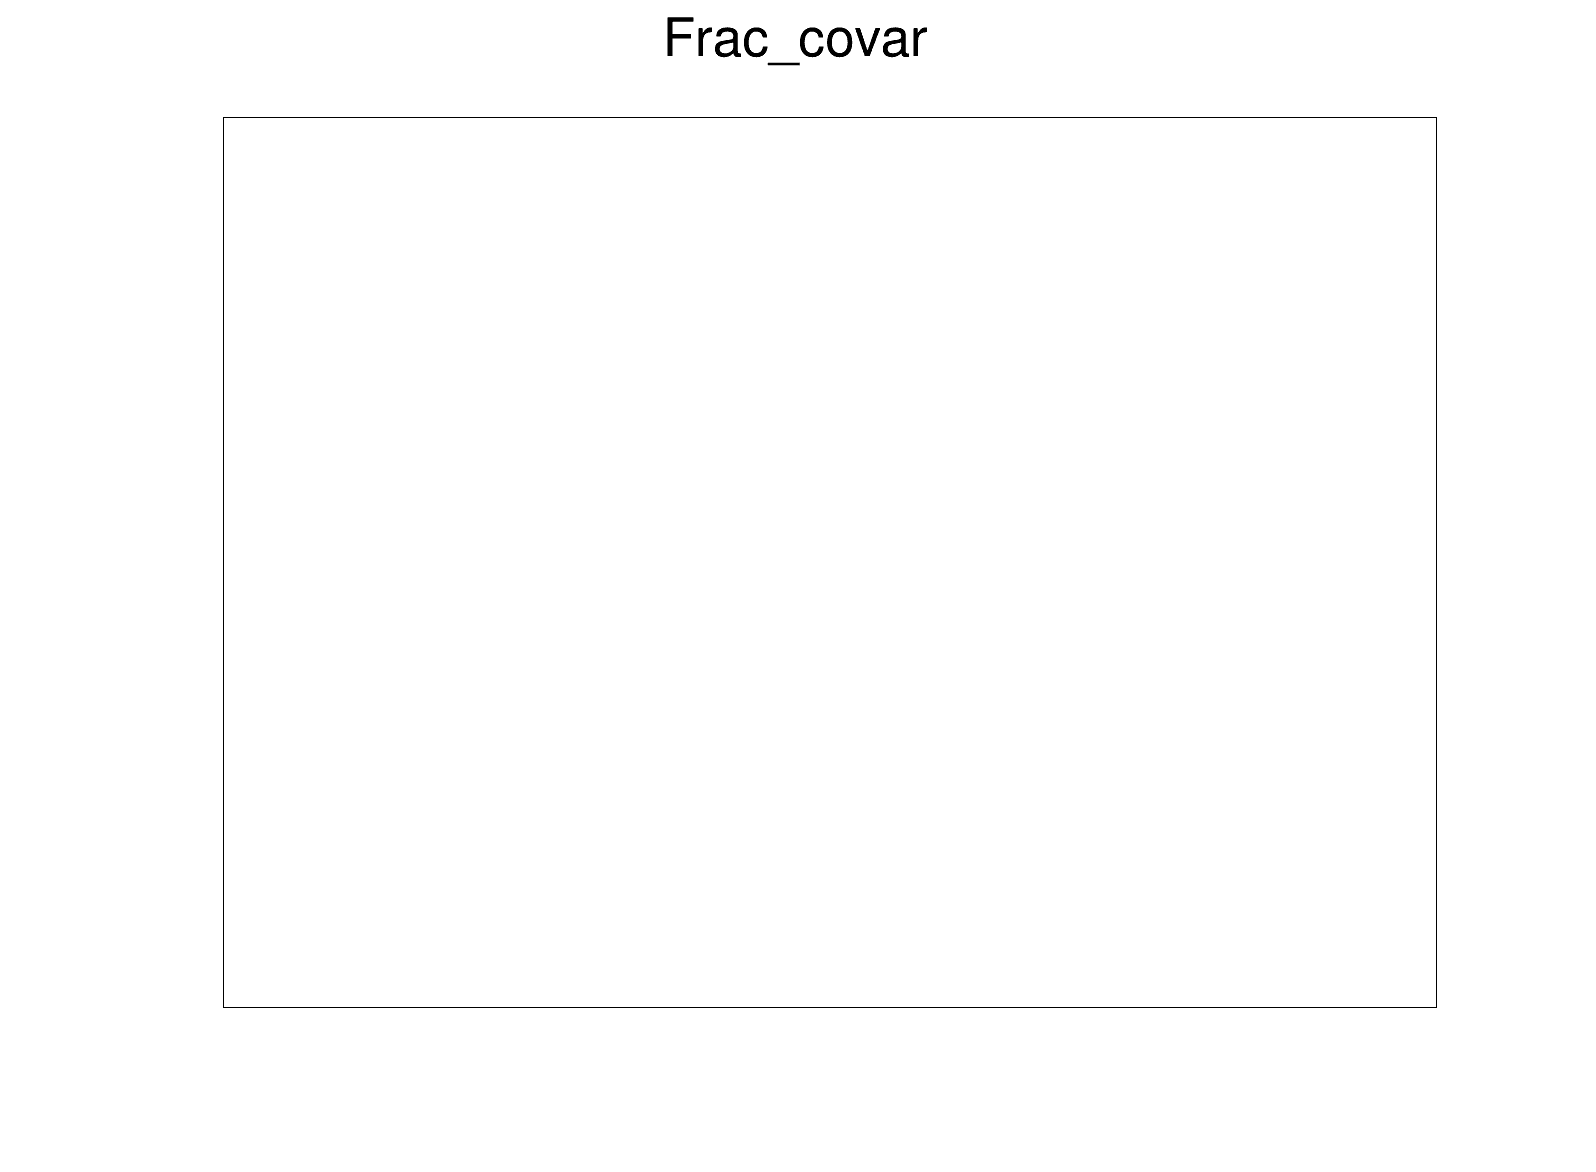

In [35]:
covar, corr = getVar(FF.plot2arr(h_this_pred,1),frac_tot)
plot_arr(covar,'Covar')
plot_arr(corr,'Correlation')
plot_arr(frac_tot,'Frac_covar')

In [36]:
#eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_this_true,frac_tot, 'event_rate_this_tune','this model')
#dasfasdfasdf

In [37]:
'''eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_this_true,frac_tot, 'event_rate_this_tune','this model')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_true_g3_tune,frac_tot, 'event_rate_G3_tune','G3 uB tune')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_g3,frac_tot, 'event_rate_G3','G3')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_g2,frac_tot, 'event_rate_G2','G2')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_gibuu,frac_tot, 'event_rate_gibuu','GiBuu')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_neut,frac_tot, 'event_rate_neut','Neut')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_nuwro,frac_tot, 'event_rate_nuwro','NuWro')'''


"eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_this_true,frac_tot, 'event_rate_this_tune','this model')\neventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_true_g3_tune,frac_tot, 'event_rate_G3_tune','G3 uB tune')\neventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_g3,frac_tot, 'event_rate_G3','G3')\neventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_g2,frac_tot, 'event_rate_G2','G2')\neventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_gibuu,frac_tot, 'event_rate_gibuu','GiBuu')\neventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_neut,frac_tot, 'event_rate_neut','Neut')\neventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_nuwro,frac_tot, 'event_rate_nuwro','NuWro')"

In [38]:
def plotBackgroundSamples(h_ext_func,h_dirt_func,h_bkg_func):
    
    c1 = ROOT.TCanvas("c1","c1",1600,1200)
    c1.SetGrid(1)
    c1.SetLeftMargin(0.14)
    c1.SetRightMargin(0.1)
    c1.SetBottomMargin(0.1)
    
    hs = ROOT.THStack("hs","");
    h_ext_func.SetFillColor(ROOT.kBlue+2)
    h_ext_func.SetLineColor(ROOT.kBlue+2)
    h_ext_func.SetXTitle("Reco bin number")
    h_ext_func.SetYTitle("Number of background events")
    h_ext_func.SetFillStyle(3004)
    h_dirt_func.SetFillColor(ROOT.kOrange+2);
    h_dirt_func.SetLineColor(ROOT.kOrange+2);
    h_bkg_func.SetFillColor(ROOT.kGray)
    h_bkg_func.SetLineColor(ROOT.kGray)
    hs.Add(h_ext_func)
    hs.Add(h_dirt_func)
    hs.Add(h_bkg_func)
    

    legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
    legend.AddEntry(h_ext_func,'Pure cosmic (off-beam data)',"f")
    legend.AddEntry(h_dirt_func,'Dirt #nu interactions',"f")
    legend.AddEntry(h_bkg_func,'background #nu interactions',"f")
    h_ext.SetMaximum(hs.GetMaximum()*1.2)
    h_ext_func.Draw('hist')
    hs.Draw('hist same')
    legend.Draw()
    
    prelim, pot_tex = FF.draw_adding()
    prelim.Draw()
    pot_tex.Draw()
    
    c1.Draw()
    c1.SaveAs(outputdir_png + 'background_sample'+".png")
    c1.SaveAs(outputdir_root + 'background_sample'+".root")
    c1.SaveAs(outputdir_pdf + 'background_sample'+".pdf")
    
    return c1

    

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/background_sample.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/background_sample.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/background_sample.pdf has been created


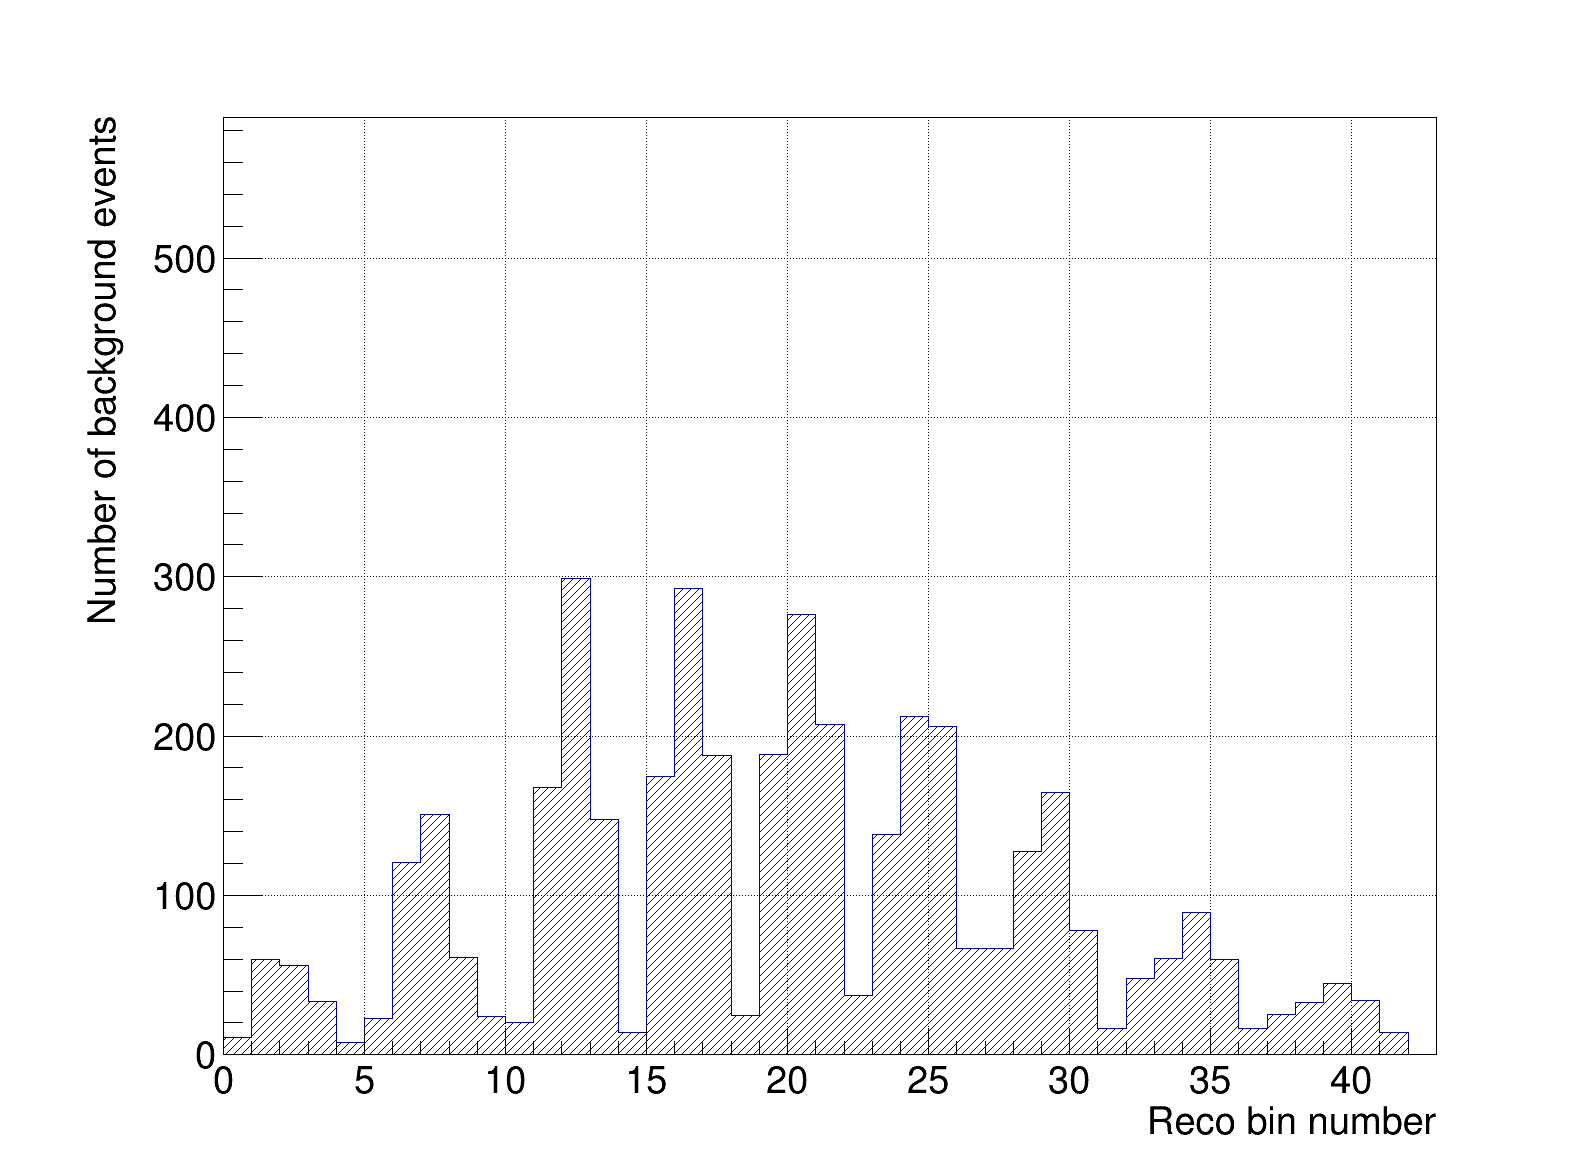

In [39]:
ROOT.gStyle.SetOptTitle(0)

c1 = plotBackgroundSamples(h_ext,h_dirt,h_bkg)

In [40]:
def eventrate_channel(h_data_func, h_ext_func,h_dirt_func,h_bkg_func,h_rate_qe,h_rate_res,h_rate_mec,h_rate_dis):
    c1 = ROOT.TCanvas("c1","c1",1600,1200)
    c1.SetGrid(1)
    c1.SetLeftMargin(0.14)
    c1.SetRightMargin(0.1)
    c1.SetBottomMargin(0.1)

    hs = ROOT.THStack("hs","");
    h_ext_func.SetFillColor(ROOT.kBlue+2)
    h_ext_func.SetLineColor(ROOT.kBlue+2)
    h_ext_func.SetFillStyle(3004)
    h_dirt_func.SetFillColor(ROOT.kOrange+2);
    h_dirt_func.SetLineColor(ROOT.kOrange+2);
    h_bkg_func.SetFillColor(ROOT.kGray)
    h_bkg_func.SetLineColor(ROOT.kGray)
    
    h_rate_qe.SetFillColor(ROOT.kBlue+1)
    h_rate_res.SetFillColor(ROOT.kRed+1)
    h_rate_mec.SetFillColor(ROOT.kOrange-3)
    h_rate_dis.SetFillColor(ROOT.kGreen+2)
    
    h_rate_qe.SetLineWidth(0)
    h_rate_res.SetLineWidth(0)
    h_rate_mec.SetLineWidth(0)
    h_rate_dis.SetLineWidth(0)
    
    h_data_func.SetLineColor(ROOT.kBlack)
    h_data_func.SetLineWidth(2)
    
    hs.Add(h_ext_func)
    hs.Add(h_dirt_func)
    hs.Add(h_bkg_func)
    hs.Add(h_rate_dis)
    hs.Add(h_rate_res)
    hs.Add(h_rate_mec)
    hs.Add(h_rate_qe)

    legend = ROOT.TLegend(0.15,0.65,0.55,0.9)
    legend.SetNColumns(2)

    legend.AddEntry(h_data_func,'Data + stat.',"lep");
    legend.AddEntry(h_rate_qe,'QE',"f");
    legend.AddEntry(h_rate_res,'RES',"f");
    legend.AddEntry(h_rate_mec,'MEC',"f");
    legend.AddEntry(h_rate_dis,'DIS',"f");
    legend.AddEntry(h_bkg_func,'Beam Bkgd',"f")
    legend.AddEntry(h_dirt_func,'Dirt',"f")
    legend.AddEntry(h_ext_func,'Data (Beam-off)',"f")
    h_ext_func.SetXTitle("Reco bin number")
    h_ext_func.SetYTitle("# events")
    h_ext_func.SetMaximum(hs.GetMaximum()*1.2)
    h_ext_func.Draw('hist')
    hs.Draw('hist same')
    h_data_func.Draw('E1 same')
    legend.Draw()
    
    prelim, pot_tex = FF.draw_adding()
    prelim.Draw()
    pot_tex.Draw()
    
    
    c1.Draw()
    c1.SaveAs(outputdir_png + 'signal_channel_sample'+".png")
    c1.SaveAs(outputdir_root + 'signal_channel_sample'+".root")
    c1.SaveAs(outputdir_pdf + 'signal_channel_sample'+".pdf")
    
    return c1



Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/signal_channel_sample.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/signal_channel_sample.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/signal_channel_sample.pdf has been created


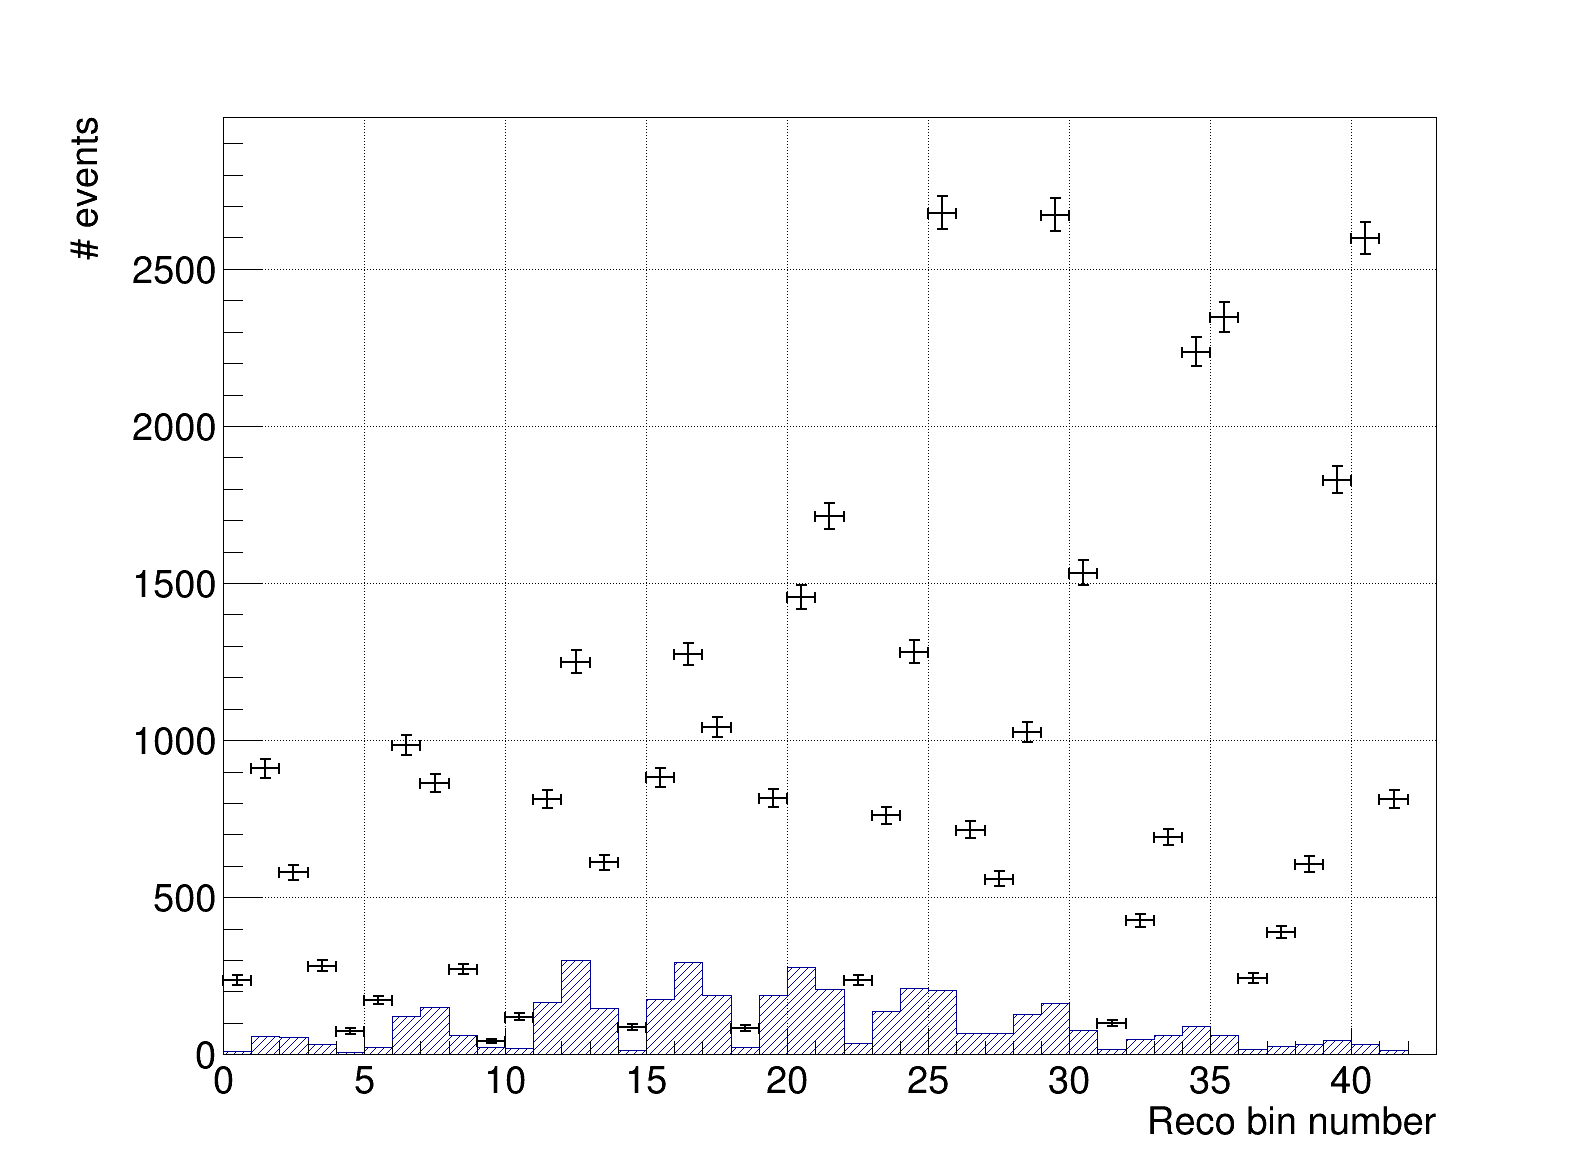

In [41]:
c1 = eventrate_channel(h_data, h_ext,h_dirt,h_bkg,h_rate_qe,h_rate_res,h_rate_mec,h_rate_dis)

In [42]:
def eventrate_channel8(h_data_func, h_ext_func,h_dirt_func,h_bkg_func,h_rate_qe,h_rate_res,h_rate_mec,h_rate_dis):
    c1 = ROOT.TCanvas("c1","c1",1600,1200)
    c1.SetGrid(1)
    c1.SetLeftMargin(0.14)
    c1.SetRightMargin(0.1)
    c1.SetBottomMargin(0.14)

    bin_counter = 0
    for x_theta in range(len_theta):
        h_temp = f_cv.Get('h_true['+str(x_theta)+']')
        h_data_ = h_temp.Clone()
        h_ext_ = h_temp.Clone()
        h_dirt_ = h_temp.Clone()
        h_bkg_ = h_temp.Clone()
        h_qe_ = h_temp.Clone()
        h_res_ = h_temp.Clone()
        h_mec_ = h_temp.Clone()
        h_dis_ = h_temp.Clone()
        
        for i in range(1,len_mom[x_theta]+1):
            h_data_.SetBinContent(i,h_data_func.GetBinContent(bin_counter+i))
            h_data_.SetBinError(i,h_data_func.GetBinError(bin_counter+i))
            
            h_ext_.SetBinContent(i,h_ext_func.GetBinContent(bin_counter+i))
            h_ext_.SetBinError(i,h_ext_func.GetBinError(bin_counter+i))
            
            h_dirt_.SetBinContent(i,h_dirt_func.GetBinContent(bin_counter+i))
            h_dirt_.SetBinError(i,h_dirt_func.GetBinError(bin_counter+i))
            
            h_bkg_.SetBinContent(i,h_bkg_func.GetBinContent(bin_counter+i))
            h_bkg_.SetBinError(i,h_bkg_func.GetBinError(bin_counter+i))
            
            h_qe_.SetBinContent(i,h_rate_qe.GetBinContent(bin_counter+i))
            h_qe_.SetBinError(i,h_rate_qe.GetBinError(bin_counter+i))
            
            h_res_.SetBinContent(i,h_rate_res.GetBinContent(bin_counter+i))
            h_res_.SetBinError(i,h_rate_res.GetBinError(bin_counter+i))
            
            h_mec_.SetBinContent(i,h_rate_mec.GetBinContent(bin_counter+i))
            h_mec_.SetBinError(i,h_rate_mec.GetBinError(bin_counter+i))
            
            h_dis_.SetBinContent(i,h_rate_dis.GetBinContent(bin_counter+i))
            h_dis_.SetBinError(i,h_rate_dis.GetBinError(bin_counter+i))
            
        h_ext_.SetFillColor(ROOT.kBlue+2)
        h_ext_.SetLineColor(ROOT.kBlue+2)
        h_ext_.SetFillStyle(3004)
        h_dirt_.SetFillColor(ROOT.kOrange+2);
        h_dirt_.SetLineColor(ROOT.kOrange+2);
        h_bkg_.SetFillColor(ROOT.kGray)
        h_bkg_.SetLineColor(ROOT.kGray)

        h_qe_.SetFillColor(ROOT.kBlue+1)
        h_res_.SetFillColor(ROOT.kRed+1)
        h_mec_.SetFillColor(ROOT.kOrange-3)
        h_dis_.SetFillColor(ROOT.kGreen+2)

        h_qe_.SetLineWidth(0)
        h_res_.SetLineWidth(0)
        h_mec_.SetLineWidth(0)
        h_dis_.SetLineWidth(0)

        h_data_.SetLineColor(ROOT.kBlack)
        h_data_.SetLineWidth(2)
                    
        bin_counter+=len_mom[x_theta]
        
        hs = ROOT.THStack("hs","");
        hs.Add(h_ext_)
        hs.Add(h_dirt_)
        hs.Add(h_bkg_)
        hs.Add(h_dis_)
        hs.Add(h_res_)
        hs.Add(h_mec_)
        hs.Add(h_qe_)

        legend = ROOT.TLegend(0.55,0.65,0.9,0.9)
        legend.SetNColumns(2)

        legend.AddEntry(h_data_func,'Data + stat.',"lep");
        legend.AddEntry(h_rate_qe,'QE',"f");
        legend.AddEntry(h_rate_res,'RES',"f");
        legend.AddEntry(h_rate_mec,'MEC',"f");
        legend.AddEntry(h_rate_dis,'DIS',"f");
        legend.AddEntry(h_bkg_func,'Beam Bkgd',"f")
        legend.AddEntry(h_dirt_func,'Dirt',"f")
        legend.AddEntry(h_ext_func,'Data (Beam-off)',"f")

        h_ext_.SetTitle(str(theta_bins[x_theta])+'< cos(#theta^{reco}_{#mu}) <'+str(theta_bins[x_theta+1]))
        h_ext_.SetXTitle("p^{reco}_{#mu} [GeV]")
        h_ext_.SetYTitle("# events")
        h_ext_.SetMaximum(h_data_.GetMaximum()*1.2)
        h_ext_.Draw('hist')
        hs.Draw('hist same')
        h_data_.Draw('E1 same')
        legend.Draw()

        #prelim, pot_tex = FF.draw_adding()
        #prelim.Draw()
        #pot_tex.Draw()


        c1.Draw()
        c1.SaveAs(outputdir_png + 'signal_channel_sample _bin'+str(x_theta)+".png")
        #c1.SaveAs(outputdir_root + 'signal_channel_sample _bin'+str(x_theta)+".root")
        c1.SaveAs(outputdir_pdf + 'signal_channel_sample _bin'+str(x_theta)+".pdf")

        #ROOT.gStyle.SetOptTitle(0)

    return c1



Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/signal_channel_sample _bin0.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/signal_channel_sample _bin0.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/signal_channel_sample _bin1.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/signal_channel_sample _bin1.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/signal_channel_sample _bin2.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_

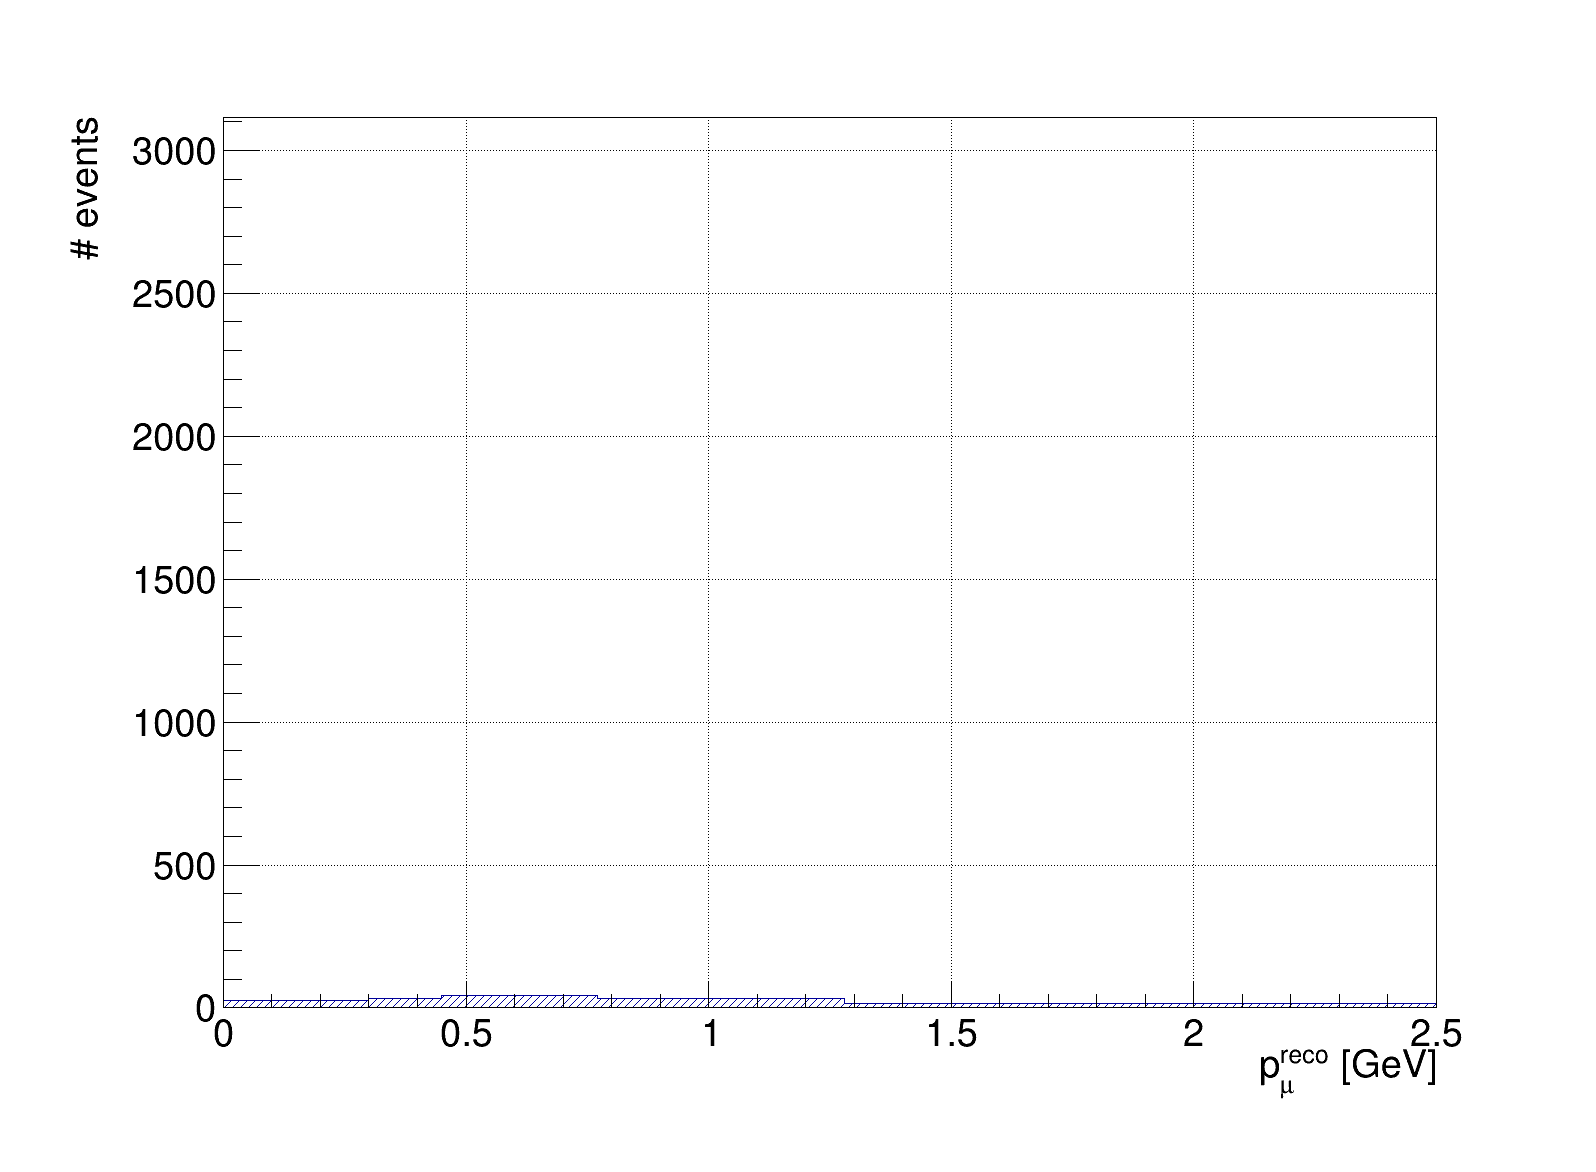

In [43]:
ROOT.gStyle.SetOptTitle(1)
c1 = eventrate_channel8(h_data, h_ext,h_dirt,h_bkg,h_rate_qe,h_rate_res,h_rate_mec,h_rate_dis)
ROOT.gStyle.SetOptTitle(0)


In [44]:
def eventrate_sample8(h_data_func, h_ext_func,h_dirt_func,h_bkg_func,h_true_func):
    c1 = ROOT.TCanvas("c1","c1",1600,1200)
    c1.SetGrid(1)
    c1.SetLeftMargin(0.14)
    c1.SetRightMargin(0.1)
    c1.SetBottomMargin(0.14)
    
    h_reco_func = CC.smear_plot(h_true_func)
    
    bin_counter = 0
    for x_theta in range(len_theta):
        h_temp = f_cv.Get('h_true['+str(x_theta)+']')
        h_data_ = h_temp.Clone()
        h_ext_ = h_temp.Clone()
        h_dirt_ = h_temp.Clone()
        h_bkg_ = h_temp.Clone()
        h_sig_ = h_temp.Clone()
        
        for i in range(1,len_mom[x_theta]+1):
            h_data_.SetBinContent(i,h_data_func.GetBinContent(bin_counter+i))
            h_data_.SetBinError(i,h_data_func.GetBinError(bin_counter+i))
            
            h_ext_.SetBinContent(i,h_ext_func.GetBinContent(bin_counter+i))
            h_ext_.SetBinError(i,h_ext_func.GetBinError(bin_counter+i))
            
            h_dirt_.SetBinContent(i,h_dirt_func.GetBinContent(bin_counter+i))
            h_dirt_.SetBinError(i,h_dirt_func.GetBinError(bin_counter+i))
            
            h_bkg_.SetBinContent(i,h_bkg_func.GetBinContent(bin_counter+i))
            h_bkg_.SetBinError(i,h_bkg_func.GetBinError(bin_counter+i))
            
            h_sig_.SetBinContent(i,h_reco_func.GetBinContent(bin_counter+i))
            h_sig_.SetBinError(i,h_reco_func.GetBinError(bin_counter+i))
            
        h_ext_.SetFillColor(ROOT.kBlue+2)
        h_ext_.SetLineColor(ROOT.kBlue+2)
        h_ext_.SetFillStyle(3004)
        h_dirt_.SetFillColor(ROOT.kOrange+2);
        h_dirt_.SetLineColor(ROOT.kOrange+2);
        h_bkg_.SetFillColor(ROOT.kGray)
        h_bkg_.SetLineColor(ROOT.kGray)

        h_sig_.SetFillColor(ROOT.kRed)
        h_sig_.SetLineWidth(0)

        h_data_.SetLineColor(ROOT.kBlack)
        h_data_.SetLineWidth(2)
                    
        bin_counter+=len_mom[x_theta]
        
        hs = ROOT.THStack("hs","");
        hs.Add(h_ext_)
        hs.Add(h_dirt_)
        hs.Add(h_bkg_)
        hs.Add(h_sig_)


        legend = ROOT.TLegend(0.55,0.65,0.9,0.9)
        legend.SetNColumns(2)

        legend.AddEntry(h_data_func,'Data + stat.',"lep");
        legend.AddEntry(h_sig_,'Signal',"f");
        legend.AddEntry(h_bkg_func,'Beam Bkgd',"f")
        legend.AddEntry(h_dirt_func,'Dirt',"f")
        legend.AddEntry(h_ext_func,'Data (Beam-off)',"f")
        
        h_ext_.GetYaxis().SetTitleSize(0.05)
        h_ext_.GetYaxis().SetTitleOffset(0.0)
        h_ext_.GetYaxis().SetLabelSize(0.05)
        h_ext_.GetXaxis().SetTitleSize(0.05)
        h_ext_.GetXaxis().SetLabelSize(0.05)
        h_ext_.GetXaxis().SetTitleOffset(1)

        h_ext_.SetTitle(str(theta_bins[x_theta])+'< cos(#theta^{reco}_{#mu}) <'+str(theta_bins[x_theta+1]))
        h_ext_.SetXTitle("p^{reco}_{#mu} [GeV]")
        h_ext_.SetYTitle("# events")
        h_ext_.SetMaximum(h_data_.GetMaximum()*1.2)
        h_ext_.Draw('hist')
        hs.Draw('hist same')
        h_data_.Draw('E1 same')
        legend.Draw()

        #prelim, pot_tex = FF.draw_adding()
        #prelim.Draw()
        #pot_tex.Draw()


        c1.Draw()
        c1.SaveAs(outputdir_png + 'signal_sample _bin'+str(x_theta)+".png")
        #c1.SaveAs(outputdir_root + 'signal_sample _bin'+str(x_theta)+".root")
        c1.SaveAs(outputdir_pdf + 'signal_sample _bin'+str(x_theta)+".pdf")

    return c1



In [45]:
ROOT.gStyle.SetOptTitle(1)
c1 = eventrate_sample8(h_data, h_ext,h_dirt,h_bkg,h_this_true)
ROOT.gStyle.SetOptTitle(0)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/signal_sample _bin0.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/signal_sample _bin0.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/signal_sample _bin1.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/signal_sample _bin1.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/signal_sample _bin2.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/eve

In [46]:
def make8(h_this_func):
    h_this = h_this_func.Clone()
    hnew = []
    bin_counter = 0
    for t_bin in range(len_theta):
        h_temp = f_cv.Get('h_true['+str(t_bin)+']')
        hnew.append(h_temp.Clone())
        #hnew[t_bin].SetBins(len_mom[t_bin],array('f',mom_bins[t_bin]))
        hnew[t_bin].SetLineWidth(h_this.GetLineWidth())
        hnew[t_bin].SetLineColor(h_this.GetLineColor())
        hnew[t_bin].SetFillColor(h_this.GetFillColor())
        hnew[t_bin].SetFillStyle(h_this.GetFillStyle())
        for i in range(1,len_mom[t_bin]+1):
            hnew[t_bin].SetBinContent(i,h_this.GetBinContent(bin_counter+i))
            hnew[t_bin].SetBinError(i,h_this.GetBinError(bin_counter+i))                      
        bin_counter+=len_mom[t_bin]
        
    return hnew

In [47]:
def eventrate_comparison8(h_data_func,h_ext_func,h_dirt_func,h_bkg_func,h_true_func,this_frac_tot, filename,model_name):

    FF.main_plot(h_data_func)
    
    h_reco_func = CC.smear_plot(h_true_func)

    #hs = ROOT.THStack("hs","");
    h_ext_func.SetFillColor(ROOT.kBlue+2)
    h_ext_func.SetLineColor(ROOT.kBlue+2)
    h_ext_func.SetFillStyle(3004)
    h_dirt_func.SetFillColor(ROOT.kOrange+2);
    h_dirt_func.SetLineColor(ROOT.kOrange+2);
    h_bkg_func.SetFillColor(ROOT.kGray)
    h_bkg_func.SetLineColor(ROOT.kGray)
    h_reco_func.SetFillColor(ROOT.kRed)
    h_reco_func.SetLineColor(ROOT.kRed)
    #hs.Add(h_ext_func)
    #hs.Add(h_dirt_func)
    #hs.Add(h_bkg_func)
    #hs.Add(h_reco_func)

    h_data_func.SetXTitle("Reco bin number")
    h_data_func.SetYTitle("Number of events")

    h_tot = h_reco_func.Clone()
    h_tot.Add(h_bkg_func)
    
    num_bins = 43 # get eventually better than hardcode
    
    h_tot.Add(h_ext_func)
    h_tot.Add(h_dirt_func)
    h_tot.SetFillColor(ROOT.kBlack)
    h_tot.SetLineColor(ROOT.kBlack)
    h_tot.SetFillStyle(3004)
    
    # calculate CHi2
    dat_vec = FF.plot2arr(h_data_func.Clone(),1)
    #dat_vec = dat_vec[0:-1]
    tot_vec = FF.plot2arr(h_tot.Clone(),1)
    tot_vec = tot_vec[0:-1]
    covar = np.zeros((num_bins-1,num_bins-1))
    
    #get total covar:
    covar_data = np.zeros((num_bins-1,num_bins-1))
    for i in range(num_bins-1):
        for j in range(num_bins-1):
            covar[i][j] = this_frac_tot[i][j]*tot_vec[i]*tot_vec[j]
            
    for i in range(num_bins):
        h_tot.SetBinError(i+1,math.sqrt(this_frac_tot[i][i])*h_tot.GetBinContent(i+1))
 
    inv_covar = np.linalg.inv(covar)
    diff_vec = (dat_vec - tot_vec)
    chi2 = 0.0
    for i in range(42):
        for j in range(42):
            chi2 += diff_vec[i]*inv_covar[i][j]*diff_vec[j]
        
    print 'Chi2 = ',chi2
    
    h_data_ = make8(h_data_func)
    h_ext_ = make8(h_ext_func)
    h_dirt_ = make8(h_dirt_func)
    h_bkg_ = make8(h_bkg_func)
    h_reco_ = make8(h_reco_func)
    h_tot_ = make8(h_tot)
    hs = []
       
    bin_counter = 0
    for t_bin in range(len_theta):
        c1 = ROOT.TCanvas("c1","c1",1600,1200)
        c1.SetGrid(1)
        c1.SetLeftMargin(0.14)
        c1.SetRightMargin(0.1)
        c1.SetBottomMargin(0.1)

        c1.cd()

        pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
        pad1.SetGrid(1)
        pad1.Draw()
        pad1.cd()
        pad1.SetBottomMargin(0.03);
        pad1.SetTopMargin(0.1)

        hs.append(ROOT.THStack('hs['+str(t_bin)+']',""))
        hs[t_bin].Add(h_ext_[t_bin])
        hs[t_bin].Add(h_dirt_[t_bin])
        hs[t_bin].Add(h_bkg_[t_bin])
        hs[t_bin].Add(h_reco_[t_bin])
        
        h_data_[t_bin].SetMaximum(-1111)
        h_data_[t_bin].SetMinimum(0)
        h_data_[t_bin].SetMaximum(h_data_[t_bin].GetMaximum()*1.2)
        h_data_[t_bin].SetTitle(str(theta_bins[t_bin])+'< cos(#theta^{reco}_{#mu}) <'+str(theta_bins[t_bin+1]))
        h_data_[t_bin].SetXTitle("p^{reco}_{#mu} [GeV]")
        h_data_[t_bin].SetYTitle("# events")
        h_data_[t_bin].Draw('E1')
        #print h_data_[t_bin].GetBinContent(1)

        hs[t_bin].Draw('same hist')
        h_tot_[t_bin].Draw('same E2')

        legend = ROOT.TLegend(0.55,0.45,0.9,0.9)
        legend.AddEntry(h_data_[t_bin],'Data + stat.',"lep");
        legend.AddEntry(h_tot_[t_bin],model_name+' + bkg: #chi^{2}:'+'{:04.1f}'.format(chi2),"f");
        legend.AddEntry(h_reco_[t_bin],'#nu_{#mu} signal',"f");
        legend.AddEntry(h_bkg_[t_bin],'#nu background',"f");
        legend.AddEntry(h_dirt_[t_bin],'Dirt',"f");
        legend.AddEntry(h_ext_[t_bin],'Cosmic (off-beam)',"f");
        if(t_bin == 0):
            legend.Draw()

        h_data_[t_bin].Draw('E1 same')

        #prelim, pot_tex = FF.draw_adding()
        #prelim.Draw()
        #pot_tex.Draw()

        h_data_[t_bin].GetYaxis().SetTitleOffset(0.7);
        h_data_[t_bin].GetYaxis().SetTitleSize(0.07);
        h_data_[t_bin].GetXaxis().SetLabelOffset(999);
        h_data_[t_bin].GetXaxis().SetTitleOffset(999);
        h_data_[t_bin].GetXaxis().SetLabelSize(0);
        h_data_[t_bin].GetYaxis().SetLabelSize(0.05);
        h_data_[t_bin].GetXaxis().SetTitleSize(0);

        c1.cd()
        h_data_[t_bin].GetXaxis().SetLabelOffset(0);
        h_data_[t_bin].GetXaxis().SetTitleOffset(0);

        pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
        pad2.SetGrid(1)
        pad2.SetTopMargin(0.04)
        pad2.SetBottomMargin(0.4)
        pad2.Draw()
        pad2.cd()
        h_tot_noerr = h_tot_[t_bin].Clone()
        for i in range(len_mom[t_bin]):
            h_tot_noerr.SetBinError(i+1,0)
        h_xsec_data_ratio = h_data_[t_bin].Clone()
        h_xsec_data_ratio.Divide(h_tot_noerr)
        h_mc_ratio = h_tot_[t_bin].Clone()
        h_mc_ratio.Divide(h_tot_noerr)

        h_xsec_data_ratio.SetYTitle('Data/(Ext+MC)')
        h_xsec_data_ratio.GetYaxis().SetTitleSize(0.1)
        h_xsec_data_ratio.GetYaxis().SetTitleOffset(0.3)
        h_xsec_data_ratio.GetYaxis().SetLabelSize(0.07)
        h_xsec_data_ratio.GetXaxis().SetTitleSize(0.15)
        h_xsec_data_ratio.GetXaxis().SetLabelSize(0.15)
        h_xsec_data_ratio.GetXaxis().SetTitleOffset(1)
        h_xsec_data_ratio.SetMaximum(1.7)
        h_xsec_data_ratio.SetMinimum(0.3)
        h_xsec_data_ratio.SetTitle('')
        h_xsec_data_ratio.Draw('E1')
        h_mc_ratio.Draw('E2 same')

        c1.Draw()
        c1.SaveAs(outputdir_png + filename+'_'+str(t_bin)+".png")
        #c1.SaveAs(outputdir_root + filename+'_'+str(t_bin)+".root")
        c1.SaveAs(outputdir_pdf + filename+'_'+str(t_bin)+".pdf")

    return c1


In [48]:
ROOT.gStyle.SetOptTitle(1)
c1 = eventrate_comparison8(h_data,h_ext,h_dirt,h_bkg,h_true_g3_tune,frac_tot, 'event_rate_G3_tune','G3 uB tune')
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.14)

Chi2 =  592.8665422548933


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/event_rate_G3_tune_0.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/event_rate_G3_tune_0.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/event_rate_G3_tune_1.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/event_rate_G3_tune_1.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/ev

In [49]:
def eventrate_comparison_pub8(h_data_func,h_ext_func,h_dirt_func,h_numu_nomuon_func, h_numu_nue_func,\
                              h_numu_antinu_func,h_numu_nc_func, h_numu_ov_func,h_numu_cosmic_func,\
                              h_true_func,this_frac_tot, filename,model_name):

    FF.main_plot(h_data_func)
    
    h_reco_func = CC.smear_plot(h_true_func)

    #hs = ROOT.THStack("hs","");
    h_ext_func.SetFillColor(ROOT.kBlue+2)
    h_ext_func.SetLineColor(ROOT.kBlue+2)
    h_ext_func.SetFillStyle(3004)
    h_dirt_func.SetFillColor(ROOT.kOrange+2);
    h_dirt_func.SetLineColor(ROOT.kOrange+2);
    
    h_overlay_func = {} # make an array of histograms for the different interactions
    overlay_signals = ['numu_nomuon','numu_nue','numu_antinu','numu_nc','numu_ov','numu_cosmic']
    overlay_signals_name = ['#nu_{#mu} CC (not #mu)','#nu_{e}, #bar{#nu_{e}} CC','#bar{#nu_{#mu}} CC','NC', 'OUTFV', 'Cosmic']
    
    #overlay_signals = ['numu_ov','numu_nomuon','numu_nue','numu_antinu','numu_nc','numu_cosmic',]
    #overlay_signals_name = ['#nu_{#mu} CC (not #mu)','#nu_{e}, #bar{#nu_{e}} CC','#bar{#nu_{#mu}} CC','NC', 'OUTFV', 'Cosmic']
    
    h_overlay_func['numu_nomuon'] = h_numu_nomuon_func
    h_overlay_func['numu_nue'] = h_numu_nue_func
    h_overlay_func['numu_antinu'] = h_numu_antinu_func
    h_overlay_func['numu_nc'] = h_numu_nc_func
    h_overlay_func['numu_cosmic'] = h_numu_cosmic_func
    h_overlay_func['numu_ov'] = h_numu_ov_func
    
    h_overlay_func['numu_nomuon'].SetFillColor(ROOT.kRed+2)
    h_overlay_func['numu_nomuon'].SetLineColor(ROOT.kRed+2)
    h_overlay_func['numu_nue'].SetFillColor(ROOT.kMagenta+1)
    h_overlay_func['numu_nue'].SetLineColor(ROOT.kMagenta+1)
    h_overlay_func['numu_antinu'].SetFillColor(ROOT.kOrange-3)
    h_overlay_func['numu_antinu'].SetLineColor(ROOT.kOrange-3)
    h_overlay_func['numu_nc'].SetFillColor(ROOT.kGray)
    h_overlay_func['numu_nc'].SetLineColor(ROOT.kGray)
    h_overlay_func['numu_cosmic'].SetFillColor(ROOT.kBlue)
    h_overlay_func['numu_cosmic'].SetLineColor(ROOT.kBlue)
    h_overlay_func['numu_ov'].SetFillColor(ROOT.kGreen+2)
    h_overlay_func['numu_ov'].SetLineColor(ROOT.kGreen+2)

    h_reco_func.SetFillColor(ROOT.kRed)
    h_reco_func.SetLineColor(ROOT.kRed)
    #hs.Add(h_ext_func)
    #hs.Add(h_dirt_func)
    #hs.Add(h_bkg_func)
    #hs.Add(h_reco_func)

    h_data_func.SetXTitle("Reco bin number")
    h_data_func.SetYTitle("Number of events")

    h_tot = h_reco_func.Clone()
    for i, x in enumerate(h_overlay_func):
        h_tot.Add(h_overlay_func[overlay_signals[i]])
    
    num_bins = 43 # get eventually better than hardcode
    
    h_tot.Add(h_ext_func)
    h_tot.Add(h_dirt_func)
    h_tot.SetFillColor(ROOT.kBlack)
    h_tot.SetLineColor(ROOT.kBlack)
    h_tot.SetFillStyle(3004)
    
    # calculate CHi2
    dat_vec = FF.plot2arr(h_data_func.Clone(),1)
    #dat_vec = dat_vec[0:-1]
    tot_vec = FF.plot2arr(h_tot.Clone(),1)
    tot_vec = tot_vec[0:-1]
    covar = np.zeros((num_bins-1,num_bins-1))
    
    #get total covar:
    covar_data = np.zeros((num_bins-1,num_bins-1))
    for i in range(num_bins-1):
        for j in range(num_bins-1):
            covar[i][j] = this_frac_tot[i][j]*tot_vec[i]*tot_vec[j]
            
    for i in range(num_bins):
        h_tot.SetBinError(i+1,math.sqrt(this_frac_tot[i][i])*h_tot.GetBinContent(i+1))
 
    inv_covar = np.linalg.inv(covar)
    diff_vec = (dat_vec - tot_vec)
    chi2 = 0.0
    for i in range(42):
        for j in range(42):
            chi2 += diff_vec[i]*inv_covar[i][j]*diff_vec[j]
        
    print 'Chi2 = ',chi2
    
    h_data_ = make8(h_data_func)
    h_ext_ = make8(h_ext_func)
    h_dirt_ = make8(h_dirt_func)
    h_bkg_ = {}
    
    for i, x in enumerate(h_overlay_func):
        h_bkg_[overlay_signals[-i]]=make8(h_overlay_func[overlay_signals[-i]])
    #h_bkg_ = make8(h_bkg_func)
    h_reco_ = make8(h_reco_func)
    h_tot_ = make8(h_tot)
    hs = []
       
    bin_counter = 0
    for t_bin in range(len_theta):
        c1 = ROOT.TCanvas("c1","c1",1600,1200)
        c1.SetGrid(1)
        c1.SetLeftMargin(0.14)
        c1.SetRightMargin(0.1)
        c1.SetBottomMargin(0.1)

        c1.cd()

        pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
        pad1.SetGrid(1)
        pad1.Draw()
        pad1.cd()
        pad1.SetBottomMargin(0.03);
        pad1.SetTopMargin(0.1)

        hs.append(ROOT.THStack('hs['+str(t_bin)+']',""))
        hs[t_bin].Add(h_ext_[t_bin])
        hs[t_bin].Add(h_dirt_[t_bin])
        
        for i,x in enumerate(overlay_signals):
            hs[t_bin].Add(h_bkg_[overlay_signals[-i-1]][t_bin])
            if t_bin == 0:
                print x, t_bin, h_bkg_[x][t_bin].GetBinContent(1)
        #hs[t_bin].Add(h_bkg_[t_bin])
        hs[t_bin].Add(h_reco_[t_bin])
        
        h_data_[t_bin].SetMaximum(-1111)
        h_data_[t_bin].SetMinimum(0)
        h_data_[t_bin].SetMaximum(h_data_[t_bin].GetMaximum()*1.2)
        h_data_[t_bin].SetTitle(str(theta_bins[t_bin])+'< cos(#theta^{reco}_{#mu}) <'+str(theta_bins[t_bin+1]))
        h_data_[t_bin].SetXTitle("p^{reco}_{#mu} [GeV]")
        h_data_[t_bin].SetYTitle("# events")
        h_data_[t_bin].Draw('E1')
        #print h_data_[t_bin].GetBinContent(1)

        hs[t_bin].Draw('same hist')
        h_tot_[t_bin].Draw('same E2')

        legend = ROOT.TLegend(0.55,0.15,0.9,0.9)
        legend.AddEntry(h_data_[t_bin],'Data + stat.',"lep");
        legend.AddEntry(h_tot_[t_bin],model_name+' + bkg: #chi^{2}:'+'{:04.1f}'.format(chi2),"f");
        legend.AddEntry(h_reco_[t_bin],'#nu_{#mu} CC (signal)',"f");
        for i,x in enumerate(overlay_signals):
            legend.AddEntry(h_bkg_[x][t_bin],overlay_signals_name[i],"f");
        #legend.AddEntry(h_bkg_[t_bin],'#nu background',"f");
        legend.AddEntry(h_dirt_[t_bin],'Dirt',"f");
        legend.AddEntry(h_ext_[t_bin],'Cosmic (off-beam)',"f");
        if(t_bin == 0):
            legend.Draw()

        h_data_[t_bin].Draw('E1 same')

        #prelim, pot_tex = FF.draw_adding()
        #prelim.Draw()
        #pot_tex.Draw()

        h_data_[t_bin].GetYaxis().SetTitleOffset(0.7);
        h_data_[t_bin].GetYaxis().SetTitleSize(0.07);
        h_data_[t_bin].GetXaxis().SetLabelOffset(999);
        h_data_[t_bin].GetXaxis().SetTitleOffset(999);
        h_data_[t_bin].GetXaxis().SetLabelSize(0);
        h_data_[t_bin].GetYaxis().SetLabelSize(0.05);
        h_data_[t_bin].GetXaxis().SetTitleSize(0);

        c1.cd()
        h_data_[t_bin].GetXaxis().SetLabelOffset(0);
        h_data_[t_bin].GetXaxis().SetTitleOffset(0);

        pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
        pad2.SetGrid(1)
        pad2.SetTopMargin(0.04)
        pad2.SetBottomMargin(0.4)
        pad2.Draw()
        pad2.cd()
        h_tot_noerr = h_tot_[t_bin].Clone()
        for i in range(len_mom[t_bin]):
            h_tot_noerr.SetBinError(i+1,0)
        h_xsec_data_ratio = h_data_[t_bin].Clone()
        h_xsec_data_ratio.Divide(h_tot_noerr)
        h_mc_ratio = h_tot_[t_bin].Clone()
        h_mc_ratio.Divide(h_tot_noerr)

        h_xsec_data_ratio.SetYTitle('Data/(Ext+MC)')
        h_xsec_data_ratio.GetYaxis().SetTitleSize(0.1)
        h_xsec_data_ratio.GetYaxis().SetTitleOffset(0.3)
        h_xsec_data_ratio.GetYaxis().SetLabelSize(0.07)
        h_xsec_data_ratio.GetXaxis().SetTitleSize(0.15)
        h_xsec_data_ratio.GetXaxis().SetLabelSize(0.15)
        h_xsec_data_ratio.GetXaxis().SetTitleOffset(1)
        h_xsec_data_ratio.SetMaximum(1.7)
        h_xsec_data_ratio.SetMinimum(0.3)
        h_xsec_data_ratio.SetTitle('')
        h_xsec_data_ratio.Draw('E1')
        h_mc_ratio.Draw('E2 same')

        c1.Draw()
        c1.SaveAs(outputdir_png + filename+'_'+str(t_bin)+".png")
        #c1.SaveAs(outputdir_root + filename+'_'+str(t_bin)+".root")
        c1.SaveAs(outputdir_pdf + filename+'_'+str(t_bin)+".pdf")

    return c1


In [50]:
ROOT.gStyle.SetOptTitle(1)
c1 = eventrate_comparison_pub8(h_data,h_ext,h_dirt,h_no_moun, h_nue,\
                              h_antinu,h_nc, h_ov,h_cosmic,\
                                h_true_g3_tune,frac_tot, 'event_rate_G3_tune_pub','G3 uB tune')
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.14)

Chi2 =  592.8665981370484
numu_nomuon 0 20.8143215179
numu_nue 0 1.07176828384
numu_antinu 0 0.166161492467
numu_nc 0 36.8571510315
numu_ov 0 18.2705917358
numu_cosmic 0 36.1338233948


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/event_rate_G3_tune_pub_0.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/event_rate_G3_tune_pub_0.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/event_rate_G3_tune_pub_1.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/event_rate_G3_tune_pub_1.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_ra

In [51]:
frac_det = np.load(frac_dir+'frac_det_GuB.npy')
frac_other = np.load(frac_dir+'frac_other_GuB.npy')
frac_all = np.load(frac_dir+'frac_det_all_GuB.npy')
frac_crt = np.load(frac_dir+'frac_crt_GuB.npy')
frac_stat = np.load(frac_dir+'frac_stat_GuB.npy')
frac_dirt = np.load(frac_dir+'frac_dirt_GuB.npy')
frac_pot = np.load(frac_dir+'frac_pot_GuB.npy')
frac_flux = np.load(frac_dir+'frac_det_flux_GuB.npy')

In [52]:
pot = 2.144e+20
frac_dir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/My_Measurement/plots'
#frac_dir = outputdir
# genie tune:
model = '_GuB'
frac_det_GuB = np.load(frac_dir+'/frac_det'+model+'.npy')
frac_other_GuB = np.load(frac_dir+'/frac_other'+model+'.npy')
frac_all_GuB = np.load(frac_dir+'/frac_det_all'+model+'.npy')
frac_flux_GuB = np.load(frac_dir+'/frac_det_flux'+model+'.npy')
frac_crt_GuB = np.load(frac_dir+'/frac_crt'+model+'.npy')
frac_dirt_GuB = np.load(frac_dir+'/frac_dirt'+model+'.npy')
frac_stat_GuB = np.load(frac_dir+'/frac_stat'+model+'.npy')
frac_pot_GuB = np.load(frac_dir+'/frac_pot'+model+'.npy')
frac_tot_GuB = frac_det_GuB+frac_other_GuB+frac_all_GuB+frac_flux_GuB+frac_crt_GuB+frac_dirt_GuB+frac_stat_GuB+frac_pot_GuB
#np.save(outputdir+'Genie_tune/frac_tot',frac_tot_GuB)
#frac_tot_GuB = np.load(outputdir+'Genie_tune/frac_tot.npy')


h_pred_GuB = h_true_g3_tune.Clone()
h_pred_GuB = CC.smear_plot(h_pred_GuB)
h_pred_GuB.Add(h_bkg)
h_pred_GuB.Add(h_dirt)
h_pred_GuB.Add(h_ext)


# genie v3:
model = '_G3'
frac_det_G3 = np.load(frac_dir+'/frac_det'+model+'.npy')
frac_other_G3 = np.load(frac_dir+'/frac_other'+model+'.npy')
frac_all_G3 = np.load(frac_dir+'/frac_det_all'+model+'.npy')
frac_flux_G3 = np.load(frac_dir+'/frac_det_flux'+model+'.npy')
frac_crt_G3 = np.load(frac_dir+'/frac_crt'+model+'.npy')
frac_dirt_G3 = np.load(frac_dir+'/frac_dirt'+model+'.npy')
frac_stat_G3 = np.load(frac_dir+'/frac_stat'+model+'.npy')
frac_pot_G3 = np.load(frac_dir+'/frac_pot'+model+'.npy')
frac_tot_G3 = frac_det_G3+frac_other_G3+frac_all_G3+frac_flux_G3+frac_crt_G3+frac_dirt_G3+frac_stat_G3+frac_pot_G3
#np.save(outputdir+'Genie_V3/frac_tot',frac_tot_G3)
#frac_tot_G3 = np.load(outputdir+'Genie_V3/frac_tot.npy')


h_pred_G3 = h_rate_g3.Clone()
h_pred_G3 = CC.smear_plot(h_pred_G3)
h_pred_G3.Add(h_bkg)
h_pred_G3.Add(h_dirt)
h_pred_G3.Add(h_ext)


# genie v2:
model = '_G2'
frac_det_G2 = np.load(frac_dir+'/frac_det'+model+'.npy')
frac_other_G2 = np.load(frac_dir+'/frac_other'+model+'.npy')
frac_all_G2 = np.load(frac_dir+'/frac_det_all'+model+'.npy')
frac_flux_G2 = np.load(frac_dir+'/frac_det_flux'+model+'.npy')
frac_crt_G2 = np.load(frac_dir+'/frac_crt'+model+'.npy')
frac_dirt_G2 = np.load(frac_dir+'/frac_dirt'+model+'.npy')
frac_stat_G2 = np.load(frac_dir+'/frac_stat'+model+'.npy')
frac_pot_G2 = np.load(frac_dir+'/frac_pot'+model+'.npy')
frac_tot_G2 = frac_det_G2+frac_other_G2+frac_all_G2+frac_flux_G2+frac_crt_G2+frac_dirt_G2+frac_stat_G2+frac_pot_G2
#np.save(outputdir+'Genie_V2/frac_tot',frac_tot_G2)
#frac_tot_G2 = np.load(outputdir+'Genie_V2/frac_tot.npy')


h_pred_G2 = h_rate_g2.Clone()
h_pred_G2 = CC.smear_plot(h_pred_G2)
h_pred_G2.Add(h_bkg)
h_pred_G2.Add(h_dirt)
h_pred_G2.Add(h_ext)

# genie GiBuu:
model = '_GiBuu'
frac_det_GiBuu = np.load(frac_dir+'/frac_det'+model+'.npy')
frac_other_GiBuu = np.load(frac_dir+'/frac_other'+model+'.npy')
frac_all_GiBuu = np.load(frac_dir+'/frac_det_all'+model+'.npy')
frac_flux_GiBuu = np.load(frac_dir+'/frac_det_flux'+model+'.npy')
frac_crt_GiBuu = np.load(frac_dir+'/frac_crt'+model+'.npy')
frac_dirt_GiBuu = np.load(frac_dir+'/frac_dirt'+model+'.npy')
frac_stat_GiBuu = np.load(frac_dir+'/frac_stat'+model+'.npy')
frac_pot_GiBuu = np.load(frac_dir+'/frac_pot'+model+'.npy')
frac_tot_GiBuu = frac_det_GiBuu+frac_other_GiBuu+frac_all_GiBuu+frac_flux_GiBuu+frac_crt_GiBuu+frac_dirt_GiBuu+frac_stat_GiBuu+frac_pot_GiBuu
#np.save(outputdir+'Genie_GiBUU/frac_tot',frac_tot_GiBuu)
#frac_tot_GiBuu = np.load(outputdir+'Gibuu/frac_tot.npy')

h_pred_GiBuu = h_rate_gibuu.Clone()
h_pred_GiBuu = CC.smear_plot(h_pred_GiBuu)
h_pred_GiBuu.Add(h_bkg)
h_pred_GiBuu.Add(h_dirt)
h_pred_GiBuu.Add(h_ext)

# genie Neut:
model = '_Neut'
frac_det_Neut = np.load(frac_dir+'/frac_det'+model+'.npy')
frac_other_Neut = np.load(frac_dir+'/frac_other'+model+'.npy')
frac_all_Neut = np.load(frac_dir+'/frac_det_all'+model+'.npy')
frac_flux_Neut = np.load(frac_dir+'/frac_det_flux'+model+'.npy')
frac_crt_Neut = np.load(frac_dir+'/frac_crt'+model+'.npy')
frac_dirt_Neut = np.load(frac_dir+'/frac_dirt'+model+'.npy')
frac_stat_Neut = np.load(frac_dir+'/frac_stat'+model+'.npy')
frac_pot_Neut = np.load(frac_dir+'/frac_pot'+model+'.npy')
frac_tot_Neut = frac_det_Neut+frac_other_Neut+frac_all_Neut+frac_flux_Neut+frac_crt_Neut+frac_dirt_Neut+frac_stat_Neut+frac_pot_Neut
#np.save(outputdir+'Genie_Neut/frac_tot',frac_tot_Neut)
#frac_tot_Neut = np.load(outputdir+'Neut/frac_tot.npy')


h_pred_neut = h_rate_neut.Clone()
h_pred_neut = CC.smear_plot(h_pred_neut)
h_pred_neut.Add(h_bkg)
h_pred_neut.Add(h_dirt)
h_pred_neut.Add(h_ext)

# genie NuWro:
model = '_NuWro'
frac_det_NuWro = np.load(frac_dir+'/frac_det'+model+'.npy')
frac_other_NuWro = np.load(frac_dir+'/frac_other'+model+'.npy')
frac_all_NuWro = np.load(frac_dir+'/frac_det_all'+model+'.npy')
frac_flux_NuWro = np.load(frac_dir+'/frac_det_flux'+model+'.npy')
frac_crt_NuWro = np.load(frac_dir+'/frac_crt'+model+'.npy')
frac_dirt_NuWro = np.load(frac_dir+'/frac_dirt'+model+'.npy')
frac_stat_NuWro = np.load(frac_dir+'/frac_stat'+model+'.npy')
frac_pot_NuWro = np.load(frac_dir+'/frac_pot'+model+'.npy')
frac_tot_NuWro = frac_det_NuWro+frac_other_NuWro+frac_all_NuWro+frac_flux_NuWro+frac_crt_NuWro+frac_dirt_NuWro+frac_stat_NuWro+frac_pot_NuWro
#np.save(outputdir+'Genie_NuWro/frac_tot',frac_tot_NuWro)
#frac_tot_NuWro = np.load(outputdir+'Nuwro/frac_tot.npy')


h_pred_nuwro = h_rate_nuwro.Clone()
h_pred_nuwro = CC.smear_plot(h_pred_nuwro)
h_pred_nuwro.Add(h_bkg)
h_pred_nuwro.Add(h_dirt)
h_pred_nuwro.Add(h_ext)



True

In [53]:

'''eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_this_true,frac_tot, 'event_rate_this_tune','this model')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_true_g3_tune,frac_tot_GuB, 'event_rate_G3_tune','G3 uB tune')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_g3,frac_tot_G3, 'event_rate_G3','G3')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_g2,frac_tot_G2, 'event_rate_G2','G2')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_gibuu,frac_tot_GiBuu, 'event_rate_gibuu','GiBuu')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_neut,frac_tot_Neut, 'event_rate_neut','Neut')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_nuwro,frac_tot_NuWro, 'event_rate_nuwro','NuWro')'''


"eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_this_true,frac_tot, 'event_rate_this_tune','this model')\neventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_true_g3_tune,frac_tot_GuB, 'event_rate_G3_tune','G3 uB tune')\neventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_g3,frac_tot_G3, 'event_rate_G3','G3')\neventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_g2,frac_tot_G2, 'event_rate_G2','G2')\neventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_gibuu,frac_tot_GiBuu, 'event_rate_gibuu','GiBuu')\neventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_neut,frac_tot_Neut, 'event_rate_neut','Neut')\neventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_nuwro,frac_tot_NuWro, 'event_rate_nuwro','NuWro')"

KeyboardInterrupt: 

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Covar_uB_tune.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Covar_uB_tune.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Covar_uB_tune.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/Correlation_uB_tune.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/Correlation_uB_tune.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/Correlation_uB_tune.pdf has been created
Info in <TCanvas::Pr

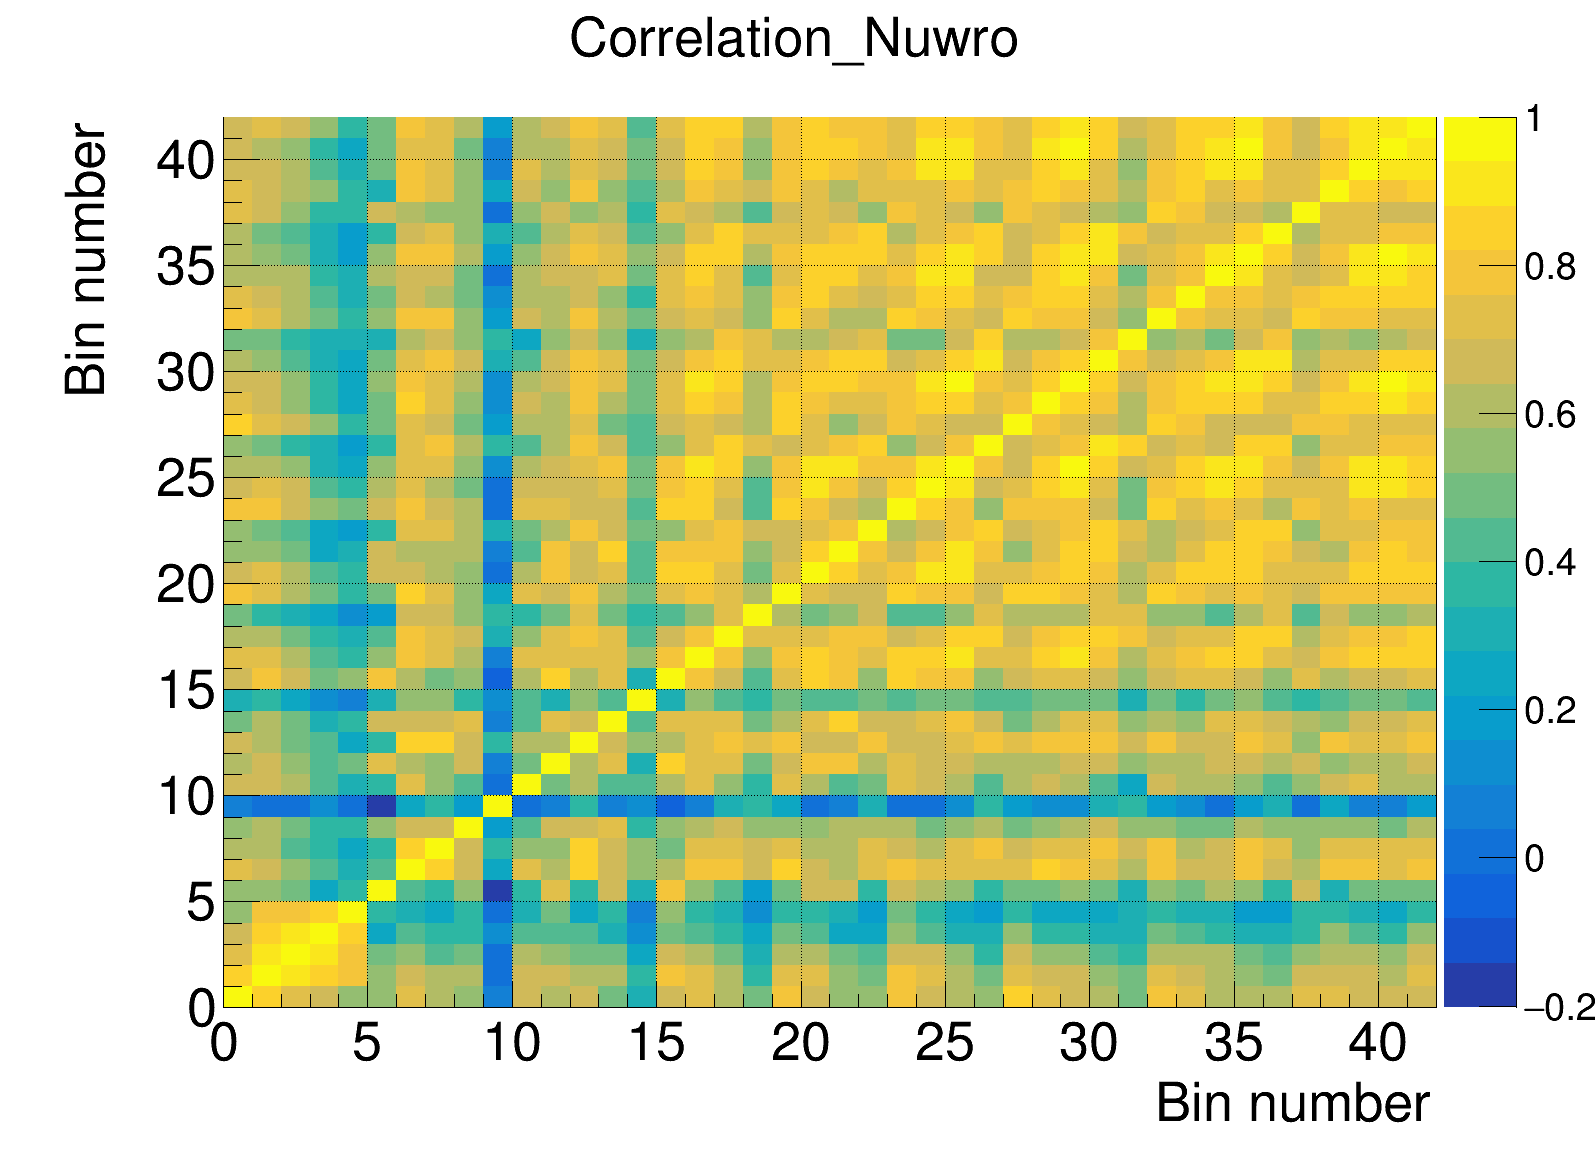

In [54]:
covar_GuB, corr_GuB = getVar(FF.plot2arr(h_pred_GuB,1),frac_tot_GuB)
plot_arr(covar_GuB,'Covar_uB_tune')
plot_arr(corr_GuB,'Correlation_uB_tune')
plot_arr(frac_tot_GuB,'Frac_covar_uB_tune')

covar_G3, corr_G3 = getVar(FF.plot2arr(h_pred_G3,1),frac_tot_G3)
plot_arr(covar_G3,'Covar_G3')
plot_arr(corr_G3,'Correlation_G3')
plot_arr(frac_tot_G3,'Frac_covar_G3')

covar_G2, corr_G2 = getVar(FF.plot2arr(h_pred_G2,1),frac_tot_G2)
plot_arr(covar_G2,'Covar_G2')
plot_arr(corr_G2,'Correlation_G2')
plot_arr(frac_tot_G2,'Frac_covar_G2')

covar_Gibuu, corr_Gibuu = getVar(FF.plot2arr(h_pred_GiBuu,1),frac_tot_GiBuu)
plot_arr(covar_Gibuu,'Covar_Gibuu')
plot_arr(corr_Gibuu,'Correlation_Gibuu')
plot_arr(frac_tot_GiBuu,'Frac_covar_Gibuu')

covar_Neut, corr_Neut = getVar(FF.plot2arr(h_pred_neut,1),frac_tot_Neut)
plot_arr(covar_Neut,'Covar_Neut')
plot_arr(corr_Neut,'Correlation_Neut')
plot_arr(frac_tot_Neut,'Frac_covar_Neut')

covar_Nuwro, corr_Nuwro = getVar(FF.plot2arr(h_pred_nuwro,1),frac_tot_NuWro)
plot_arr(covar_Nuwro,'Covar_Nuwro')
plot_arr(corr_Nuwro,'Correlation_Nuwro')
plot_arr(frac_tot_NuWro,'Frac_covar_Nuwro')


15.195817906624713 230.91288185129628
5.894847881899677 20.50840377817617


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/sample_stat_err.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/sample_stat_err.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/sample_stat_err.pdf has been created


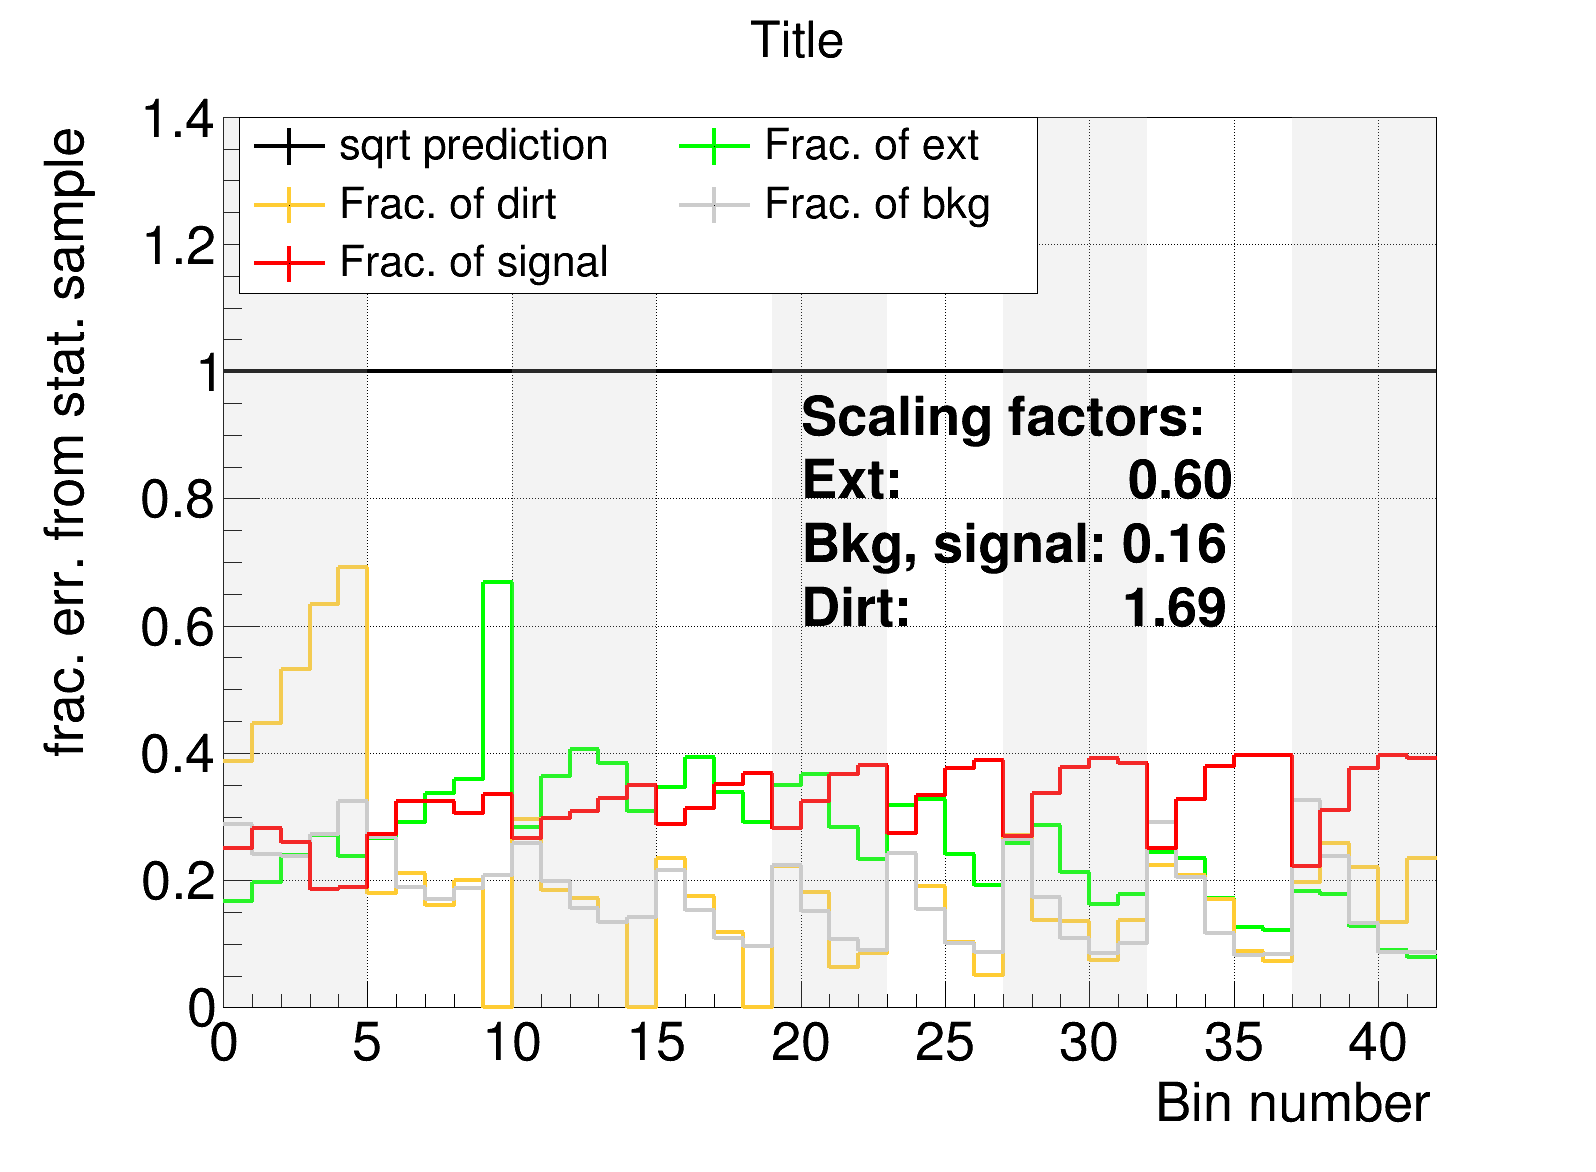

In [55]:
#Scalefactors: 
#Data:		1.0
#Ext:		0.600992748172
#Overlay:	0.169069492301
#Dirt:		1.69438986704

data_stat_vec = np.zeros((43))
ext_stat_vec = np.zeros((43))
dirt_stat_vec = np.zeros((43))
bkg_stat_vec = np.zeros((43))
signal_stat_vec = np.zeros((43))
for i in range(43):
    data_stat_vec[i] = h_data.GetBinError(i+1)
    ext_stat_vec[i] = h_ext.GetBinError(i+1)*math.sqrt(0.600992748172)
    dirt_stat_vec[i] = h_dirt.GetBinError(i+1)*math.sqrt(1.69438986704)
    bkg_stat_vec[i] = h_bkg.GetBinError(i+1)*math.sqrt(0.169069492301)
    signal_stat_vec[i] = h_sig.GetBinError(i+1)*math.sqrt(0.169069492301)

data_vec = FF.plot2arr(h_data,1)
ext_vec = FF.plot2arr(h_ext,1)
dirt_vec = FF.plot2arr(h_dirt,1)
bkg_vec = FF.plot2arr(h_bkg,1)
signal_vec = FF.plot2arr(h_sig,1)


signal_vec[4]=0.1
signal_vec[9]=0.1

dirt_vec +=1e-10

tot_vec = ext_vec+dirt_vec+bkg_vec+signal_vec
tot_stat_vec = np.zeros((43))
for i in range(43):
    tot_stat_vec[i] = math.sqrt(tot_vec[i])

print tot_stat_vec[0],tot_vec[0]
print dirt_stat_vec[0],dirt_vec[0]

frac_data_stat_vec = tot_stat_vec[0:-1]/tot_vec[0:-1]
frac_ext_stat_vec = ext_stat_vec[0:-1]/tot_vec[0:-1]
frac_dirt_stat_vec = dirt_stat_vec[0:-1]/tot_vec[0:-1]
frac_bkg_stat_vec = bkg_stat_vec[0:-1]/tot_vec[0:-1]
frac_signal_stat_vec = signal_stat_vec[0:-1]/tot_vec[0:-1]

h_frac_data_stat_vec = FF.arr2plot(frac_data_stat_vec/frac_data_stat_vec)
h_frac_ext_stat_vec = FF.arr2plot(frac_ext_stat_vec/frac_data_stat_vec)
h_frac_dirt_stat_vec = FF.arr2plot(frac_dirt_stat_vec/frac_data_stat_vec)
h_frac_bkg_stat_vec = FF.arr2plot(frac_bkg_stat_vec/frac_data_stat_vec)
h_frac_signal_stat_vec = FF.arr2plot(frac_signal_stat_vec/frac_data_stat_vec)

h_frac_ext_stat_vec.SetLineColor(ROOT.kGreen)
h_frac_dirt_stat_vec.SetLineColor(ROOT.kOrange-2)
h_frac_bkg_stat_vec.SetLineColor(ROOT.kGray)
h_frac_signal_stat_vec.SetLineColor(ROOT.kRed)

FF.main_plot(h_frac_data_stat_vec)
h_frac_data_stat_vec.SetMaximum(1.4)
h_frac_data_stat_vec.SetMinimum(0)
h_frac_data_stat_vec.SetXTitle('Bin number')
h_frac_data_stat_vec.SetYTitle('frac. err. from stat. sample')
h_frac_data_stat_vec.Draw()
h_frac_ext_stat_vec.Draw('same')
h_frac_dirt_stat_vec.Draw('same')
h_frac_bkg_stat_vec.Draw('same')
h_frac_signal_stat_vec.Draw('same')
h_histo = FF.histBkg(h_frac_signal_stat_vec)
h_histo.Draw('hist same')
t1 = ROOT.TText(20,.9,"Scaling factors:");
t2 = ROOT.TText(20,.8,"Ext:               0.60")
t3 = ROOT.TText(20,.7,"Bkg, signal: 0.16");
t4 = ROOT.TText(20,.6,"Dirt:              1.69");
t1.Draw()
t2.Draw()
t3.Draw()
t4.Draw()

legend = ROOT.TLegend(0.15,0.75,0.65,0.9)
legend.SetNColumns(2)
legend.AddEntry(h_frac_data_stat_vec,'sqrt prediction',"lep");
legend.AddEntry(h_frac_ext_stat_vec,'Frac. of ext',"lep");
legend.AddEntry(h_frac_dirt_stat_vec,'Frac. of dirt',"lep");
legend.AddEntry(h_frac_bkg_stat_vec,'Frac. of bkg',"lep");
legend.AddEntry(h_frac_signal_stat_vec,'Frac. of signal',"lep");

legend.Draw()

c1.Draw()
c1.SaveAs(outputdir_png + 'sample_stat_err'+".png")
c1.SaveAs(outputdir_root + 'sample_stat_err'+".root")
c1.SaveAs(outputdir_pdf + 'sample_stat_err'+".pdf") 

15.195850810375715 230.9138818511963
5.893441332049013 20.509403778076173


Warning in <TFile::Append>: Replacing existing TH1: h_this1 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/sample_stat_err2.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/sample_stat_err2.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/sample_stat_err2.pdf has been created


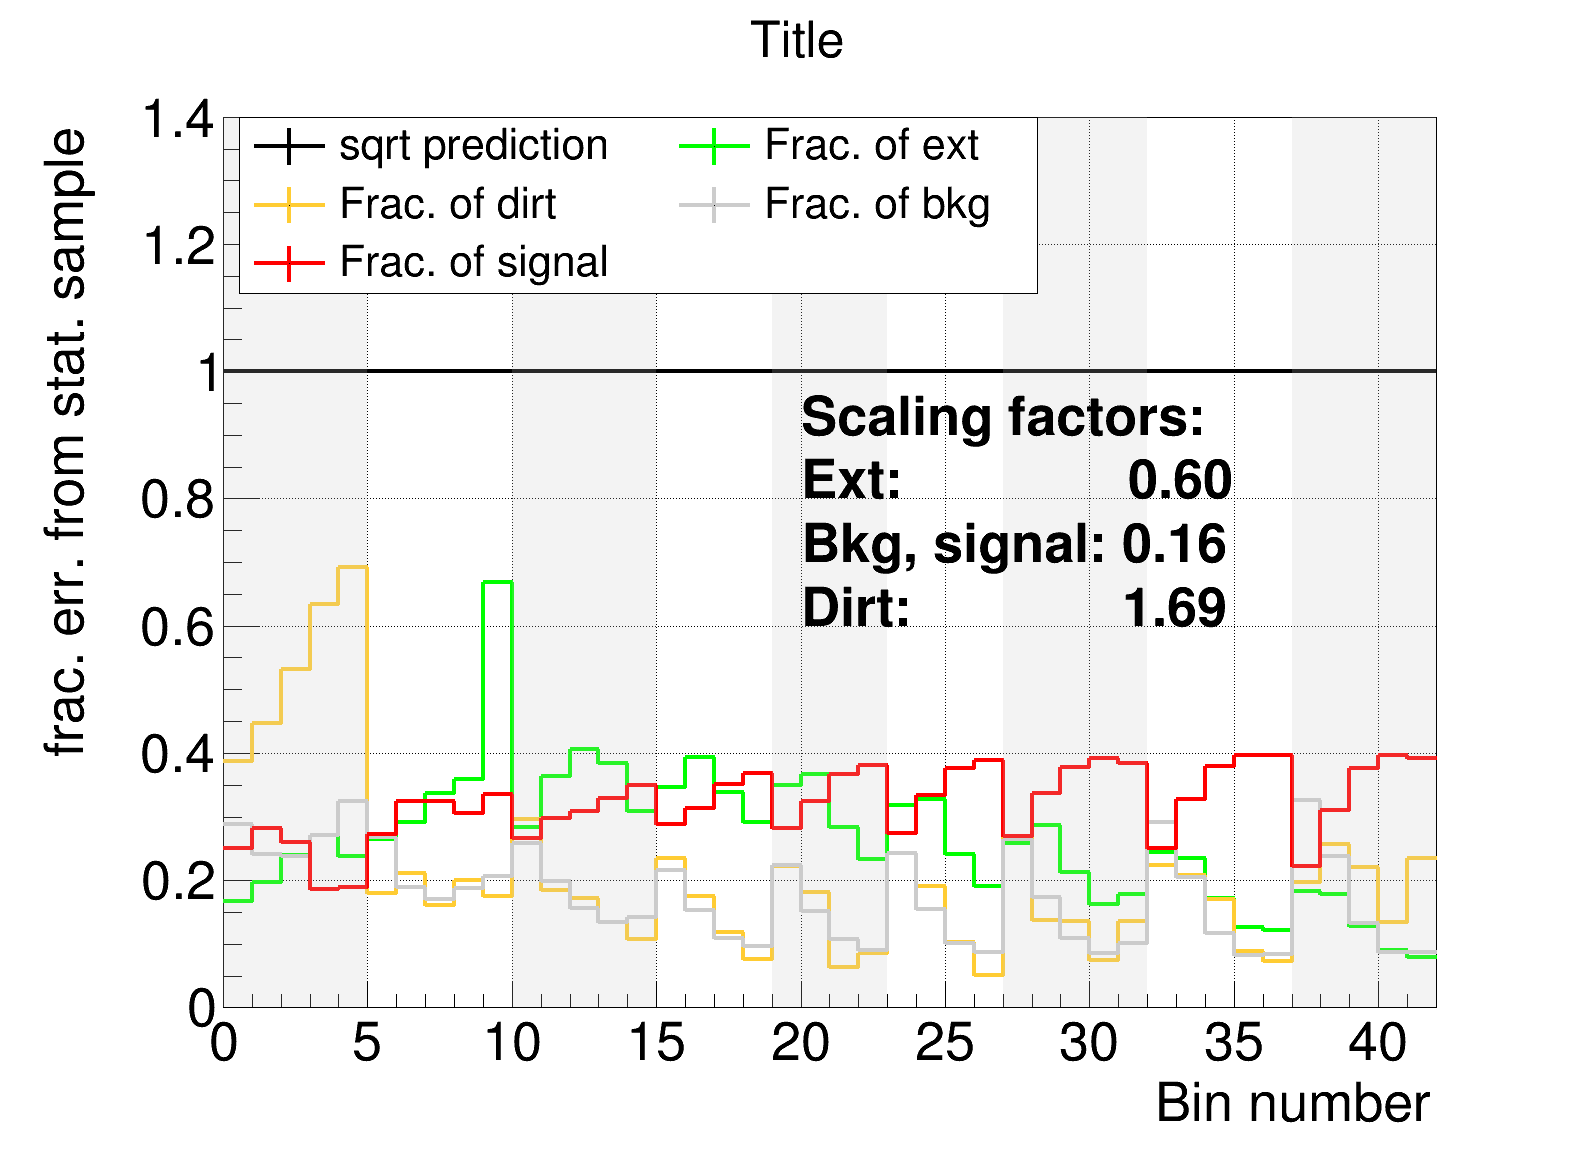

In [56]:
#Scalefactors: 
#Data:		1.0
#Ext:		0.600992748172
#Overlay:	0.169069492301
#Dirt:		1.69438986704

data_stat_vec = np.zeros((43))
ext_stat_vec = np.zeros((43))
dirt_stat_vec = np.zeros((43))
bkg_stat_vec = np.zeros((43))
signal_stat_vec = np.zeros((43))

data_vec = FF.plot2arr(h_data,1)
ext_vec = FF.plot2arr(h_ext,1)
dirt_vec = FF.plot2arr(h_dirt,1)
bkg_vec = FF.plot2arr(h_bkg,1)
signal_vec = FF.plot2arr(h_sig,1)

dirt_vec +=1e-3

for i in range(43):
    data_stat_vec[i] = math.sqrt(h_data.GetBinContent(i+1))
    ext_stat_vec[i] = ext_vec[i]/(math.sqrt(h_ext.GetBinContent(i+1)/(0.600992748172))+1e-3)
    dirt_stat_vec[i] = dirt_vec[i]/(math.sqrt(h_dirt.GetBinContent(i+1)/(1.69438986704))+1e-3)
    bkg_stat_vec[i] = bkg_vec[i]/(math.sqrt(h_bkg.GetBinContent(i+1)/(0.169069492301))+1e-3)
    signal_stat_vec[i] = signal_vec[i]/(math.sqrt(h_sig.GetBinContent(i+1)/(0.169069492301))+1e-3)

signal_vec[4]=0.1
signal_vec[9]=0.1

tot_vec = ext_vec+dirt_vec+bkg_vec+signal_vec
tot_stat_vec = np.zeros((43))
for i in range(43):
    tot_stat_vec[i] = math.sqrt(tot_vec[i])

print tot_stat_vec[0],tot_vec[0]
print dirt_stat_vec[0],dirt_vec[0]

frac_data_stat_vec = tot_stat_vec[0:-1]/tot_vec[0:-1]
frac_ext_stat_vec = ext_stat_vec[0:-1]/tot_vec[0:-1]
frac_dirt_stat_vec = dirt_stat_vec[0:-1]/tot_vec[0:-1]
frac_bkg_stat_vec = bkg_stat_vec[0:-1]/tot_vec[0:-1]
frac_signal_stat_vec = signal_stat_vec[0:-1]/tot_vec[0:-1]

h_frac_data_stat_vec = FF.arr2plot(frac_data_stat_vec/frac_data_stat_vec)
h_frac_ext_stat_vec = FF.arr2plot(frac_ext_stat_vec/frac_data_stat_vec)
h_frac_dirt_stat_vec = FF.arr2plot(frac_dirt_stat_vec/frac_data_stat_vec)
h_frac_bkg_stat_vec = FF.arr2plot(frac_bkg_stat_vec/frac_data_stat_vec)
h_frac_signal_stat_vec = FF.arr2plot(frac_signal_stat_vec/frac_data_stat_vec)

h_frac_ext_stat_vec.SetLineColor(ROOT.kGreen)
h_frac_dirt_stat_vec.SetLineColor(ROOT.kOrange-2)
h_frac_bkg_stat_vec.SetLineColor(ROOT.kGray)
h_frac_signal_stat_vec.SetLineColor(ROOT.kRed)

FF.main_plot(h_frac_data_stat_vec)
h_frac_data_stat_vec.SetMaximum(1.4)
h_frac_data_stat_vec.SetMinimum(0)
h_frac_data_stat_vec.SetXTitle('Bin number')
h_frac_data_stat_vec.SetYTitle('frac. err. from stat. sample')
h_frac_data_stat_vec.Draw()
h_frac_ext_stat_vec.Draw('same')
h_frac_dirt_stat_vec.Draw('same')
h_frac_bkg_stat_vec.Draw('same')
h_frac_signal_stat_vec.Draw('same')
h_histo = FF.histBkg(h_frac_signal_stat_vec)
h_histo.Draw('hist same')
t1 = ROOT.TText(20,.9,"Scaling factors:");
t2 = ROOT.TText(20,.8,"Ext:               0.60")
t3 = ROOT.TText(20,.7,"Bkg, signal: 0.16");
t4 = ROOT.TText(20,.6,"Dirt:              1.69");
t1.Draw()
t2.Draw()
t3.Draw()
t4.Draw()

legend = ROOT.TLegend(0.15,0.75,0.65,0.9)
legend.SetNColumns(2)
legend.AddEntry(h_frac_data_stat_vec,'sqrt prediction',"lep");
legend.AddEntry(h_frac_ext_stat_vec,'Frac. of ext',"lep");
legend.AddEntry(h_frac_dirt_stat_vec,'Frac. of dirt',"lep");
legend.AddEntry(h_frac_bkg_stat_vec,'Frac. of bkg',"lep");
legend.AddEntry(h_frac_signal_stat_vec,'Frac. of signal',"lep");

legend.Draw()

c1.Draw()
c1.SaveAs(outputdir_png + 'sample_stat_err2'+".png")
c1.SaveAs(outputdir_root + 'sample_stat_err2'+".root")
c1.SaveAs(outputdir_pdf + 'sample_stat_err2'+".pdf") 

In [57]:
# load all distributions and the Genie 3 tuned true
path_detsys = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
f_cv = ROOT.TFile.Open(path_detsys+'xsec_2D_Run3_wighted_t.root', 'read')
pot = 2.144e+20
h_true_g3_tune = ROOT.TH1F('h_true',"true tune3",43,0,43)
h_data = ROOT.TH1F('h_data',"data",42,0,42)
h_bkg = ROOT.TH1F('h_bkg',"Background",43,0,43)
h_sig = ROOT.TH1F('h_sig',"Background",43,0,43)
h_ext = ROOT.TH1F('h_ext',"Cosmic",43,0,43)
h_dirt = ROOT.TH1F('h_dirt',"Cosmic",43,0,43)
h_eff = ROOT.TH1F('h_eff',"Cosmic",43,0,43)

h_no_moun = ROOT.TH1F('h_no_moun',"h_no_moun",43,0,43)
h_nue = ROOT.TH1F('h_nue',"h_nue",43,0,43)
h_antinu = ROOT.TH1F('h_antinu',"h_antinu",43,0,43)
h_nc = ROOT.TH1F('h_nc',"h_nc",43,0,43)
h_ov = ROOT.TH1F('h_ov',"h_ov",43,0,43)
h_cosmic = ROOT.TH1F('h_cosmic',"h_cosmic",43,0,43)

h_rate_qe = ROOT.TH1F('h_rate_qe',"h_rate_qe",43,0,43)
h_rate_mec = ROOT.TH1F('h_rate_mec',"h_rate_mec",43,0,43)
h_rate_res = ROOT.TH1F('h_rate_res',"h_rate_res",43,0,43)
h_rate_dis = ROOT.TH1F('h_rate_dis',"h_rate_dis",43,0,43)

bin_counter = 0
for t_bin in range(len_theta): #len_theta
    h_temp = f_cv.Get('h_true['+str(t_bin)+']')
    h_temp2 = f_cv.Get('h_data['+str(t_bin)+']')
    h_temp3 = f_cv.Get('h_overlay['+str(t_bin)+']')
    h_temp31 = f_cv.Get('h_signal['+str(t_bin)+']')
    h_temp4 = f_cv.Get('h_ext['+str(t_bin)+']')
    h_temp5 = f_cv.Get('h_dirt['+str(t_bin)+']')
    h_temp6 = f_cv.Get('h_1d_eff['+str(t_bin)+']')
    
    h_temp10 = f_cv.Get('h_no_moun['+str(t_bin)+']')
    h_temp11 = f_cv.Get('h_nue['+str(t_bin)+']')
    h_temp12 = f_cv.Get('h_antinu['+str(t_bin)+']')
    h_temp13 = f_cv.Get('h_nc['+str(t_bin)+']')
    h_temp14 = f_cv.Get('h_ov['+str(t_bin)+']')
    h_temp15 = f_cv.Get('h_cosmic['+str(t_bin)+']')

    h_temp20 = f_cv.Get('h_QE_rate['+str(t_bin)+']')
    h_temp21 = f_cv.Get('h_MEC_rate['+str(t_bin)+']')
    h_temp22 = f_cv.Get('h_RES_rate['+str(t_bin)+']')
    h_temp23 = f_cv.Get('h_DIS_rate['+str(t_bin)+']')

    for m_bin in range(len_mom[t_bin]):
        bin_counter+=1
        h_true_g3_tune.SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))
        h_data.SetBinContent(bin_counter,h_temp2.GetBinContent(m_bin+1))
        h_bkg.SetBinContent(bin_counter,h_temp3.GetBinContent(m_bin+1))
        h_sig.SetBinContent(bin_counter,h_temp31.GetBinContent(m_bin+1))
        h_ext.SetBinContent(bin_counter,h_temp4.GetBinContent(m_bin+1))
        h_dirt.SetBinContent(bin_counter,h_temp5.GetBinContent(m_bin+1))
        h_eff.SetBinContent(bin_counter,h_temp6.GetBinContent(m_bin+1))
        
        h_no_moun.SetBinContent(bin_counter,h_temp10.GetBinContent(m_bin+1))
        h_nue.SetBinContent(bin_counter,h_temp11.GetBinContent(m_bin+1))
        h_antinu.SetBinContent(bin_counter,h_temp12.GetBinContent(m_bin+1))
        h_nc.SetBinContent(bin_counter,h_temp13.GetBinContent(m_bin+1))
        h_ov.SetBinContent(bin_counter,h_temp14.GetBinContent(m_bin+1))
        h_cosmic.SetBinContent(bin_counter,h_temp15.GetBinContent(m_bin+1))
        
        h_rate_qe.SetBinContent(bin_counter,h_temp20.GetBinContent(m_bin+1))
        h_rate_mec.SetBinContent(bin_counter,h_temp21.GetBinContent(m_bin+1))
        h_rate_res.SetBinContent(bin_counter,h_temp22.GetBinContent(m_bin+1))
        h_rate_dis.SetBinContent(bin_counter,h_temp23.GetBinContent(m_bin+1))
h_eff.SetBinContent(5,1)
h_eff.SetBinContent(10,1)

f_in = ROOT.TFile.Open('/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/My_Measurement/'+'FF_detsys.root', 'read')
h_true_g3_tune = f_in.Get('h_gen_cv')

In [58]:
#h_data h_sig
ext = FF.plot2arr(h_ext,1)
h_ext_42 = FF.arr2plot(ext[0:-1])
dirt = FF.plot2arr(h_dirt,1)
h_dirt_42 = FF.arr2plot(ext[0:-1])
bkg = FF.plot2arr(h_bkg,1)
h_bkg_42 = FF.arr2plot(bkg[0:-1])
h_data_sub_bkg = h_data.Clone()
h_data_sub_bkg.Add(h_ext_42,-1)
h_data_sub_bkg.Add(h_dirt_42,-1)
h_data_sub_bkg.Add(h_bkg_42,-1)
#data_arr = FF.plot2arr(h_data_sub_bkg,1)
#print data_arr.size
#h_data_sub_bkg = FF.arr2plot(data_arr[0:-1])

True

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/channel_no_fit.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/channel_no_fit.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/channel_no_fit.pdf has been created


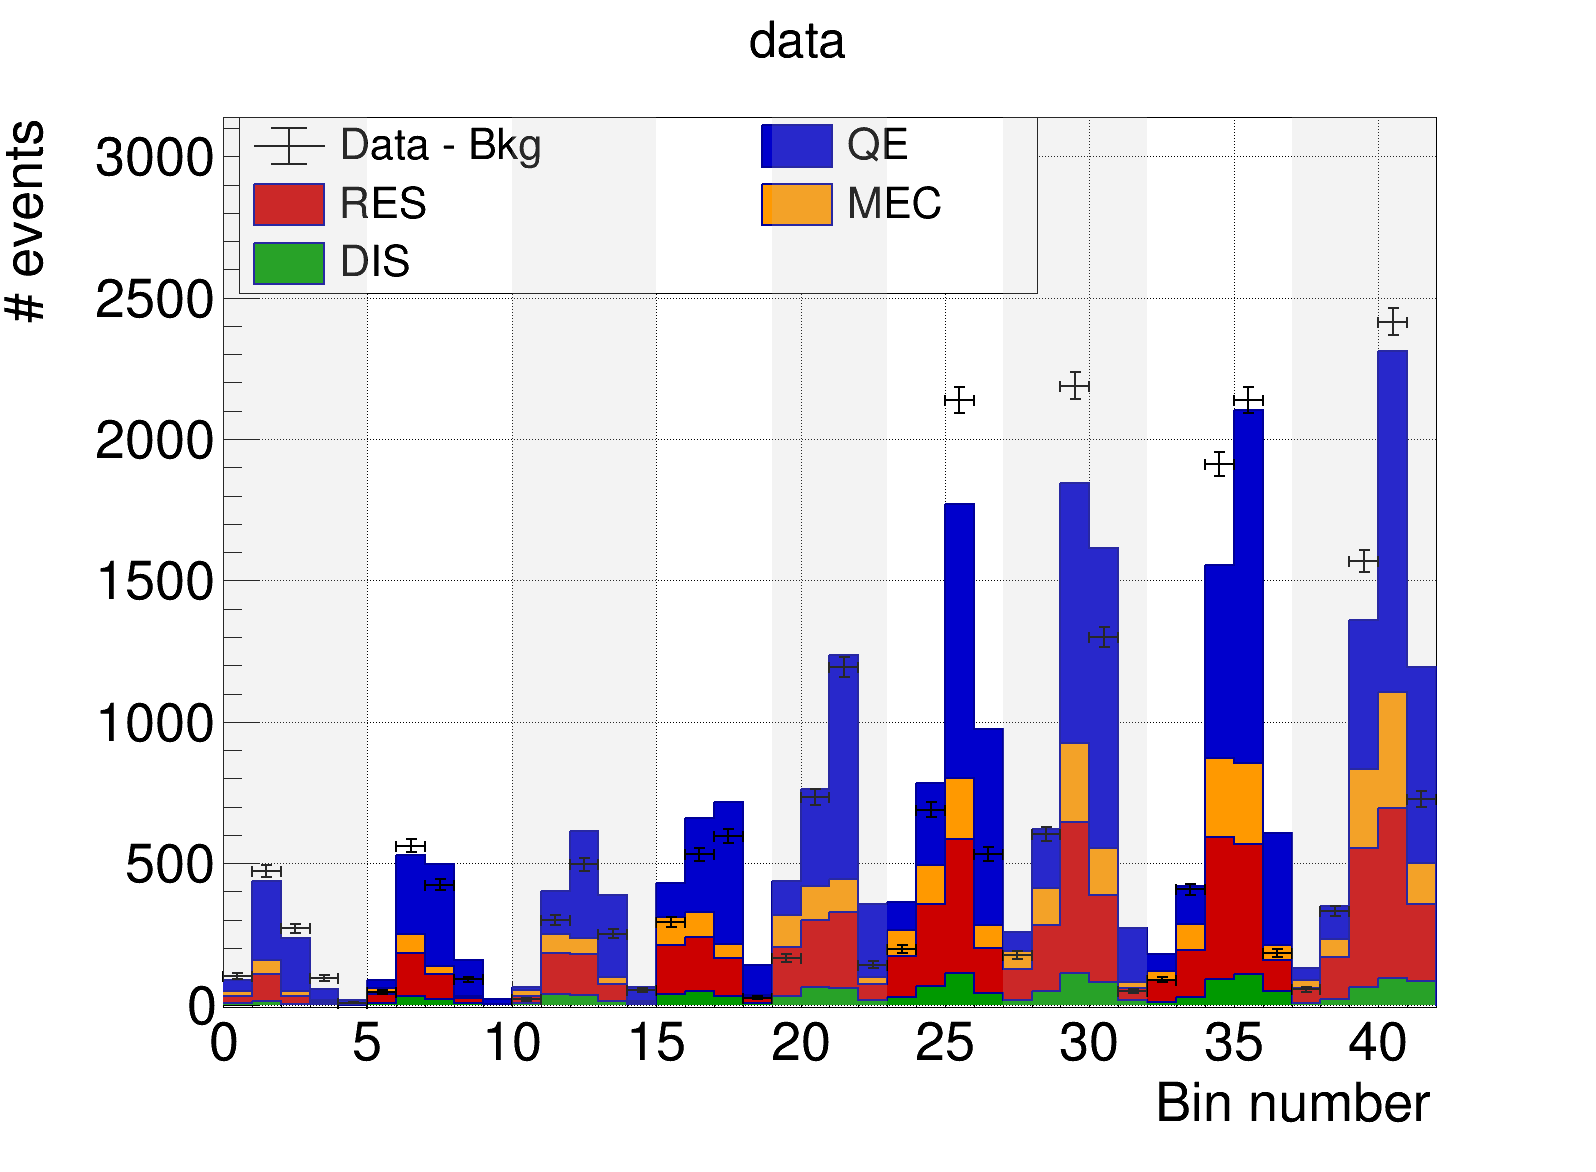

In [59]:
FF.main_plot(h_data_sub_bkg)
h_data_sub_bkg.SetXTitle('Bin number')
h_data_sub_bkg.SetYTitle('# events')
h_data_sub_bkg.SetMinimum(-10)
h_data_sub_bkg.SetMaximum(-1111)
h_data_sub_bkg.SetMaximum(h_data_sub_bkg.GetMaximum()*1.3)
h_data_sub_bkg.Draw('E1')
h_rate_qe1 = h_rate_qe.Clone()
h_rate_mec1 = h_rate_mec.Clone()
h_rate_res1 = h_rate_res.Clone()
h_rate_dis1 = h_rate_dis.Clone()

h_rate_qe1.SetFillColor(ROOT.kBlue+1)
h_rate_res1.SetFillColor(ROOT.kRed+1)
h_rate_mec1.SetFillColor(ROOT.kOrange-3)
h_rate_dis1.SetFillColor(ROOT.kGreen+2)

h_data_sub_bkg.SetLineWidth(2)
h_rate_res1.SetLineWidth(2)
h_rate_qe1.SetLineWidth(2)
h_rate_mec1.SetLineWidth(2)
h_rate_dis1.SetLineWidth(2)

hs = ROOT.THStack("hs",'variable'+';'+'axis_name'+'; Entries per bin');
hs.Add(h_rate_dis1)
hs.Add(h_rate_res1)
hs.Add(h_rate_mec1)
hs.Add(h_rate_qe1)

legend = ROOT.TLegend(0.15,0.75,0.65,0.9)
legend.SetNColumns(2)
legend.AddEntry(h_data_sub_bkg,'Data - Bkg',"lep");
legend.AddEntry(h_rate_qe1,'QE',"f");
legend.AddEntry(h_rate_res1,'RES',"f");
legend.AddEntry(h_rate_mec1,'MEC',"f");
legend.AddEntry(h_rate_dis1,'DIS',"f");
legend.Draw()

hs.Draw('hist same')
h_data_sub_bkg.Draw('same E1')
h_histo = FF.histBkg(h_data_sub_bkg)
h_histo.Draw('hist same')

c1.Draw()
c1.SaveAs(outputdir_png + 'channel_no_fit'+".png")
c1.SaveAs(outputdir_root + 'channel_no_fit'+".root")
c1.SaveAs(outputdir_pdf + 'channel_no_fit'+".pdf") 

Changed array size from 43 to 42:  43


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/channel_no_fit_ratio.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/channel_no_fit_ratio.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/channel_no_fit_ratio.pdf has been created


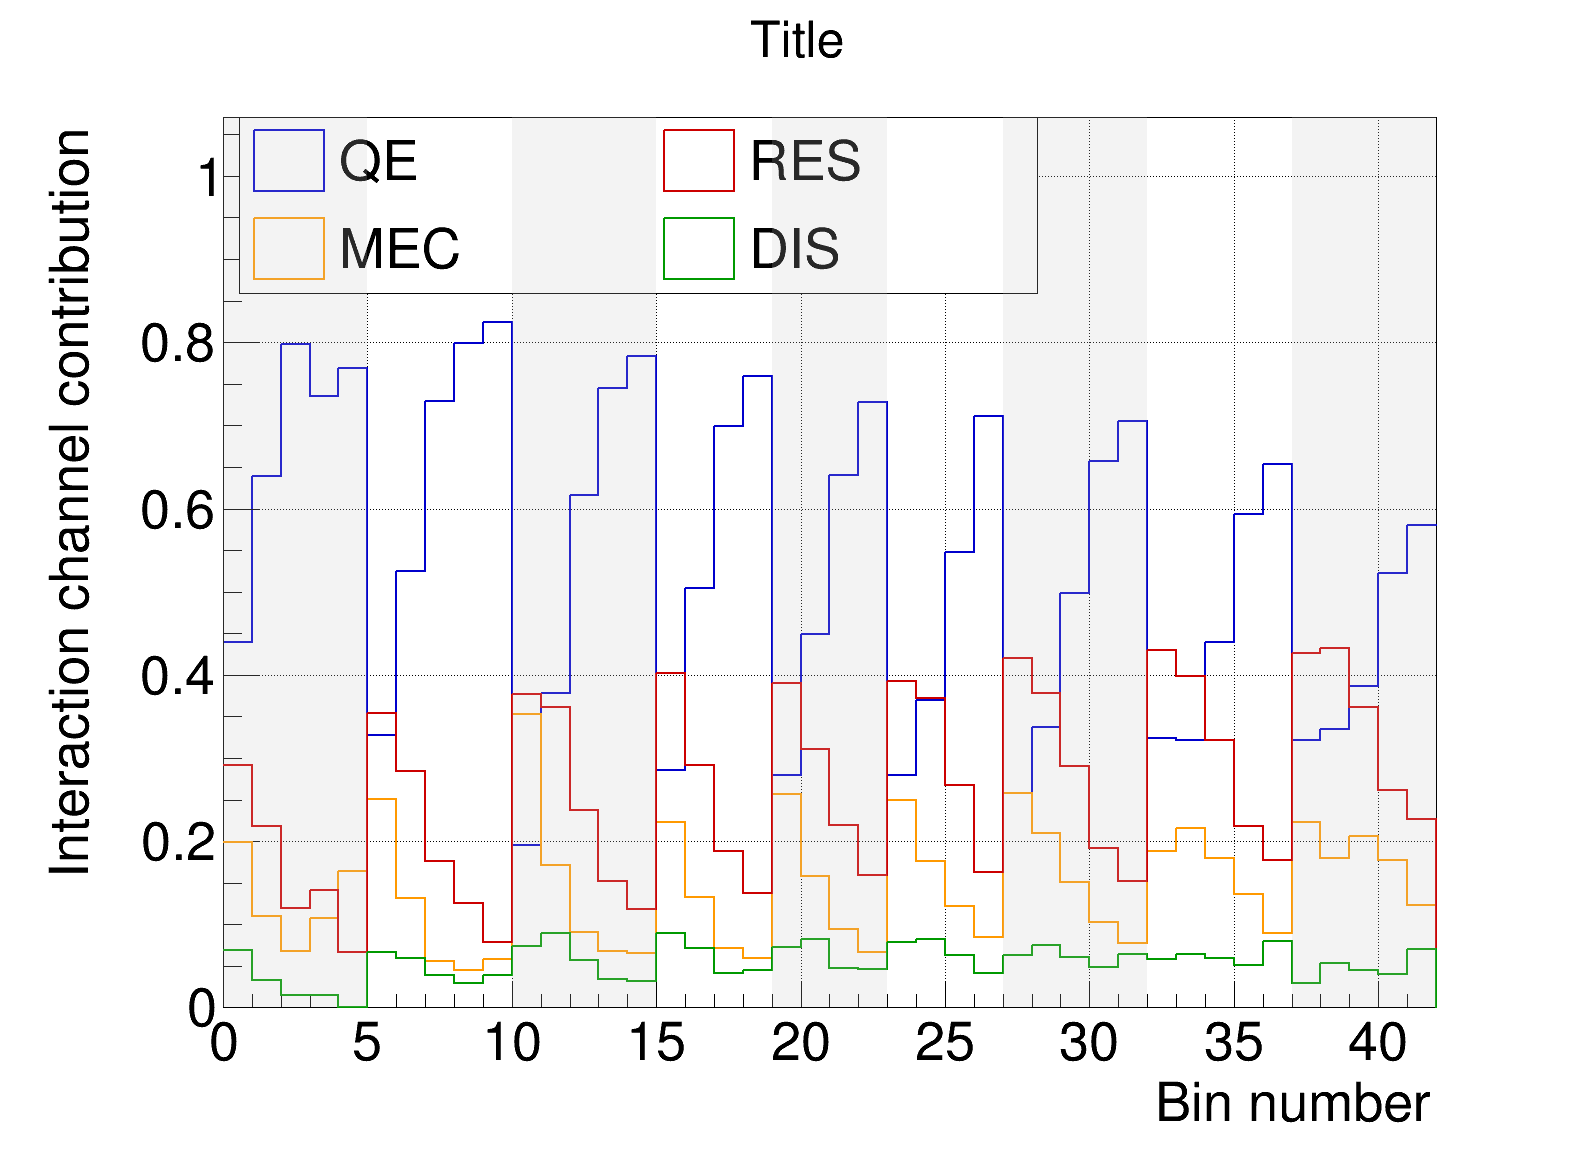

In [60]:
h_mc_tot = h_rate_qe.Clone()
h_mc_tot.Add(h_rate_res)
h_mc_tot.Add(h_rate_mec)
h_mc_tot.Add(h_rate_dis)
h_mc_tot.SetFillColor(ROOT.kBlack)
for i in range(42):
    h_mc_tot.SetBinError(i+1,0)

'''h_data_r = h_data_sub_bkg.Clone()
h_data_r.Divide(h_mc_tot)
h_data_r.SetMinimum(0)
h_data_r.SetMaximum(2)
h_data_r.Draw('E1')'''

h_qe_r = h_rate_qe.Clone()
h_mec_r = h_rate_mec.Clone()
h_res_r = h_rate_res.Clone()
h_dis_r = h_rate_dis.Clone()
h_qe_r.Divide(h_mc_tot)
h_mec_r.Divide(h_mc_tot)
h_res_r.Divide(h_mc_tot)
h_dis_r.Divide(h_mc_tot)

data_arr = FF.plot2arr(h_qe_r,1)
print 'Changed array size from 43 to 42: ',data_arr.size
h_qe_r = FF.arr2plot(data_arr[0:-1])

FF.main_plot(h_qe_r)

h_qe_r.SetLineColor(ROOT.kBlue+1)
h_res_r.SetLineColor(ROOT.kRed+1)
h_mec_r.SetLineColor(ROOT.kOrange-3)
h_dis_r.SetLineColor(ROOT.kGreen+2)

h_qe_r.SetFillColor(0)
h_mec_r.SetFillColor(0)
h_res_r.SetFillColor(0)
h_dis_r.SetFillColor(0)

h_qe_r.SetLineWidth(2)
h_mec_r.SetLineWidth(2)
h_res_r.SetLineWidth(2)
h_dis_r.SetLineWidth(2)

h_qe_r.SetMinimum(0)
h_qe_r.SetMaximum(1)
h_qe_r.SetYTitle('Interaction channel contribution')
h_qe_r.SetXTitle('Bin number')
h_qe_r.SetMaximum(-1111)
h_qe_r.SetMaximum(h_qe_r.GetMaximum()*1.3)
h_qe_r.Draw('hist')

legend = ROOT.TLegend(0.15,0.75,0.65,0.9)
legend.SetNColumns(2)
#legend.AddEntry(h_data_sub_bkg,'Data - Bkg',"lep");
legend.AddEntry(h_qe_r,'QE',"f");
legend.AddEntry(h_res_r,'RES',"f");
legend.AddEntry(h_mec_r,'MEC',"f");
legend.AddEntry(h_dis_r,'DIS',"f");
legend.Draw()

h_mec_r.Draw('hist same')
h_res_r.Draw('hist same')
h_dis_r.Draw('hist same')
h_histo.Draw('hist same')

ROOT.gStyle.SetPaintTextFormat("0.2f");
c1.Draw()
c1.SaveAs(outputdir_png + 'channel_no_fit_ratio'+".png")
c1.SaveAs(outputdir_root + 'channel_no_fit_ratio'+".root")
c1.SaveAs(outputdir_pdf + 'channel_no_fit_ratio'+".pdf") 

In [61]:
h_histo = FF.histBkg(h_data_sub_bkg)

In [62]:
def my_distribution( x, para):
    #print x
    xx= x[0]
    #y = np.zeros((binnum))
    y = np.zeros((4))
    #for i in range(binnum):
    #    y[i] = h_temp[i].GetBinContent(h_temp[i].GetXaxis().FindFixBin(xx))
    y[0] = h_rate_qe.GetBinContent(h_rate_qe.GetXaxis().FindFixBin(xx))
    y[1] = h_rate_mec.GetBinContent(h_rate_mec.GetXaxis().FindFixBin(xx))
    y[2] = h_rate_res.GetBinContent(h_rate_res.GetXaxis().FindFixBin(xx))
    y[3] = h_rate_dis.GetBinContent(h_rate_dis.GetXaxis().FindFixBin(xx))
    
    return np.dot(para,y)

In [63]:

f = ROOT.TF1("my_distribution", my_distribution, 0, 42, 4)
f.SetParameters(np.zeros((4)))
for i in range (4):
    f.SetParLimits(i,0, 10);
    #f.SetParLimits(i,0.0, h_true.GetBinContent(i+1)*50000);

result = h_data_sub_bkg.Fit(f,'WL')


 FCN=1120.42 FROM MIGRAD    STATUS=CONVERGED     322 CALLS         323 TOTAL
                     EDM=1.68679e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.81066e-01   2.31136e-02   9.55919e-05   5.30169e-02
   2  p1           4.94374e-01   2.66842e-01   4.16689e-04  -1.60111e-02
   3  p2           1.76363e+00   1.57328e-01   1.28524e-04  -5.97519e-02
   4  p3           1.23203e-09   1.29622e-02   1.66476e-03** at limit **
                               ERR DEF= 0.5


Warning in <HFit::FitObject>: A weighted likelihood fit is requested but histogram is not weighted - do a standard Likelihood fit


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/channel_fit.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/channel_fit.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/channel_fit.pdf has been created


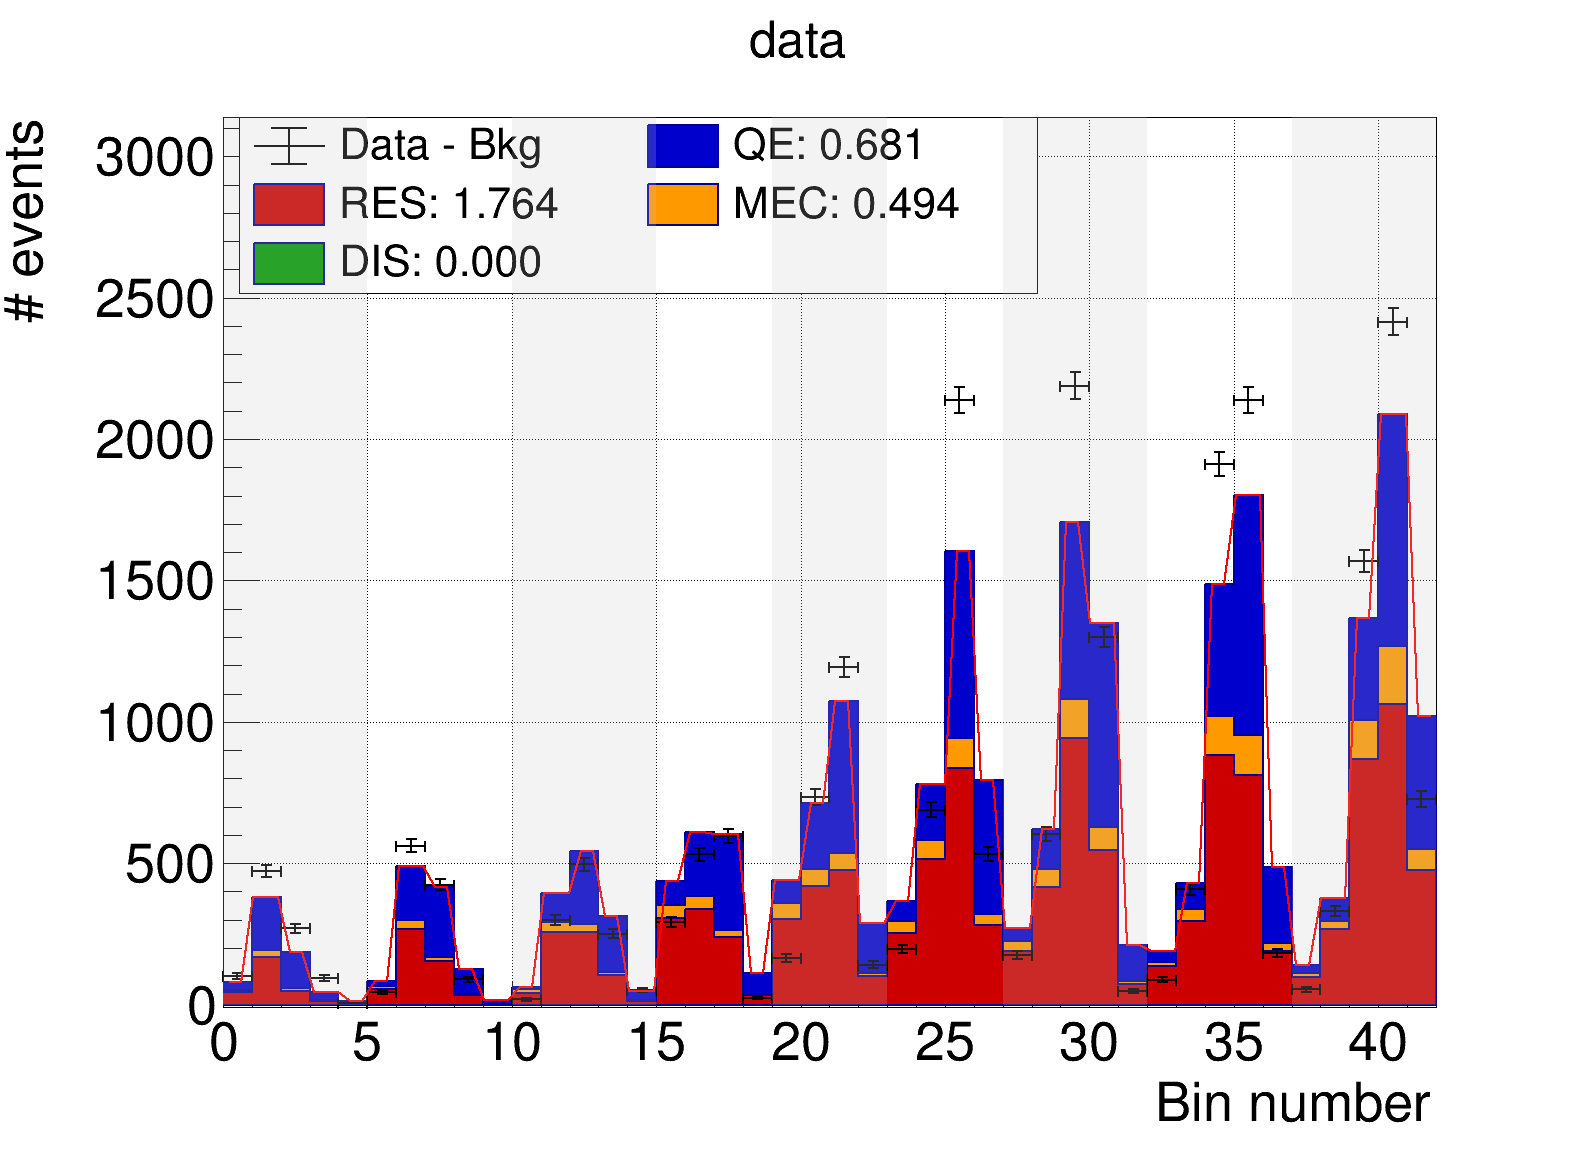

In [64]:
FF.main_plot(h_data_sub_bkg)
h_data_sub_bkg.SetXTitle('Bin number')
h_data_sub_bkg.SetYTitle('# events')
h_data_sub_bkg.Draw('E1')
h_rate_qe1 = h_rate_qe.Clone()
h_rate_mec1 = h_rate_mec.Clone()
h_rate_res1 = h_rate_res.Clone()
h_rate_dis1 = h_rate_dis.Clone()
h_rate_qe1.Scale(f.GetParameters()[0])
h_rate_mec1.Scale(f.GetParameters()[1])
h_rate_res1.Scale(f.GetParameters()[2])
h_rate_dis1.Scale(f.GetParameters()[3])

h_rate_qe1.SetFillColor(ROOT.kBlue+1)
h_rate_res1.SetFillColor(ROOT.kRed+1)
h_rate_mec1.SetFillColor(ROOT.kOrange-3)
h_rate_dis1.SetFillColor(ROOT.kGreen+2)

h_data_sub_bkg.SetLineWidth(2)
h_rate_res1.SetLineWidth(2)
h_rate_qe1.SetLineWidth(2)
h_rate_mec1.SetLineWidth(2)
h_rate_dis1.SetLineWidth(2)



hs = ROOT.THStack("hs",'variable'+';'+'axis_name'+'; Entries per bin');
hs.Add(h_rate_dis1)
hs.Add(h_rate_res1)
hs.Add(h_rate_mec1)
hs.Add(h_rate_qe1)

legend = ROOT.TLegend(0.15,0.75,0.65,0.9)
legend.SetNColumns(2)
legend.AddEntry(h_data_sub_bkg,'Data - Bkg',"lep");
legend.AddEntry(h_rate_qe1,'QE: {:04.3f}'.format(f.GetParameters()[0]),"f");
legend.AddEntry(h_rate_res1,'RES: {:04.3f}'.format(f.GetParameters()[2]),"f");
legend.AddEntry(h_rate_mec1,'MEC: {:04.3f}'.format(f.GetParameters()[1]),"f");
legend.AddEntry(h_rate_dis1,'DIS: {:04.3f}'.format(f.GetParameters()[3]),"f");
legend.Draw()

hs.Draw('hist same')
h_data_sub_bkg.Draw('same E1')
h_histo.Draw('hist same')


c1.Draw()
c1.SaveAs(outputdir_png + 'channel_fit'+".png")
c1.SaveAs(outputdir_root + 'channel_fit'+".root")
c1.SaveAs(outputdir_pdf + 'channel_fit'+".pdf") 

In [65]:
h_frac = FF.arr2plot(frac_tot)
h_stat = FF.arr2plot(frac_stat)
h_det = FF.plot_err_array(frac_stat+frac_det_GuB)
h_crt = FF.plot_err_array(frac_stat+frac_det_GuB+frac_crt_GuB)
h_xsec = FF.plot_err_array(frac_stat+frac_det_GuB+frac_crt_GuB+frac_other_GuB+frac_all_GuB)
h_flux = FF.plot_err_array(frac_stat+frac_det_GuB+frac_crt_GuB+frac_other_GuB+frac_all_GuB+frac_flux_GuB)
h_dirt = FF.plot_err_array(frac_stat+frac_det_GuB+frac_crt_GuB+frac_other_GuB+frac_all_GuB+frac_flux_GuB+frac_dirt_GuB)
h_pot = FF.plot_err_array(frac_stat+frac_det_GuB+frac_crt_GuB+frac_other_GuB+frac_all_GuB+frac_flux_GuB+frac_dirt_GuB+frac_pot_GuB)


h_stat = FF.arr2plot(frac_stat)
h_err = FF.plot_err_array(frac_tot)
h_err_stat = FF.plot_err_array(frac_stat)

#frac_tot_GuB = frac_det_GuB+frac_other_GuB+frac_all_GuB+frac_flux_GuB+frac_crt_GuB+frac_dirt_GuB+frac_stat_GuB+frac_pot_GuB


In [66]:
#print cov_stat[0]

In [67]:
this_pred = FF.plot2arr(h_this_pred,1)
cov_stat = getVar(this_pred,frac_stat)
cov_det = getVar(this_pred,frac_stat+frac_det_GuB)
cov_crt = getVar(this_pred,frac_stat+frac_det_GuB+frac_crt_GuB)
cov_xsec = getVar(this_pred,frac_stat+frac_det_GuB+frac_crt_GuB+frac_other_GuB+frac_all_GuB)
cov_flux = getVar(this_pred,frac_stat+frac_det_GuB+frac_crt_GuB+frac_other_GuB+frac_all_GuB+frac_flux_GuB)
cov_dirt = getVar(this_pred,frac_stat+frac_det_GuB+frac_crt_GuB+frac_other_GuB+frac_all_GuB+frac_flux_GuB+frac_dirt_GuB)
cov_pot = getVar(this_pred,frac_stat+frac_det_GuB+frac_crt_GuB+frac_other_GuB+frac_all_GuB+frac_flux_GuB+frac_dirt_GuB+frac_pot_GuB)

h_ev_stat = h_this_pred.Clone()
h_ev_det = h_this_pred.Clone()
h_ev_crt = h_this_pred.Clone()
h_ev_xsec = h_this_pred.Clone()
h_ev_flux = h_this_pred.Clone()
h_ev_dirt = h_this_pred.Clone()
h_ev_pot = h_this_pred.Clone()

for i in range(42):
    h_ev_stat.SetBinError(i+1,math.sqrt(cov_stat[0][i][i]))
    h_ev_det.SetBinError(i+1,math.sqrt(cov_det[0][i][i]))
    h_ev_crt.SetBinError(i+1,math.sqrt(cov_crt[0][i][i]))
    h_ev_xsec.SetBinError(i+1,math.sqrt(cov_xsec[0][i][i]))
    h_ev_flux.SetBinError(i+1,math.sqrt(cov_flux[0][i][i]))
    h_ev_dirt.SetBinError(i+1,math.sqrt(cov_dirt[0][i][i]))
    h_ev_pot.SetBinError(i+1,math.sqrt(cov_pot[0][i][i]))



Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/evrate_error_comb.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/evrate_error_comb.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/evrate_error_comb.pdf has been created


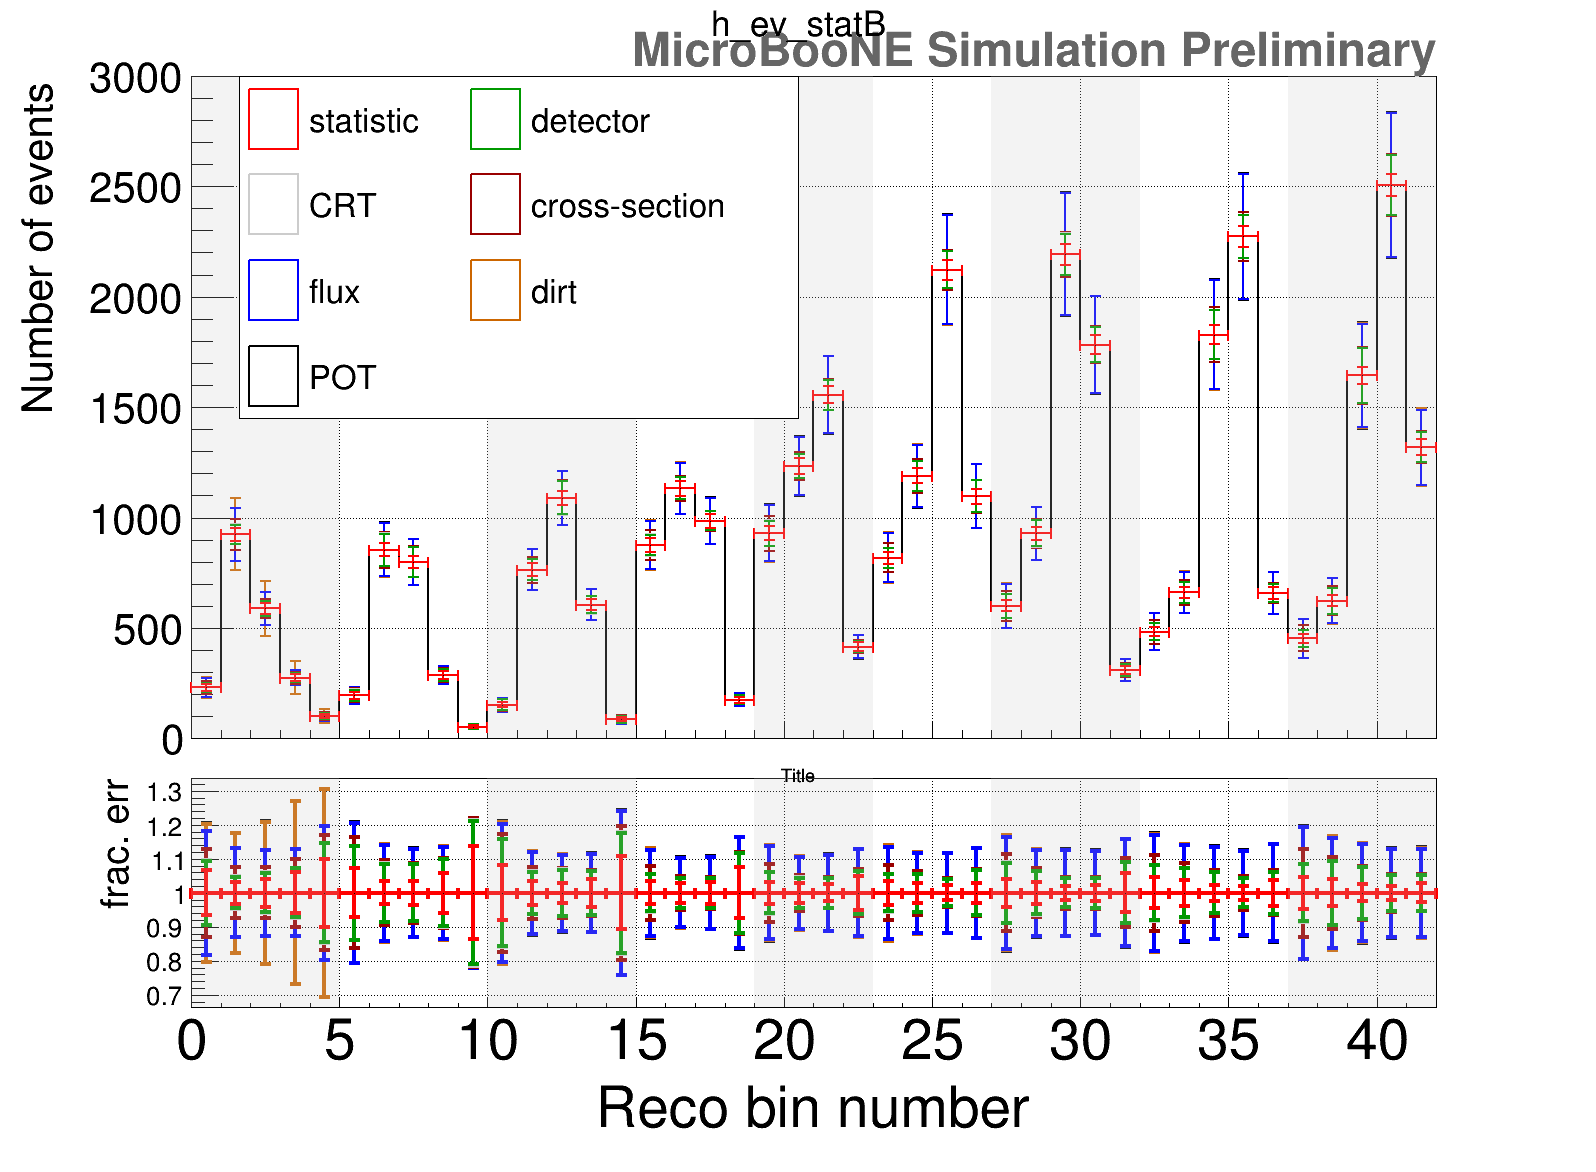

In [68]:
ROOT.gStyle.SetEndErrorSize(10)
h_ev_stat.SetLineWidth(2)
h_ev_stat.SetLineWidth(2)
h_ev_pot.SetLineWidth(2)
h_ev_crt.SetLineWidth(2)
h_ev_det.SetLineWidth(2)
h_ev_xsec.SetLineWidth(2)
h_ev_flux.SetLineWidth(2)
h_ev_dirt.SetLineWidth(2)
h_ev_stat.SetYTitle('fractional uncertainty')
h_ev_statB = ROOT.TH1F('h_ev_statB','h_ev_statB',42,0,42)
for i in range(42):
    h_ev_statB.SetBinContent(i+1,h_ev_stat.GetBinContent(i+1))
FF.main_plot(h_ev_statB)
h_ev_statB.SetMaximum(3000)
#h_ev_statB.SetLineColor(ROOT.kBlack)
h_ev_statB.SetLineWidth(2)
h_ev_statB.SetXTitle('Reco bin number')
h_ev_statB.SetYTitle('Number of events')

c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.25)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()

h_ev_statB.GetYaxis().SetLabelSize(0.06);
h_ev_statB.GetYaxis().SetTitleSize(0.06);
h_ev_statB.GetYaxis().SetTitleOffset(1.01);
h_ev_statB.GetYaxis().SetTitleOffset(1.01);
h_ev_statB.GetXaxis().SetLabelOffset(999);
h_ev_statB.GetXaxis().SetTitleOffset(999);
h_ev_statB.GetXaxis().SetLabelSize(0);
h_ev_statB.GetXaxis().SetTitleSize(0);
pad1.SetBottomMargin(0.03);
pad1.SetLeftMargin(0.12);
pad1.SetTopMargin(0.1)

h_ev_statB.Draw('hist')
h_ev_pot.SetLineColor(ROOT.kBlack)
h_ev_pot.Draw('E1 same')
h_ev_dirt.SetLineColor(ROOT.kOrange+2)
h_ev_dirt.Draw('E1 same')
h_ev_flux.SetLineColor(ROOT.kBlue)
h_ev_flux.Draw('E1 same')
h_ev_xsec.SetLineColor(ROOT.kRed+2)
h_ev_xsec.Draw('E1 same')
h_ev_crt.SetLineColor(ROOT.kGray)
h_ev_crt.Draw('E1 same')
h_ev_det.SetLineColor(ROOT.kGreen+2)
h_ev_det.Draw('E1 same')
h_ev_stat.SetLineColor(ROOT.kRed)
h_ev_stat.Draw('E1 same')
h_histo.Draw('hist same')

legend = ROOT.TLegend(0.15,0.45,0.5,0.9)
legend.SetNColumns(2)
legend.AddEntry(h_ev_stat,'statistic',"f");
legend.AddEntry(h_ev_det,'detector',"f");
legend.AddEntry(h_ev_crt,'CRT',"f");
legend.AddEntry(h_ev_xsec,'cross-section',"f");
legend.AddEntry(h_ev_flux,'flux',"f");
legend.AddEntry(h_ev_dirt,'dirt',"f");
legend.AddEntry(h_ev_pot,'POT',"f");
#legend.AddEntry(h_dirt,'dirt',"f");
legend.Draw()

prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
prelim.SetTextFont(62);
prelim.SetTextColor(ROOT.kGray+2);
prelim.SetNDC();
prelim.SetTextSize(1/15.);
prelim.SetTextAlign(32);
prelim.Draw()

c1.cd()
pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
pad2.SetLeftMargin(0.12);
pad2.SetLeftMargin(0.12);
pad2.Draw()
pad2.cd()

h_err.SetXTitle('Reco bin number')
h_err.SetYTitle('Fractional error')
h_err.GetXaxis().CenterTitle()
h_err.GetYaxis().SetTitleSize(0.1)
h_err.GetYaxis().SetTitleOffset(0.3)
h_err.GetYaxis().SetLabelSize(0.07)
h_err.GetXaxis().SetTitleSize(0.15)
h_err.GetXaxis().SetLabelSize(0.15)
h_err.GetXaxis().SetTitleOffset(1)

h_err.SetYTitle('frac. err')
h_err.Draw('E1')
h_pot.SetLineColor(ROOT.kBlack)
h_pot.Draw('E1 same')
h_dirt.SetLineColor(ROOT.kOrange+2)
h_dirt.Draw('E1 same')
h_flux.SetLineColor(ROOT.kBlue)
h_flux.Draw('E1 same')
h_xsec.SetLineColor(ROOT.kRed+2)
h_xsec.Draw('E1 same')
h_crt.SetLineColor(ROOT.kGray)
h_crt.Draw('E1 same')
h_det.SetLineColor(ROOT.kGreen+2)
h_det.Draw('E1 same')
h_err_stat.SetLineColor(ROOT.kRed)
h_err_stat.Draw('E1 same')
h_histo.Draw('hist same')

c1.Draw()
c1.SaveAs(outputdir_png + 'evrate_error_comb'+".png")
c1.SaveAs(outputdir_root + 'evrate_error_comb'+".root")
c1.SaveAs(outputdir_pdf + 'evrate_error_comb'+".pdf")


In [69]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [70]:
h_frac = FF.arr2plot(frac_tot)
h_stat = FF.arr2plot(frac_stat)
h_det = FF.plot_err_array(frac_det_GuB)
h_crt = FF.plot_err_array(frac_crt_GuB)
h_xsec = FF.plot_err_array(frac_other_GuB+frac_all_GuB)
h_flux = FF.plot_err_array(frac_flux_GuB)
h_dirt = FF.plot_err_array(frac_dirt_GuB)
h_pot = FF.plot_err_array(frac_pot_GuB)

alpha = 0.05

h_pot.SetLineColor(ROOT.kBlack)
h_pot.SetFillColorAlpha(ROOT.kBlack,alpha)
h_dirt.SetLineColor(ROOT.kOrange+2)
h_dirt.SetFillColorAlpha(ROOT.kOrange+2,alpha)
h_flux.SetLineColor(ROOT.kBlue)
h_flux.SetFillColorAlpha(ROOT.kBlue,alpha)
h_xsec.SetLineColor(ROOT.kRed+2)
h_xsec.SetFillColorAlpha(ROOT.kRed+2,alpha)
h_crt.SetLineColor(ROOT.kGray)
h_crt.SetFillColorAlpha(ROOT.kGray,alpha)
h_det.SetLineColor(ROOT.kGreen+2)
h_det.SetFillColorAlpha(ROOT.kGreen+2,alpha)
h_err_stat.SetLineColor(ROOT.kRed)
h_err_stat.SetFillColorAlpha(ROOT.kRed,alpha)

h_pot2 = h_pot.Clone()
h_dirt2 = h_dirt.Clone()
h_flux2 = h_flux.Clone()
h_xsec2 = h_xsec.Clone()
h_crt2 = h_crt.Clone()
h_det2 = h_det.Clone()
h_err_stat2 = h_err_stat.Clone()

h_pot3 = h_pot.Clone()
h_dirt3 = h_dirt.Clone()
h_flux3 = h_flux.Clone()
h_xsec3 = h_xsec.Clone()
h_crt3 = h_crt.Clone()
h_det3 = h_det.Clone()
h_err_stat3 = h_err_stat.Clone()
'''for i in range(42):
    h_pot2.SetBinContent(i+1,h_pot.GetBinError(i+1)+1)
    h_dirt2.SetBinContent(i+1,h_dirt.GetBinError(i+1)+1)
    h_flux2.SetBinContent(i+1,h_flux2.GetBinError(i+1)+1)
    h_xsec2.SetBinContent(i+1,h_xsec2.GetBinError(i+1)+1)
    h_crt2.SetBinContent(i+1,h_crt2.GetBinError(i+1)+1)
    h_det2.SetBinContent(i+1,h_det2.GetBinError(i+1)+1)
    h_err_stat2.SetBinContent(i+1,h_err_stat2.GetBinError(i+1)+1)
    h_pot3.SetBinContent(i+1,1-h_pot.GetBinError(i+1))
    h_dirt3.SetBinContent(i+1,1-h_dirt.GetBinError(i+1))
    h_flux3.SetBinContent(i+1,1-h_flux.GetBinError(i+1))
    h_xsec3.SetBinContent(i+1,1-h_xsec.GetBinError(i+1))
    h_crt3.SetBinContent(i+1,1-h_crt.GetBinError(i+1))
    h_det3.SetBinContent(i+1,1-h_det.GetBinError(i+1))
    h_err_stat3.SetBinContent(i+1,1-h_err_stat.GetBinError(i+1))'''
    
for i in range(42):
    h_pot2.SetBinContent(i+1,h_pot.GetBinError(i+1))
    h_dirt2.SetBinContent(i+1,h_dirt.GetBinError(i+1))
    h_flux2.SetBinContent(i+1,h_flux2.GetBinError(i+1))
    h_xsec2.SetBinContent(i+1,h_xsec2.GetBinError(i+1))
    h_crt2.SetBinContent(i+1,h_crt2.GetBinError(i+1))
    h_det2.SetBinContent(i+1,h_det2.GetBinError(i+1))
    h_err_stat2.SetBinContent(i+1,h_err_stat2.GetBinError(i+1))
    h_pot3.SetBinContent(i+1,1-h_pot.GetBinError(i+1))
    h_dirt3.SetBinContent(i+1,1-h_dirt.GetBinError(i+1))
    h_flux3.SetBinContent(i+1,1-h_flux.GetBinError(i+1))
    h_xsec3.SetBinContent(i+1,1-h_xsec.GetBinError(i+1))
    h_crt3.SetBinContent(i+1,1-h_crt.GetBinError(i+1))
    h_det3.SetBinContent(i+1,1-h_det.GetBinError(i+1))
    h_err_stat3.SetBinContent(i+1,1-h_err_stat.GetBinError(i+1))
    

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/frac_error_comb.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/frac_error_comb.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/frac_error_comb.pdf has been created


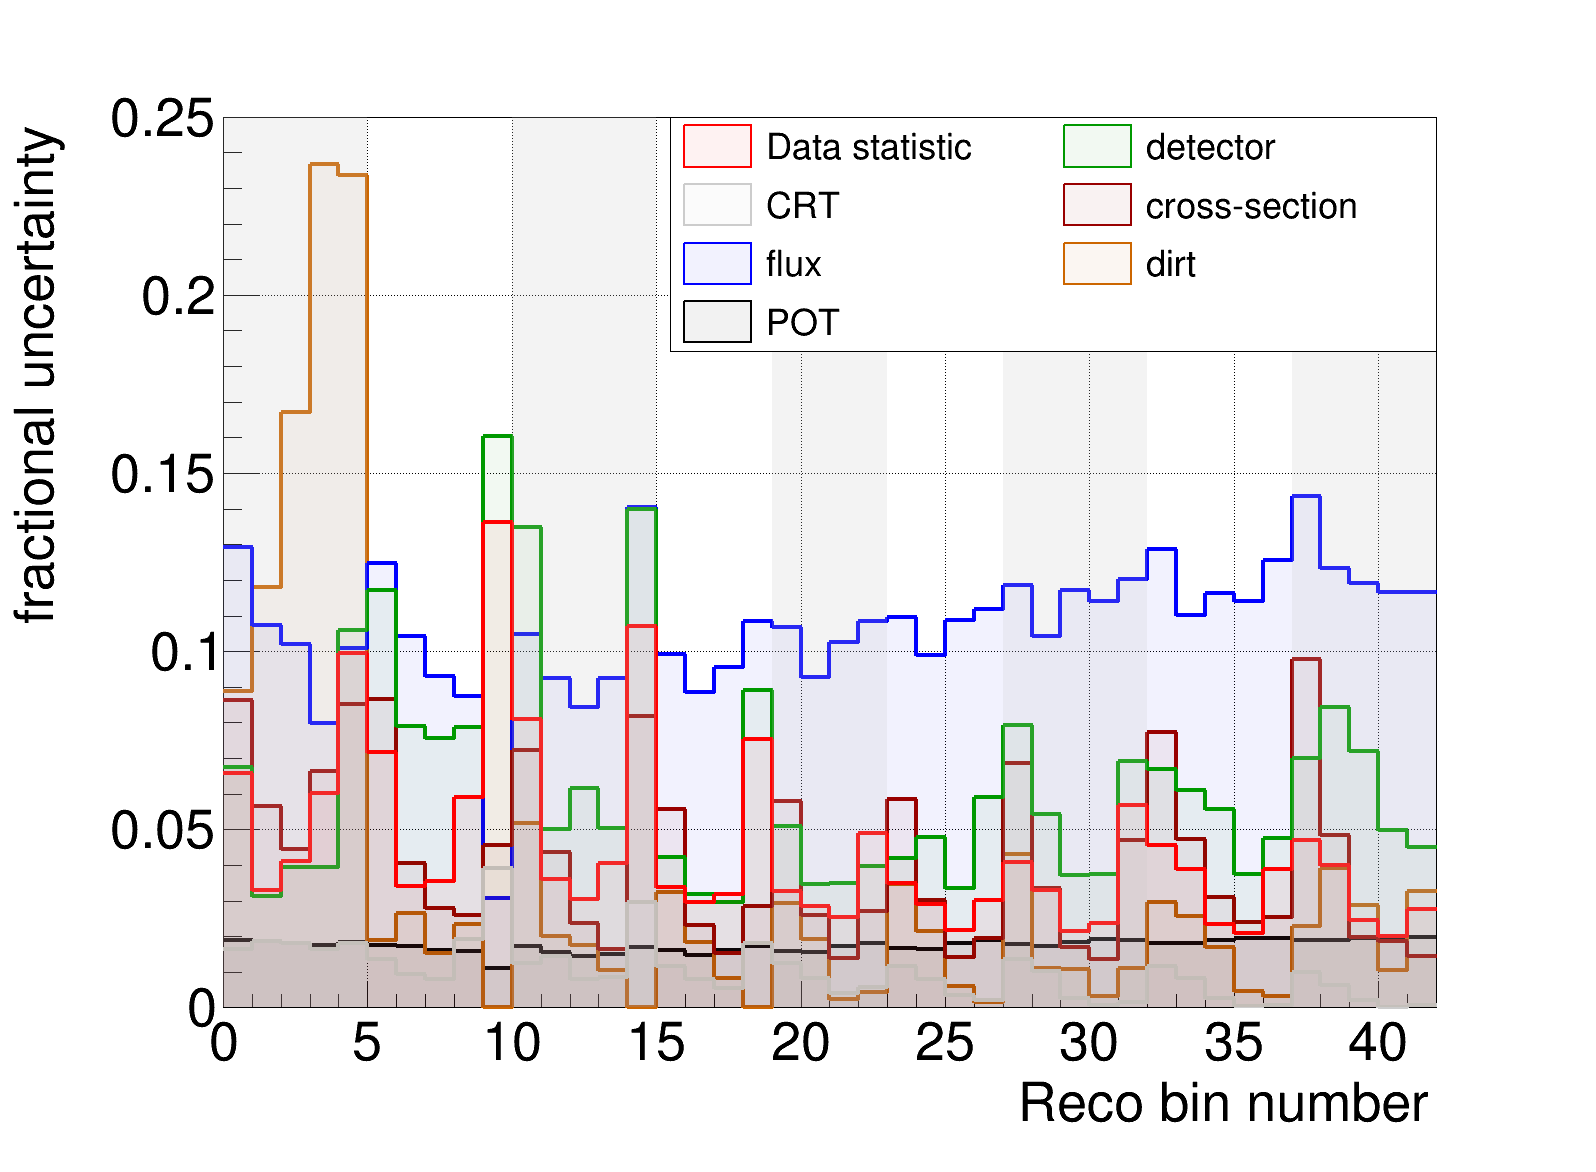

In [71]:
h_err.SetLineWidth(2)
h_err_stat.SetLineWidth(2)
h_pot.SetLineWidth(2)
h_crt.SetLineWidth(2)
h_det.SetLineWidth(2)
h_xsec.SetLineWidth(2)
h_det.SetLineWidth(2)
h_flux.SetLineWidth(2)
h_dirt.SetLineWidth(2)
h_pot.SetYTitle('fractional uncertainty')
#h_err.Draw('E2')
h_pot.SetMinimum(0)
h_pot.SetMaximum(0.25)
h_pot.Draw('E2')
h_pot2.Draw('hist same')
#h_pot3.Draw('hist same')
h_dirt.Draw('E2 same')
h_dirt2.Draw('hist same')
#h_dirt3.Draw('hist same')
h_flux.Draw('E2 same')
#h_flux3.Draw('hist same')
h_flux2.Draw('hist same')
h_xsec.Draw('E2 same')
h_xsec2.Draw('hist same')
#h_xsec3.Draw('hist same')
h_crt.Draw('E2 same')
h_crt2.Draw('hist same')
#h_crt3.Draw('hist same')
h_det.Draw('E2 same')
h_det2.Draw('hist same')
#h_det3.Draw('hist same')
h_err_stat.Draw('E2 same')
h_err_stat2.Draw('hist same')
#h_err_stat3.Draw('hist same')
h_histo.Draw('hist same')

legend = ROOT.TLegend(0.42,0.7,0.9,0.9)
legend.SetNColumns(2)
legend.AddEntry(h_err_stat,'Data statistic',"f");
legend.AddEntry(h_det,'detector',"f");
legend.AddEntry(h_crt,'CRT',"f");
legend.AddEntry(h_xsec,'cross-section',"f");
legend.AddEntry(h_flux,'flux',"f");
legend.AddEntry(h_dirt,'dirt',"f");
legend.AddEntry(h_pot,'POT',"f");
#legend.AddEntry(h_dirt,'dirt',"f");

legend.Draw()


c1.Draw()
c1.SaveAs(outputdir_png + 'frac_error_comb'+".png")
c1.SaveAs(outputdir_root + 'frac_error_comb'+".root")
c1.SaveAs(outputdir_pdf + 'frac_error_comb'+".pdf")


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/frac_error_stat.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/frac_error_stat.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/frac_error_stat.pdf has been created


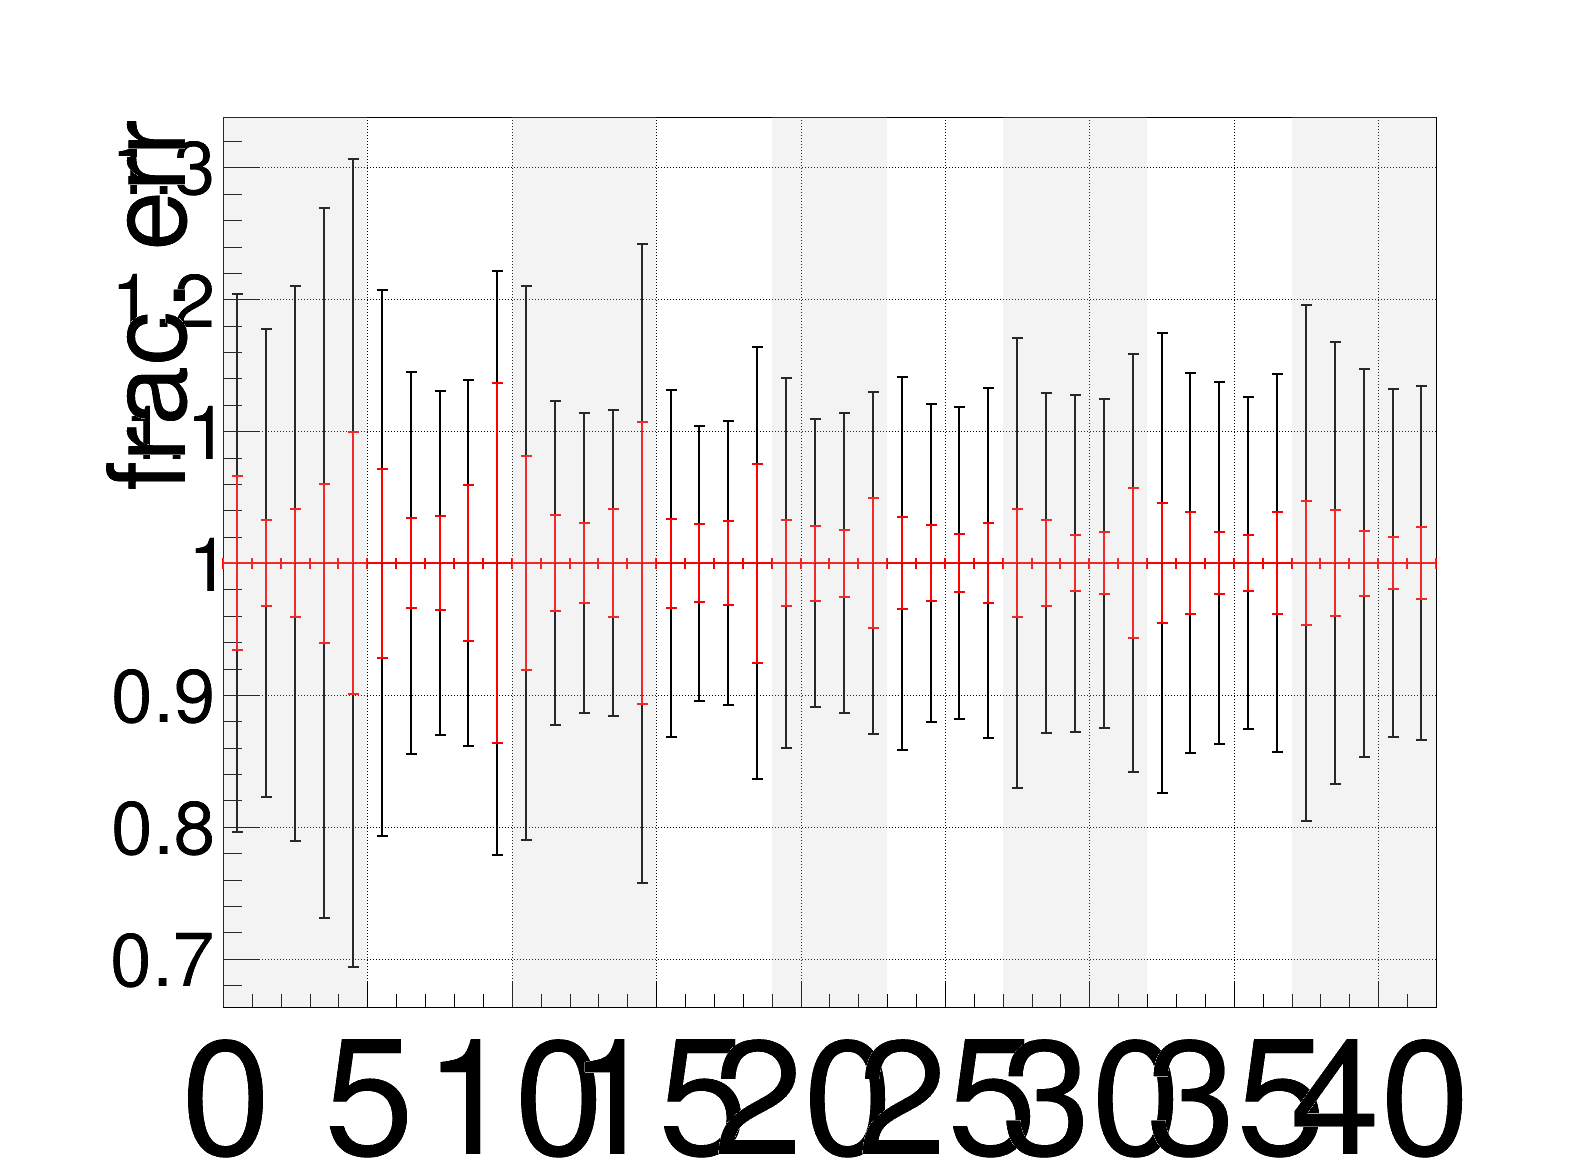

In [72]:
h_err.SetLineWidth(2)
h_err_stat.SetLineWidth(2)
h_err.Draw('E1')
h_err_stat.SetLineColor(ROOT.kRed)
h_err_stat.Draw('E1 same')
h_histo.Draw('hist same')

c1.Draw()
c1.SaveAs(outputdir_png + 'frac_error_stat'+".png")
c1.SaveAs(outputdir_root + 'frac_error_stat'+".root")
c1.SaveAs(outputdir_pdf + 'frac_error_stat'+".pdf")


Warning in <TFile::Append>: Replacing existing TH1: h_this_err (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this_err (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this_err (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this_err (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this_err (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this_err (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this_err (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this_err (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this_err (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this_err (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this_err (Potential memory leak).
Warning in <TFile::Append>: Repl

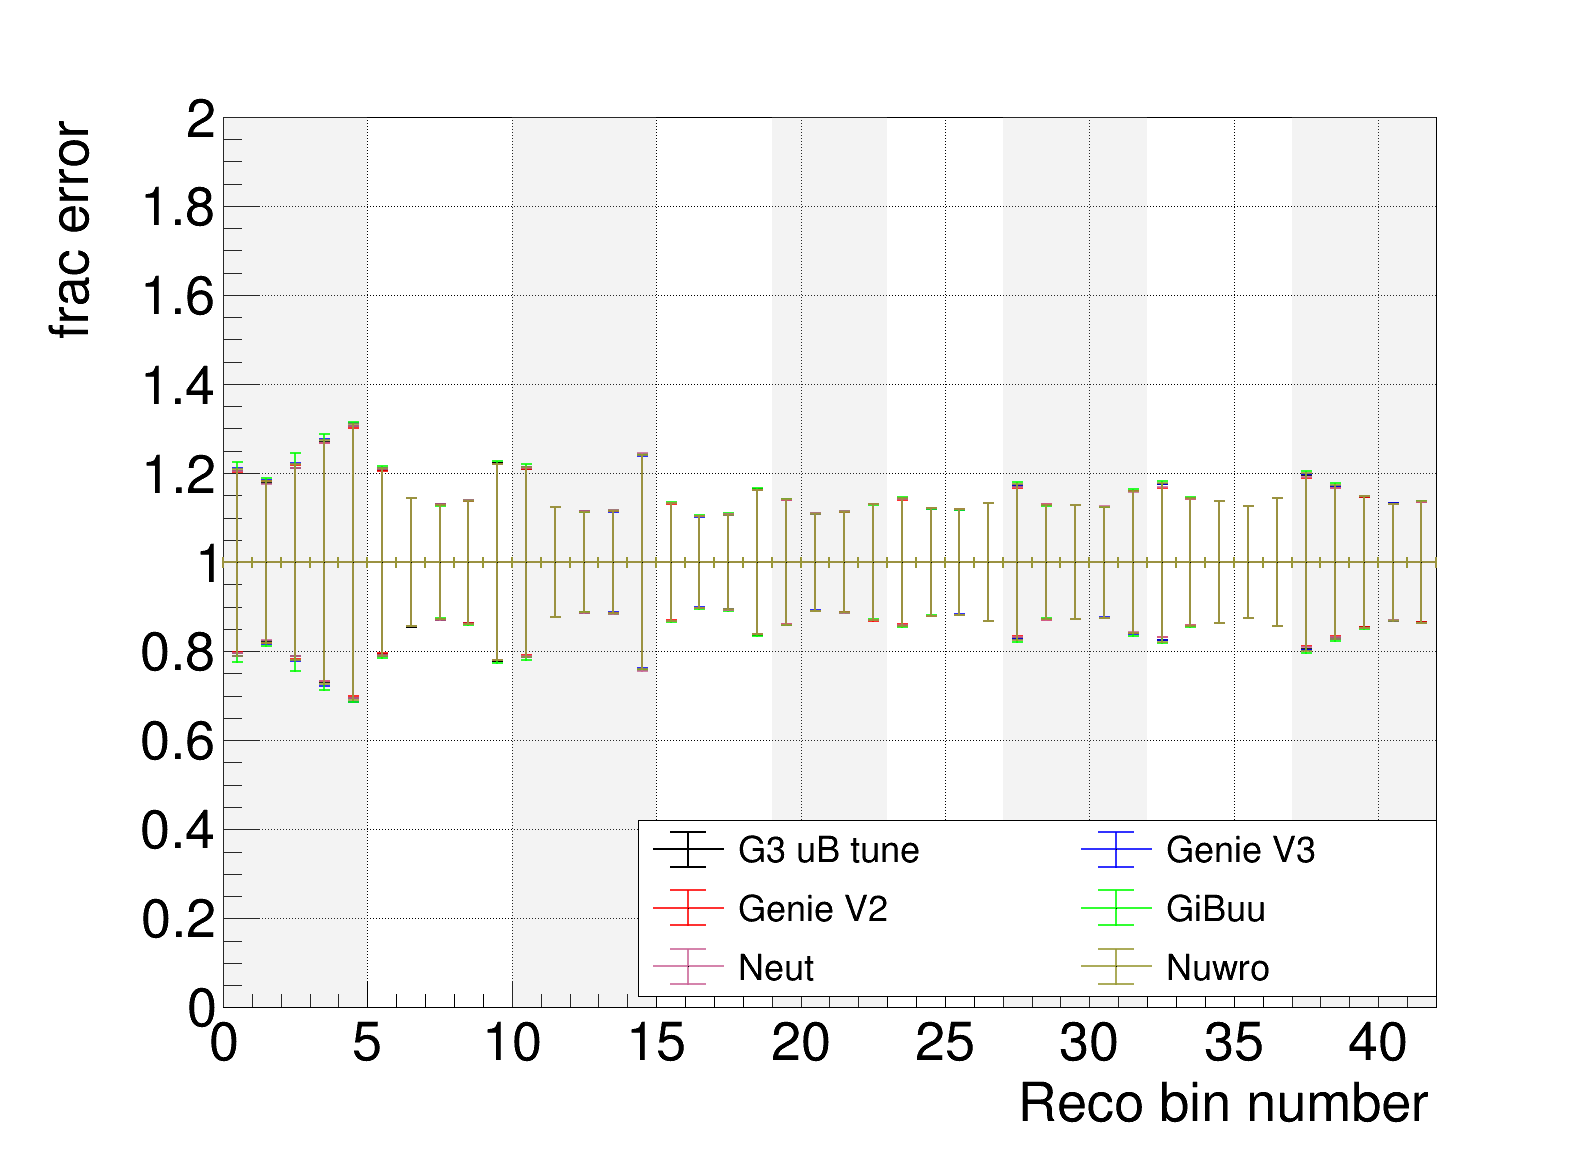

In [73]:
#model = [GuB, G3, G2, Neut, NuWro, GiBuu]
error = ['det','other','all','flux','crt','dirt','stat','tot']

for x in error:

    h_frac_G3 = FF.plot_err_array(eval('frac_'+x+'_G3'))
    h_frac_G2 = FF.plot_err_array(eval('frac_'+x+'_G2'))
    h_frac_GuB = FF.plot_err_array(eval('frac_'+x+'_GuB'))
    h_frac_gibuu = FF.plot_err_array(eval('frac_'+x+'_GiBuu'))
    h_frac_neut = FF.plot_err_array(eval('frac_'+x+'_Neut'))
    h_frac_nuwro = FF.plot_err_array(eval('frac_'+x+'_NuWro'))

    h_frac_G3.SetLineColorAlpha(ROOT.kBlue,0.8)
    h_frac_G2.SetLineColorAlpha(ROOT.kRed,0.8)
    h_frac_gibuu.SetLineColorAlpha(ROOT.kGreen,0.8)
    h_frac_neut.SetLineColorAlpha(ROOT.kPink+2,0.8)
    h_frac_nuwro.SetLineColorAlpha(ROOT.kYellow-2,0.8)
    
    h_frac_G3.SetLineWidth(2)
    h_frac_G2.SetLineWidth(2)
    h_frac_gibuu.SetLineWidth(2)
    h_frac_neut.SetLineWidth(2)
    h_frac_nuwro.SetLineWidth(2)
    h_frac_GuB.SetLineWidth(2)

    h_histo = FF.histBkg(h_frac_GuB)
    h_frac_GuB.SetMinimum(0)
    h_frac_GuB.SetMaximum(2)
    h_frac_GuB.Draw('e1')
    h_histo.Draw('same hist')
    h_frac_G3.Draw('same e1')
    h_frac_G2.Draw('same e1')
    h_frac_gibuu.Draw('same e1')
    h_frac_neut.Draw('same e1')
    h_frac_nuwro.Draw('same e1')

    legend = ROOT.TLegend(0.4,0.15,0.9,0.3)
    legend.SetNColumns(2)
    legend.AddEntry(h_frac_GuB,'G3 uB tune',"lep");
    legend.AddEntry(h_frac_G3,'Genie V3',"lep");
    legend.AddEntry(h_frac_G2,'Genie V2',"lep");
    legend.AddEntry(h_frac_gibuu,'GiBuu',"lep");
    legend.AddEntry(h_frac_neut,'Neut',"lep");
    legend.AddEntry(h_frac_nuwro,'Nuwro',"lep");
    legend.Draw()

    c1.Draw()
    c1.SaveAs(outputdir_png + 'error_'+x+"_models.png")
    c1.SaveAs(outputdir_root + 'error_'+x+"_models.root")
    c1.SaveAs(outputdir_pdf + 'error_'+x+"_models.pdf")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/prediction_models.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/prediction_models.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/prediction_models.pdf has been created


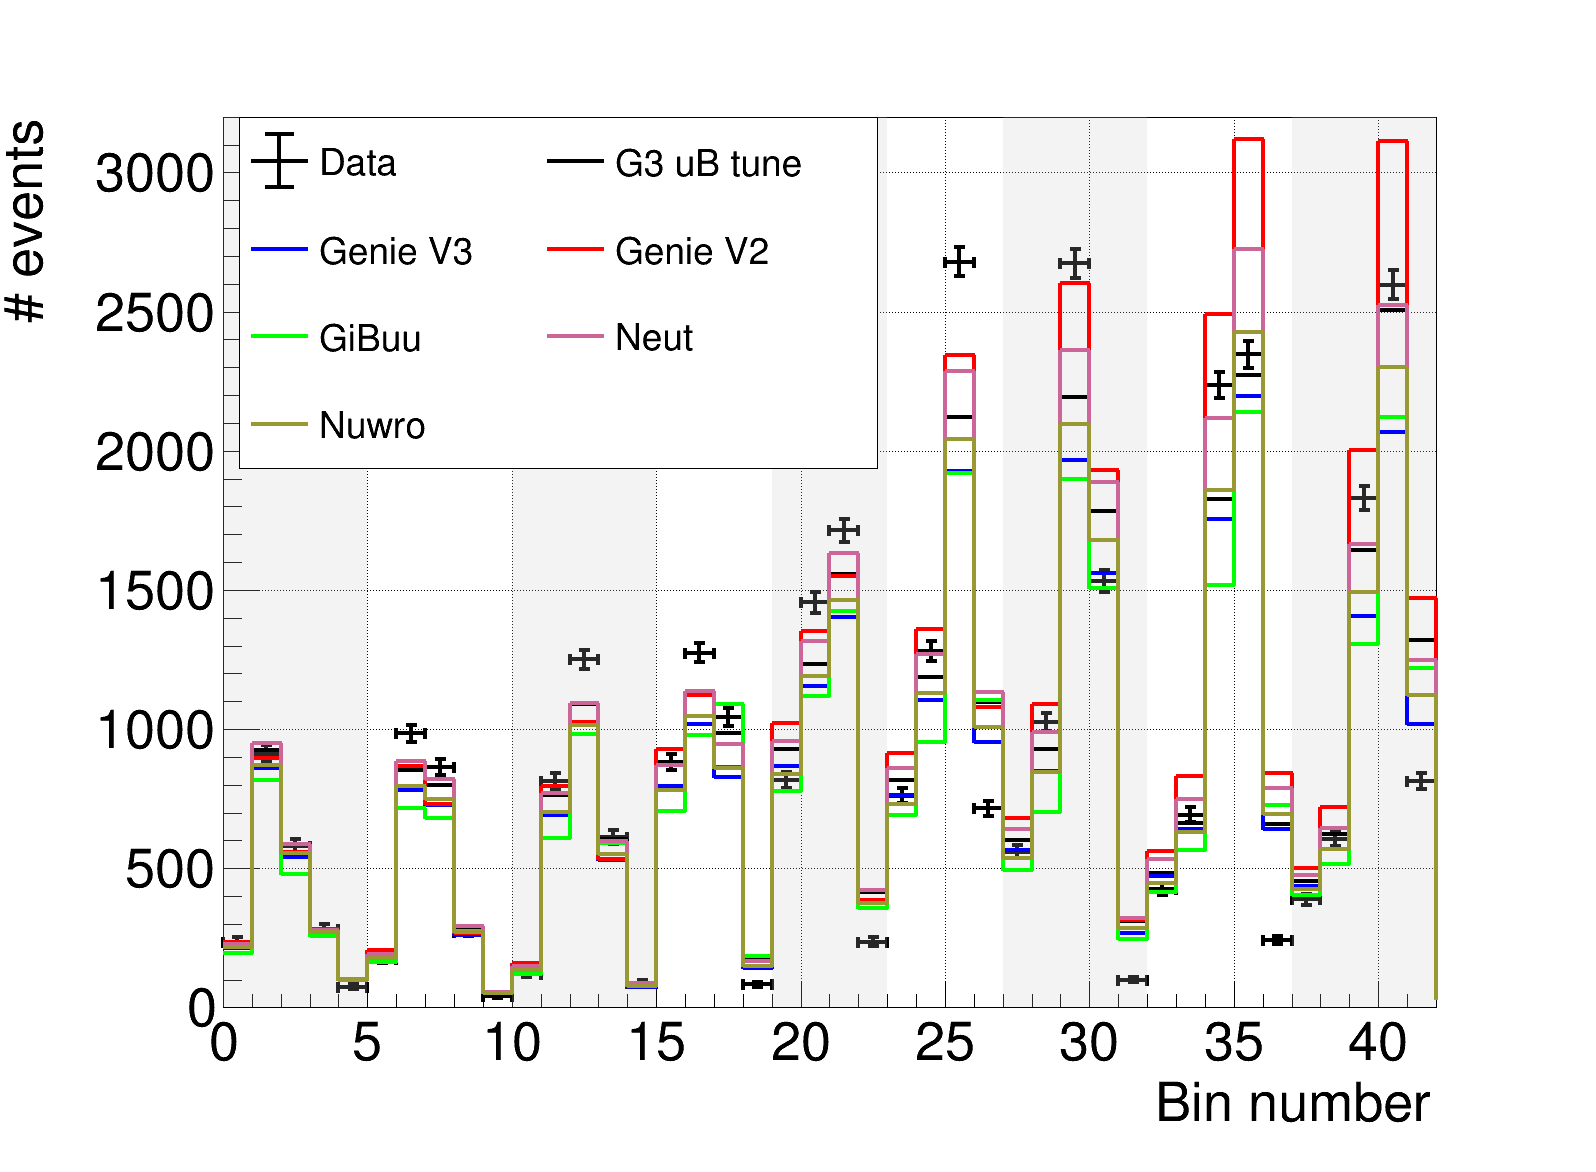

In [75]:

h_pred_GuB.SetLineColor(ROOT.kBlack)
h_pred_G3.SetLineColor(ROOT.kBlue)
h_pred_G2.SetLineColor(ROOT.kRed)
h_pred_GiBuu.SetLineColor(ROOT.kGreen)
h_pred_neut.SetLineColor(ROOT.kPink+2)
h_pred_nuwro.SetLineColor(ROOT.kYellow-2)
'''
h_pred_GuB.SetLineWidth(2)
h_pred_G3.SetLineWidth(2)
h_pred_G2.SetLineWidth(2)
h_pred_GiBuu.SetLineWidth(2)
h_pred_neut.SetLineWidth(2)
h_pred_nuwro.SetLineWidth(2)
'''
h_pred_GuB.SetLineWidth(4)
h_pred_G3.SetLineWidth(4)
h_pred_G2.SetLineWidth(4)
h_pred_GiBuu.SetLineWidth(4)
h_pred_neut.SetLineWidth(4)
h_pred_nuwro.SetLineWidth(4)

FF.main_plot(h_data)
h_data.SetMaximum(3200)
h_data.SetYTitle('# events')
h_data.SetXTitle('Bin number')
h_data.Draw('E1')
h_histo.Draw('same hist')
h_pred_GuB.Draw('hist same')
h_pred_G3.Draw('same hist')
h_pred_G2.Draw('same hist')
h_pred_GiBuu.Draw('same hist')
h_pred_neut.Draw('same hist')
h_pred_nuwro.Draw('same hist')

legend = ROOT.TLegend(0.15,0.6,0.55,0.9)
legend.SetNColumns(2)
legend.AddEntry(h_data,'Data',"lep");
legend.AddEntry(h_pred_GuB,'G3 uB tune',"l");
legend.AddEntry(h_pred_G3,'Genie V3',"l");
legend.AddEntry(h_pred_G2,'Genie V2',"l");
legend.AddEntry(h_pred_GiBuu,'GiBuu',"l");
legend.AddEntry(h_pred_neut,'Neut',"l");
legend.AddEntry(h_pred_nuwro,'Nuwro',"l");
legend.Draw()

c1.Draw()
c1.SaveAs(outputdir_png + "prediction_models.png")
c1.SaveAs(outputdir_root + "prediction_models.root")
c1.SaveAs(outputdir_pdf + "prediction_models.pdf")

Warning in <TFile::Append>: Replacing existing TH1: h_data_43 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/png/prediction_models_ratio.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/root/prediction_models_ratio.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/event_rate_model2/pdf/prediction_models_ratio.pdf has been created


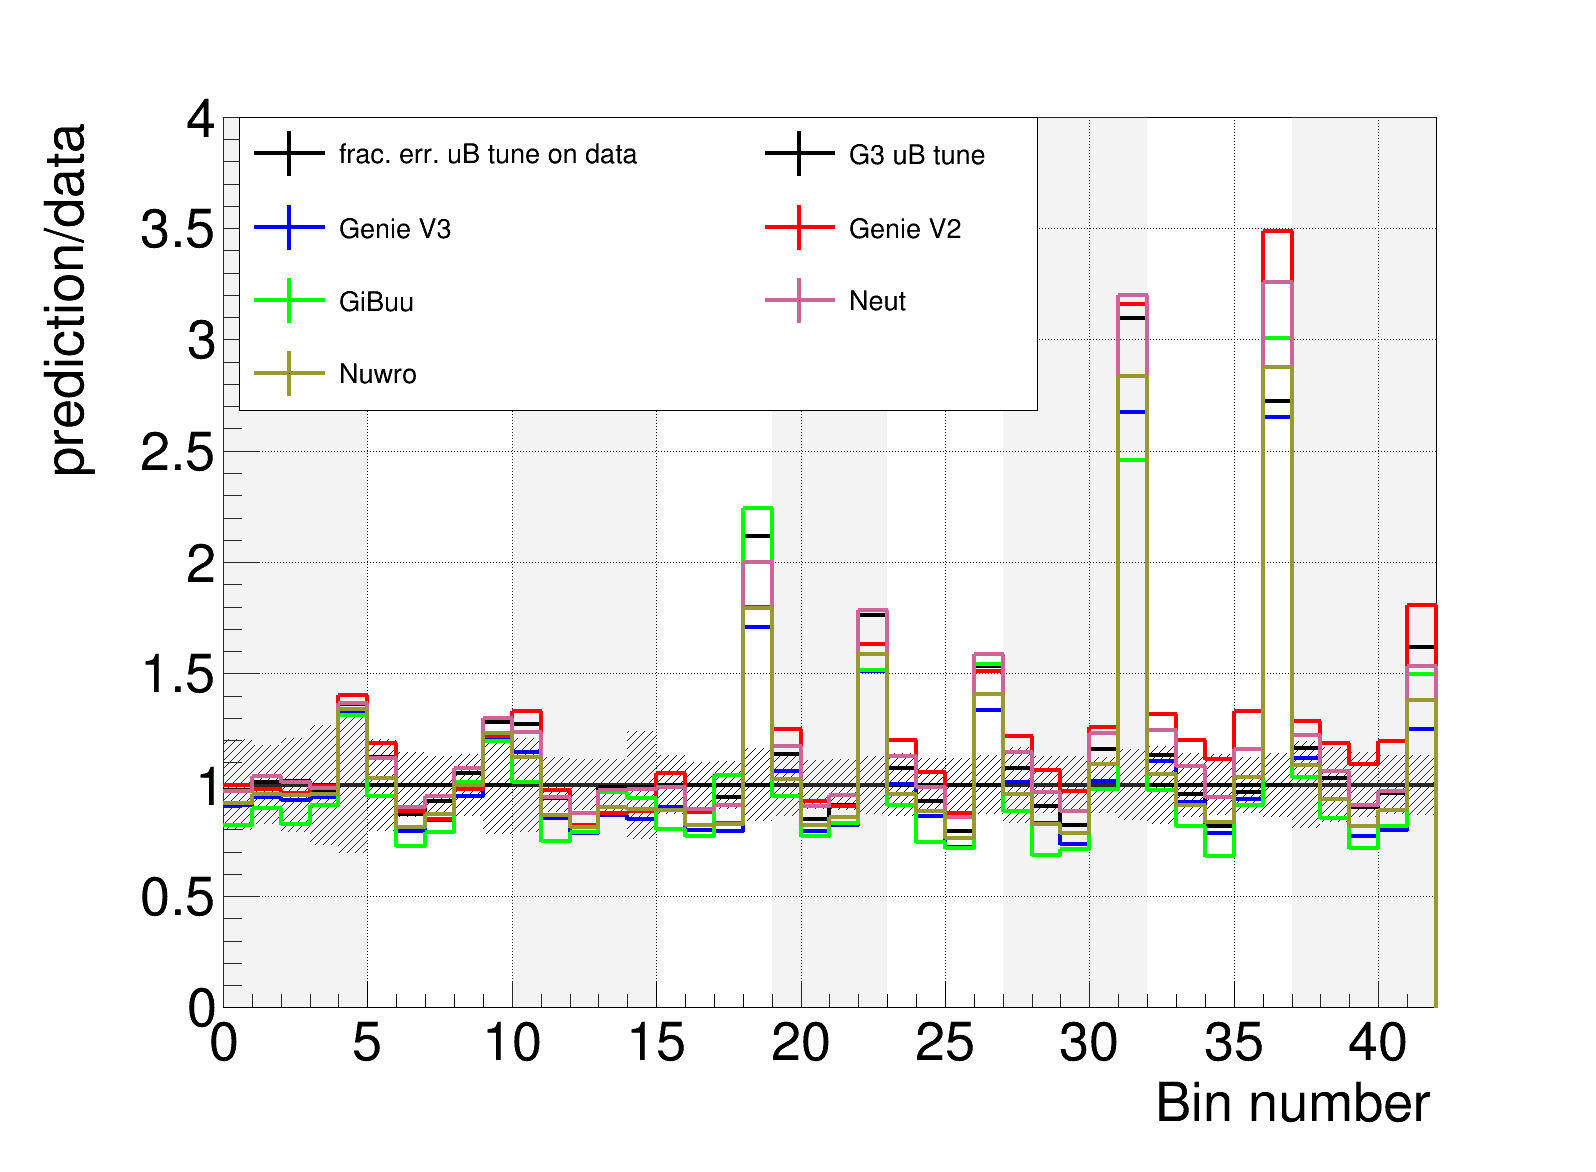

In [77]:
h_pred_GuB_ratio = h_pred_GuB.Clone()
h_pred_G3_ratio = h_pred_G3.Clone()
h_pred_G2_ratio = h_pred_G2.Clone()
h_pred_GiBuu_ratio = h_pred_GiBuu.Clone()
h_pred_neut_ratio = h_pred_neut.Clone()
h_pred_nuwro_ratio = h_pred_nuwro.Clone()
h_data_43 = ROOT.TH1F('h_data_43',"Title",43,0,43)
for i in range(43):
    h_data_43.SetBinContent(i+1,h_data.GetBinContent(i+1))
h_pred_GuB_ratio.Divide(h_data_43)
h_pred_G3_ratio.Divide(h_data_43)
h_pred_G2_ratio.Divide(h_data_43)
h_pred_GiBuu_ratio.Divide(h_data_43)
h_pred_neut_ratio.Divide(h_data_43)
h_pred_nuwro_ratio.Divide(h_data_43)

FF.main_plot(h_frac_GuB)
h_frac_GuB.SetMaximum(4)
h_frac_GuB.SetMinimum(0)
h_frac_GuB.SetYTitle('prediction/data')
h_frac_GuB.SetXTitle('Bin number')
h_frac_GuB.SetFillColor(ROOT.kBlack)
h_frac_GuB.SetLineColor(ROOT.kBlack)
h_frac_GuB.SetFillStyle(3004)
h_frac_GuB.Draw('E2')
h_frac_GuB2 = h_frac_GuB.Clone()
h_frac_GuB2.SetFillColor(0)
h_frac_GuB2.Draw('hist same')
h_histo.Draw('same hist')
h_pred_GuB_ratio.Draw('hist same')
h_pred_G3_ratio.Draw('same hist')
h_pred_G2_ratio.Draw('same hist')
h_pred_GiBuu_ratio.Draw('same hist')
h_pred_neut_ratio.Draw('same hist')
h_pred_nuwro_ratio.Draw('same hist')

legend = ROOT.TLegend(0.15,0.65,0.65,0.9)
legend.SetNColumns(2)
legend.AddEntry(h_frac_GuB,'frac. err. uB tune on data',"lep");
legend.AddEntry(h_pred_GuB,'G3 uB tune',"lep");
legend.AddEntry(h_pred_G3,'Genie V3',"lep");
legend.AddEntry(h_pred_G2,'Genie V2',"lep");
legend.AddEntry(h_pred_GiBuu,'GiBuu',"lep");
legend.AddEntry(h_pred_neut,'Neut',"lep");
legend.AddEntry(h_pred_nuwro,'Nuwro',"lep");
legend.Draw()

c1.Draw()
c1.SaveAs(outputdir_png + "prediction_models_ratio.png")
c1.SaveAs(outputdir_root + "prediction_models_ratio.root")
c1.SaveAs(outputdir_pdf + "prediction_models_ratio.pdf")

In [ ]:

FF.main_plot(h_frac_GuB)
h_frac_GuB.SetMaximum(2)
h_frac_GuB.SetMinimum(0.5)
h_frac_GuB.SetYTitle('MC/data')
h_frac_GuB.SetXTitle('Bin number')
h_frac_GuB.SetFillColor(ROOT.kBlack)
h_frac_GuB.SetLineColor(ROOT.kBlack)
h_frac_GuB.SetFillStyle(3004)
h_frac_GuB.Draw('E2')
h_histo.Draw('same hist')


legend = ROOT.TLegend(0.15,0.65,0.65,0.9)
legend.SetNColumns(2)
legend.AddEntry(h_frac_GuB,'fractional error uB tune',"lep");
legend.AddEntry(h_pred_GuB,'G3 uB tune',"lep");
legend.AddEntry(h_pred_G3,'Genie V3',"lep");
legend.AddEntry(h_pred_G2,'Genie V2',"lep");
legend.AddEntry(h_pred_GiBuu,'GiBuu',"lep");
legend.AddEntry(h_pred_neut,'Neut',"lep");
legend.AddEntry(h_pred_nuwro,'Nuwro',"lep");
legend.Draw()

h_frac_GuB2 = h_frac_GuB.Clone()
h_frac_GuB2.SetFillColor(0)
h_frac_GuB2.Draw('hist same')
h_pred_GuB_ratio.Draw('hist same')
h_pred_G3_ratio.Draw('same hist')
h_pred_G2_ratio.Draw('same hist')
h_pred_GiBuu_ratio.Draw('same hist')
h_pred_neut_ratio.Draw('same hist')
h_pred_nuwro_ratio.Draw('same hist')

c1.Draw()
c1.SaveAs(outputdir_png + "prediction_models_ratio_zoom.png")
c1.SaveAs(outputdir_root + "prediction_models_ratio_zoom.root")
c1.SaveAs(outputdir_pdf + "prediction_models_ratio_zoom.pdf")

In [ ]:
def chi2_minus1(data_vec, pred_vec, frac):
    covar = np.zeros((42,41,41))
    dat_pred = np.zeros((42,41))
    for z in range(42):
        i_c = 0
        for i in range(42):
            j_c = 0
            if i != z :
                dat_pred[z][i_c] = data_vec[i]-pred_vec[i]
                for j in range(42):
                    if j!=z:
                        #print i_c,j_c
                        covar[z][i_c][j_c] = frac[i][j]*pred_vec[i]*pred_vec[j]
                        j_c+=1
                i_c+=1
    #inv_covar = np.linalg.inv(covar)
    chi_vec = np.zeros((42))
    for z in range(42):
        inv_covar = np.linalg.inv(covar[z])
        chi_vec[z] = (dat_pred[z]).dot(inv_covar.dot(dat_pred[z]))

    return chi_vec

In [ ]:
def my_chi2(data_vec, pred_vec, frac):
    covar = np.zeros((42,42))
    for i in range(42):
        for j in range(42):
            covar[i][j] = frac[i][j]*pred_vec[i]*pred_vec[j]
            
    inv_covar = np.linalg.inv(covar)
    chi_vec = 0
    chi_vec = (data_vec-pred_vec[0:-1]).dot(inv_covar.dot(data_vec-pred_vec[0:-1]))

    return chi_vec

In [ ]:
pred_vec_GuB = FF.plot2arr(h_pred_GuB,1)
my_chi2(data_vec, pred_vec_GuB, frac_tot_GuB)

In [ ]:
legend.AddEntry(h_pred_GuB,'G3 uB tune',"lep");
legend.AddEntry(h_pred_G3,'Genie V3',"lep");
legend.AddEntry(h_pred_G2,'Genie V2',"lep");
legend.AddEntry(h_pred_GiBuu,'GiBuu',"lep");
legend.AddEntry(h_pred_neut,'Neut',"lep");
legend.AddEntry(h_pred_nuwro,'Nuwro',"lep");

error = ['det','other','all','flux','crt','dirt','stat','tot']

for x in error:

    h_frac_G3 = FF.plot_err_array(eval('frac_'+x+'_G3'))
    h_frac_G2 = FF.plot_err_array(eval('frac_'+x+'_G2'))
    h_frac_GuB = FF.plot_err_array(eval('frac_'+x+'_GuB'))
    h_frac_gibuu = FF.plot_err_array(eval('frac_'+x+'_GiBuu'))
    h_frac_neut = FF.plot_err_array(eval('frac_'+x+'_Neut'))
    h_frac_nuwro = FF.plot_err_array(eval('frac_'+x+'_NuWro'))

In [ ]:
models = ['GuB','G3','G2','GiBuu','Neut','NuWro']
models1 = ['GuB','G3','G2','GiBuu','neut','nuwro']
chi2_values = np.zeros((len(models),len(models)))

for i,x in enumerate(models):
    for j,y in enumerate(models1):
        chi2_values[i][j]=my_chi2(data_vec, FF.plot2arr(eval('h_pred_'+y),1), eval('frac_tot_'+x))
    
#print chi2_values

print models
for i,x in enumerate(models):
    print x, chi2_values[i]
    #print '{0:0.1f} - {1:0.1f} - {2:0.1f} - {3:0.1f} - {4:0.1f} - {5:0.1f}'.format(chi2_values[i])
#chi2_minus1(data_vec, pred_vec_GuB, frac_tot_GuB)

In [ ]:
def my_covar(data_vec, pred_vec, frac):
    covar = np.zeros((42,42))
    for i in range(42):
        for j in range(42):
            covar[i][j] = frac[i][j]*pred_vec[i]*pred_vec[j]
    inv_covar = np.linalg.inv(covar)
    return covar,inv_covar

In [ ]:
cov, incov = my_covar(data_vec, pred_vec_GuB, frac_tot_GuB)

In [ ]:

data_vec = FF.plot2arr(h_data,1)

# G3 ub tune
pred_vec_GuB = FF.plot2arr(h_pred_GuB,1)
chi_vec_GuB = chi2_minus1(data_vec, pred_vec_GuB, frac_tot_GuB)
h_chi_GuB = FF.arr2plot(chi_vec_GuB)
print my_chi2(data_vec, pred_vec_GuB, frac_tot_GuB)
# G3
pred_vec_G3 = FF.plot2arr(h_pred_G3,1)
chi_vec_G3 = chi2_minus1(data_vec, pred_vec_G3, frac_tot_G3)
h_chi_G3 = FF.arr2plot(chi_vec_G3)

# G2
pred_vec_G2 = FF.plot2arr(h_pred_G2,1)
chi_vec_G2 = chi2_minus1(data_vec, pred_vec_G2, frac_tot_G2)
h_chi_G2 = FF.arr2plot(chi_vec_G2)

# Gibuu
pred_vec_Gibuu = FF.plot2arr(h_pred_GiBuu,1)
chi_vec_Gibuu = chi2_minus1(data_vec, pred_vec_Gibuu, frac_tot_GiBuu)
h_chi_Gibuu = FF.arr2plot(chi_vec_Gibuu)

# Neut
pred_vec_Neut = FF.plot2arr(h_pred_neut,1)
chi_vec_Neut = chi2_minus1(data_vec, pred_vec_Neut, frac_tot_Neut)
h_chi_Neut = FF.arr2plot(chi_vec_Neut)

# Nuwro
pred_vec_Nuwro = FF.plot2arr(h_pred_nuwro,1)
chi_vec_Nuwro = chi2_minus1(data_vec, pred_vec_Nuwro, frac_tot_NuWro)
h_chi_Nuwro = FF.arr2plot(chi_vec_Nuwro)



In [ ]:
FF.main_plot(h_chi_GuB)
h_chi_G3.SetLineColor(ROOT.kBlue)
h_chi_G2.SetLineColor(ROOT.kRed)
h_chi_Gibuu.SetLineColor(ROOT.kGreen)
h_chi_Neut.SetLineColor(ROOT.kPink+2)
h_chi_Nuwro.SetLineColor(ROOT.kYellow-2)

h_chi_GuB.SetMaximum(1000)
h_chi_GuB.SetMinimum(0)
h_chi_GuB.SetYTitle('Total #Chi^{2} without bin_{i}')
h_chi_GuB.GetYaxis().SetTitleOffset(1.3)
h_chi_GuB.SetXTitle('excluded Bin_{i}')

h_chi_GuB.Draw('hist')
h_histo.Draw('same hist')
h_chi_G3.Draw('same hist')
h_chi_G2.Draw('same hist')
h_chi_Gibuu.Draw('same hist')
h_chi_Neut.Draw('same hist')
h_chi_Nuwro.Draw('same hist')

legend = ROOT.TLegend(0.15,0.15,0.75,0.4)
legend.SetNColumns(2)
legend.AddEntry(h_chi_GuB,'G3 uB tune',"lep");
legend.AddEntry(h_chi_G3,'Genie V3',"lep");
legend.AddEntry(h_chi_G2,'Genie V2',"lep");
legend.AddEntry(h_chi_Gibuu,'GiBuu',"lep");
legend.AddEntry(h_chi_Neut,'Neut',"lep");
legend.AddEntry(h_chi_Nuwro,'Nuwro',"lep");
legend.Draw()

c1.Draw()
c1.SaveAs(outputdir_png + "chi_nminus1.png")
c1.SaveAs(outputdir_root + "chi_nminus1.root")
c1.SaveAs(outputdir_pdf + "chi_nminus1.pdf")

In [ ]:
#frac_tot_GuB = np.load('/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/My_Measurement/plots/frac_tot_GuB.npy')
#h_this = CC.smear_plot(h_this_true)
#h_this_GuB = CC.smear_plot(h_true_g3_tune)
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_this_true,frac_tot, 'event_rate_this_tune','this model')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_true_g3_tune,frac_tot_GuB, 'event_rate_G3_tune','G3 uB tune')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_g3,frac_tot_G3, 'event_rate_G3','G3')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_g2,frac_tot_G2, 'event_rate_G2','G2')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_gibuu,frac_tot_GiBuu, 'event_rate_gibuu','GiBuu')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_neut,frac_tot_Neut, 'event_rate_neut','Neut')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_nuwro,frac_tot_NuWro, 'event_rate_nuwro','NuWro')


In [ ]:
f_in = ROOT.TFile.Open('/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/My_Measurement/'+'FF_detsys.root', 'read')
h_GuB = f_in.Get('h_gen_cv')

h_GuB.Draw()
h_true_g3_tune.Draw('hist same')
c1.Draw()

In [ ]:
h_reco1 = CC.smear_plot(h_GuB)
h_reco2 = CC.smear_plot(h_true_g3_tune)

h_reco1.SetLineColor(ROOT.kRed)
h_reco1.Draw()
h_reco2.Draw('hist same')
c1.Draw()